# 1. Loading the Data:

In [1]:
#importing Important Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from scipy import stats

In [2]:
#loading data
df=pd.read_csv("/content/housing_data.csv")

In [3]:
#Checking Load data
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave  None      Reg   
1           1       SC20       RL           80     9600   Pave  None      Reg   
2           2       SC60       RL           68    11250   Pave  None      IR1   
3           3       SC70       RL           60     9550   Pave  None      IR1   
4           4       SC60       RL           84    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.shape

(1460, 81)

# 2. Cleaning the Data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isna().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [7]:
# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1378 non-null   int64  
 1   MSSubClass     1378 non-null   object 
 2   MSZoning       1378 non-null   object 
 3   LotFrontage    1378 non-null   int64  
 4   LotArea        1378 non-null   int64  
 5   Street         1378 non-null   object 
 6   Alley          1378 non-null   object 
 7   LotShape       1378 non-null   object 
 8   LandContour    1378 non-null   object 
 9   Utilities      1378 non-null   object 
 10  LotConfig      1378 non-null   object 
 11  LandSlope      1378 non-null   object 
 12  Neighborhood   1378 non-null   object 
 13  Condition1     1378 non-null   object 
 14  Condition2     1378 non-null   object 
 15  BldgType       1378 non-null   object 
 16  HouseStyle     1378 non-null   object 
 17  OverallQual    1378 non-null   int64  
 18  OverallC

In [118]:
df.describe()

LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  \
count  1378.000000   1378.000000  1378.000000  1378.000000  1378.000000   
mean     57.755443   9463.568215     6.187954     5.406386  1973.413643   
std      35.048536   3020.251146     1.345889     0.766218    28.644444   
min       0.000000   1869.000000     2.000000     4.000000  1890.000000   
25%      41.250000   7800.000000     5.000000     5.000000  1956.000000   
50%      64.000000   9591.000000     6.000000     5.000000  1976.000000   
75%      79.000000  11225.500000     7.000000     6.000000  2001.000000   
max     313.000000  17671.000000    10.000000     7.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1378.000000  1378.000000  1378.000000  1378.000000  1378.000000  ...   
mean    1985.419448   108.443396   455.909289    48.137155   570.900581  ...   
std       20.444010   184.238932   459.694234   164.379207   443.810361  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1968.000000     0.000000     0.000000     0.000000   227.500000  ...   
50%     1994.000000     0.000000   400.000000     0.000000   477.500000  ...   
75%     2004.000000   170.750000   732.000000     0.000000   811.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  \
count  1378.000000  1378.000000   1378.000000  1378.000000    1378.000000   
mean     15.957184     2.923077     42.920174  2007.812046  185492.558781   
std      57.268764    41.350477    501.794706     1.330695   79051.093697   
min       0.000000     0.000000      0.000000  2006.000000   35311.000000   
25%       0.000000     0.000000      0.000000  2007.000000  134000.000000   
50%       0.000000     0.000000      0.000000  2008.000000  167700.000000   
75%       0.000000     0.000000      0.000000  2009.000000  217875.000000   
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000   

           TotalSF     Latitude    Longitude  PricePerSqFt  PropertyAge  
count  1378.000000  1378.000000  1378.000000   1378.000000  1378.000000  
mean   1069.979681     0.946357     0.106998    125.135915    34.398403  
std     339.280604     0.302025     0.033928     39.300175    28.681815  
min     105.000000     0.186900     0.010500     30.372058     0.000000  
25%     832.000000     0.780000     0.083200    102.659733     7.000000  
50%    1008.000000     0.959100     0.100800    122.182566    33.000000  
75%    1280.250000     1.122550     0.128025    141.122616    52.000000  
max    2046.000000     1.767100     0.204600    510.480054   119.000000  

[8 rows x 40 columns]


The table provides descriptive statistics for various features of the dataset:


LotFrontage: Average linear feet of street connected to property.

LotArea: Lot size in square feet.

OverallQual: Overall material and finish quality.

OverallCond: Overall condition rating.

YearBuilt: Original construction year.

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).

MasVnrArea: Masonry veneer area in square feet.

BsmtFinSF1: Type 1 finished square feet.

BsmtFinSF2: Type 2 finished square feet.

BsmtUnfSF: Unfinished square feet of basement area.

ScreenPorch: Screen porch area in square feet.

PoolArea: Pool area in square feet.

MiscVal: $Value of miscellaneous feature.

YrSold: Year Sold (YYYY).

SalePrice: Sale price of the property.

TotalSF: Total square footage of the property.

Latitude: Latitude coordinate of the property location.

Longitude: Longitude coordinate of the property location.

PricePerSqFt: Sale price per square foot.

PropertyAge: Age of the property at the time of sale.

Each feature's statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. These statistics provide insights into the central tendency, dispersion, and shape of the distribution of each feature.

#  Univariate Analysis AND Multivariate Analysis:

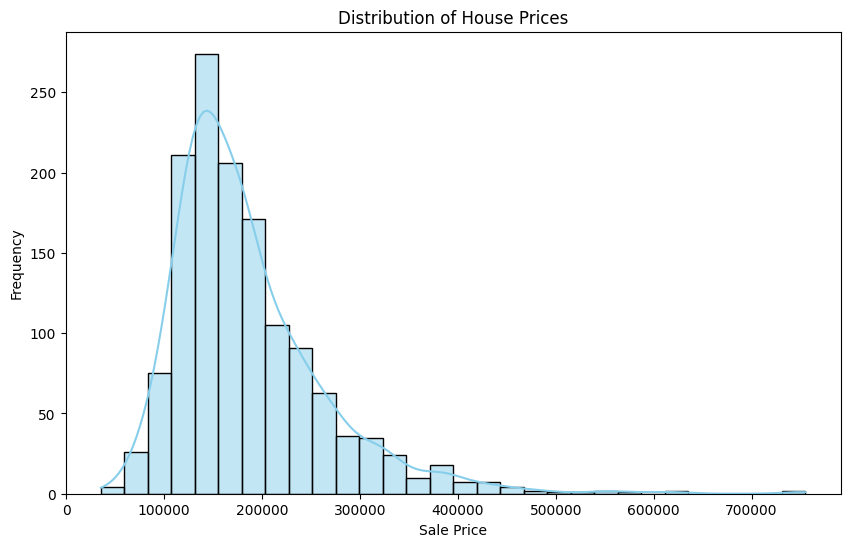

count      1378.000000
mean     185492.558781
std       79051.093697
min       35311.000000
25%      134000.000000
50%      167700.000000
75%      217875.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [10]:
# Distribution of house prices (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of SalePrice
print(df['SalePrice'].describe())


From the histogram plot, we can observe that the distribution of house prices is slightly right-skewed, with most house prices concentrated around the lower to mid-range of the price spectrum. There are relatively fewer houses with very high sale prices, as indicated by the long right tail of the distribution.

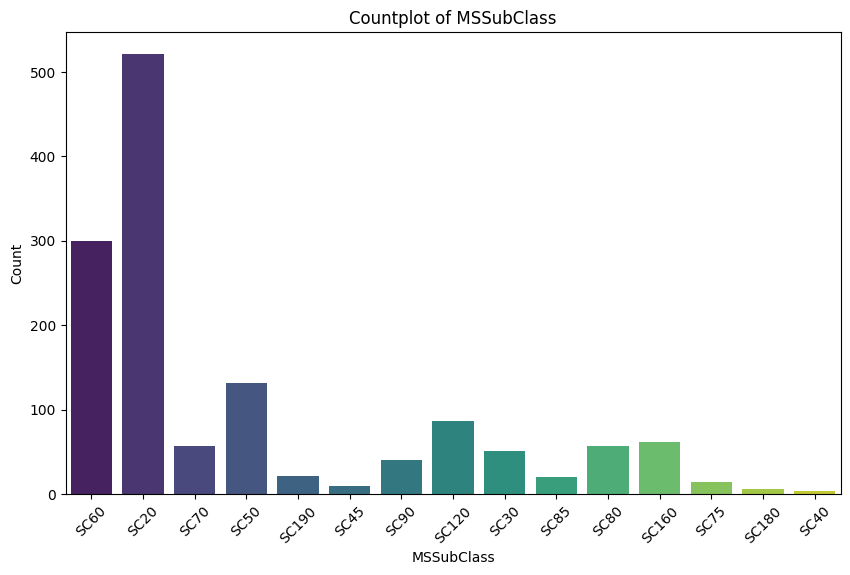

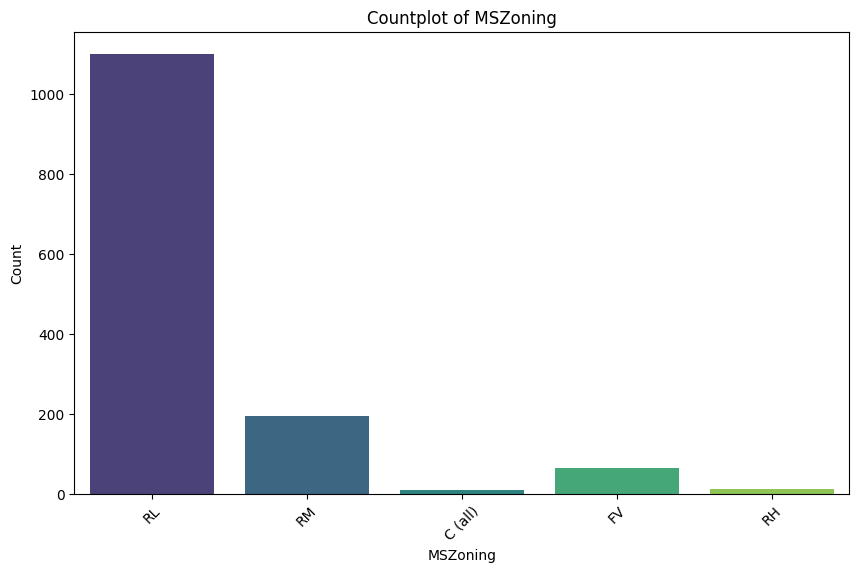

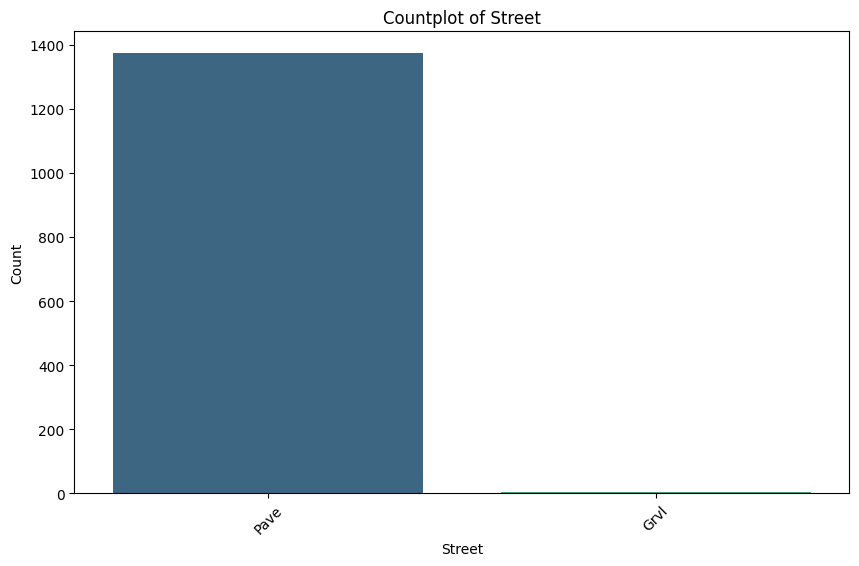

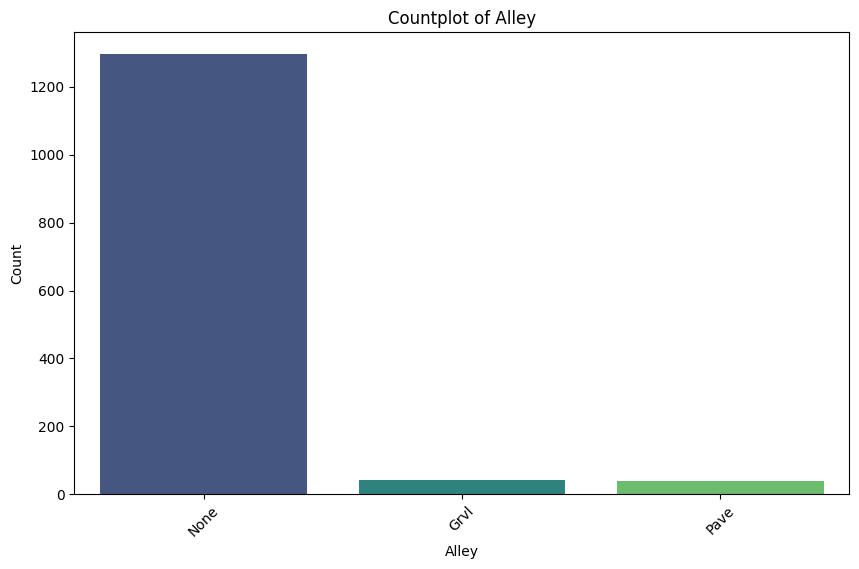

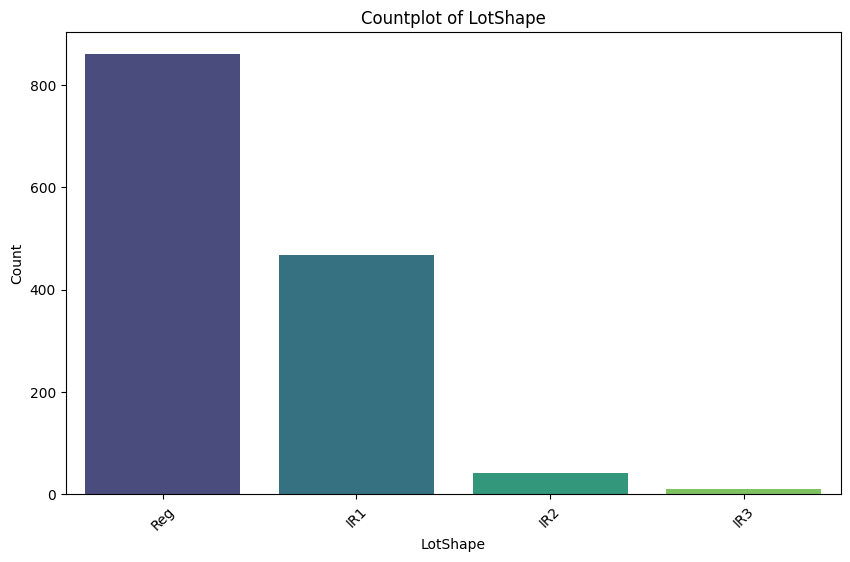

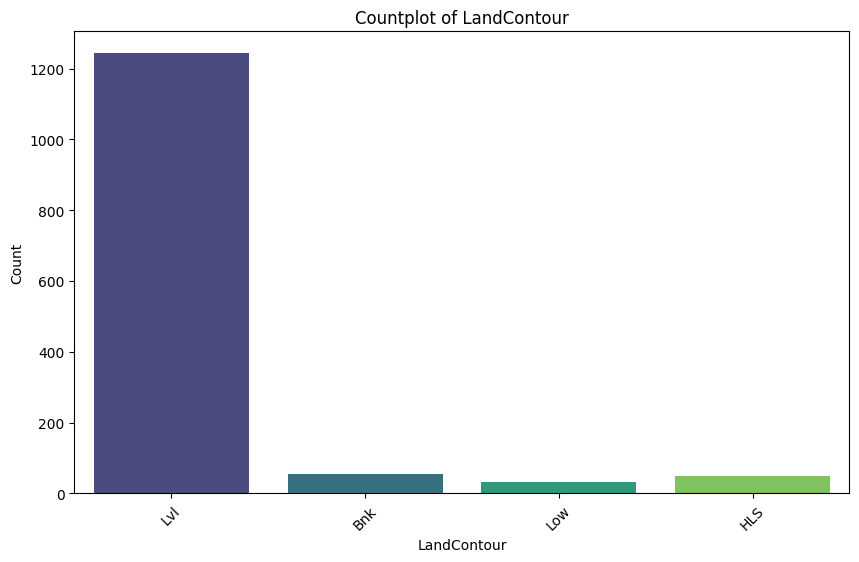

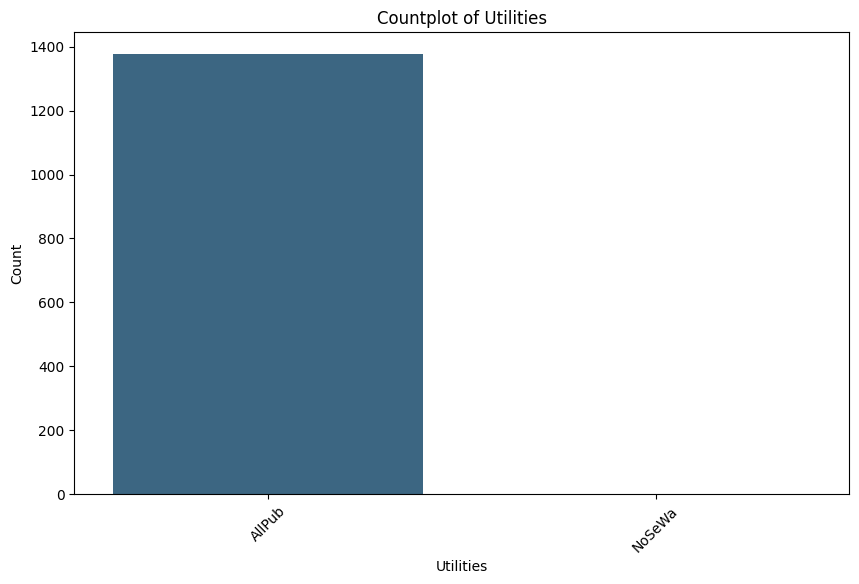

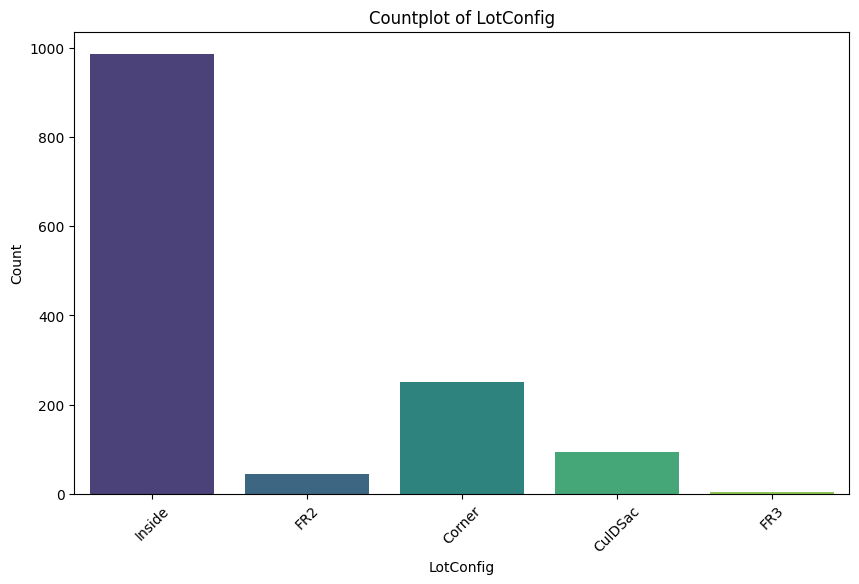

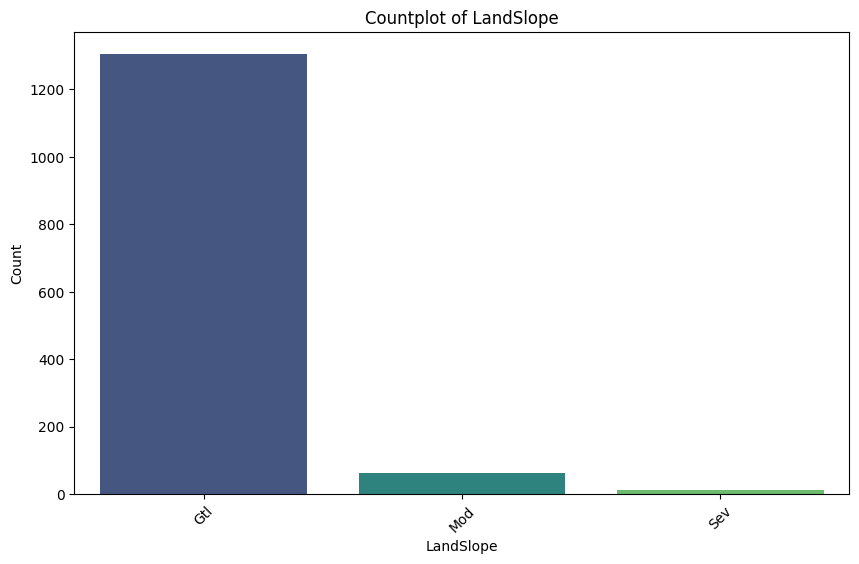

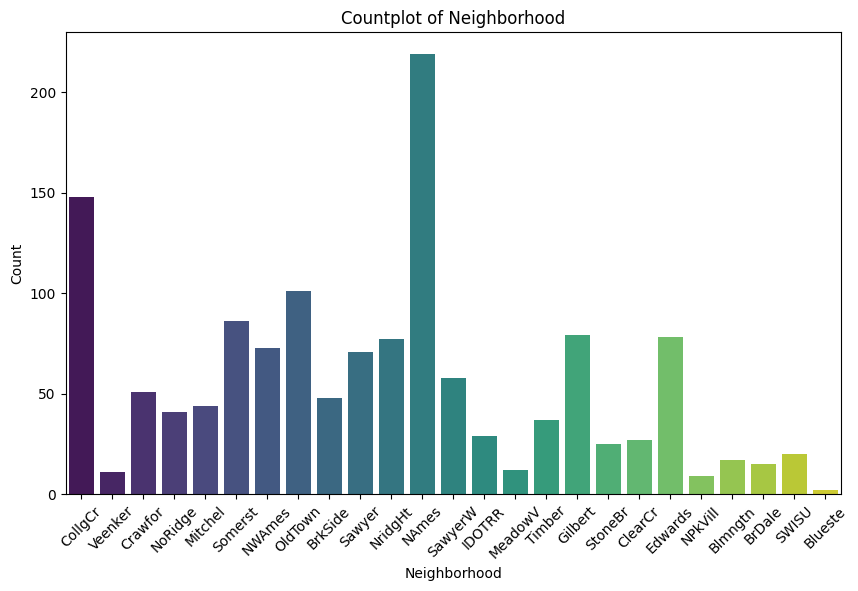

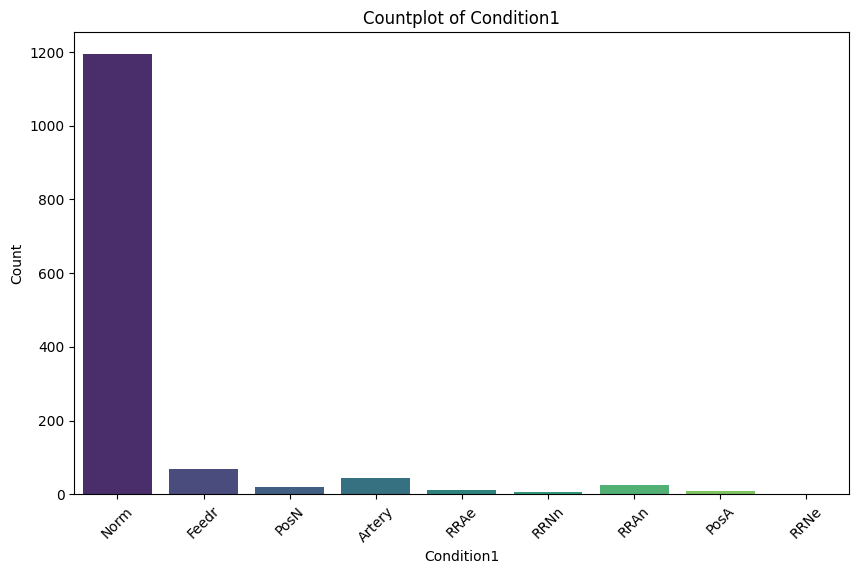

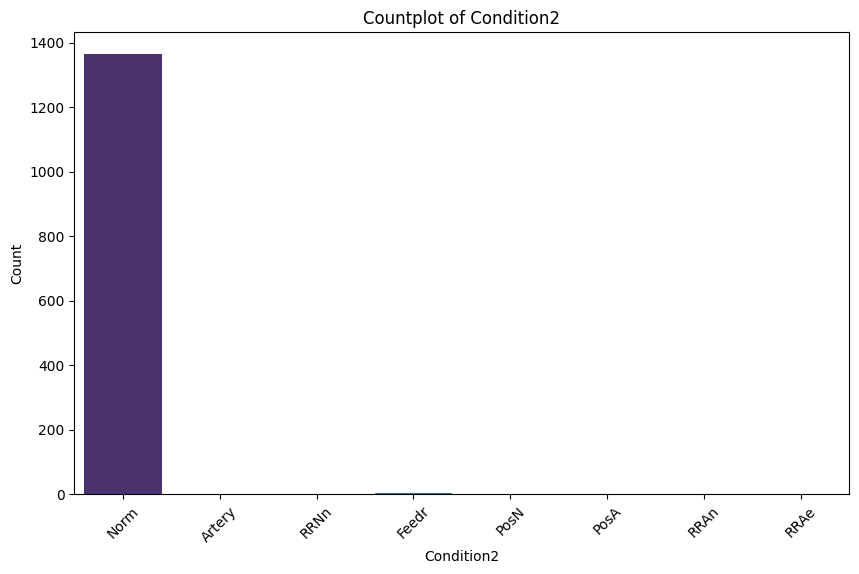

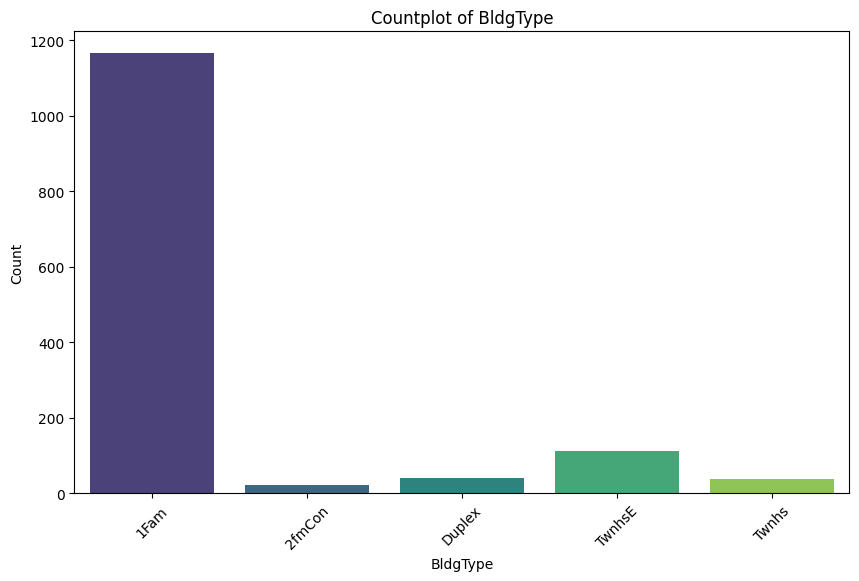

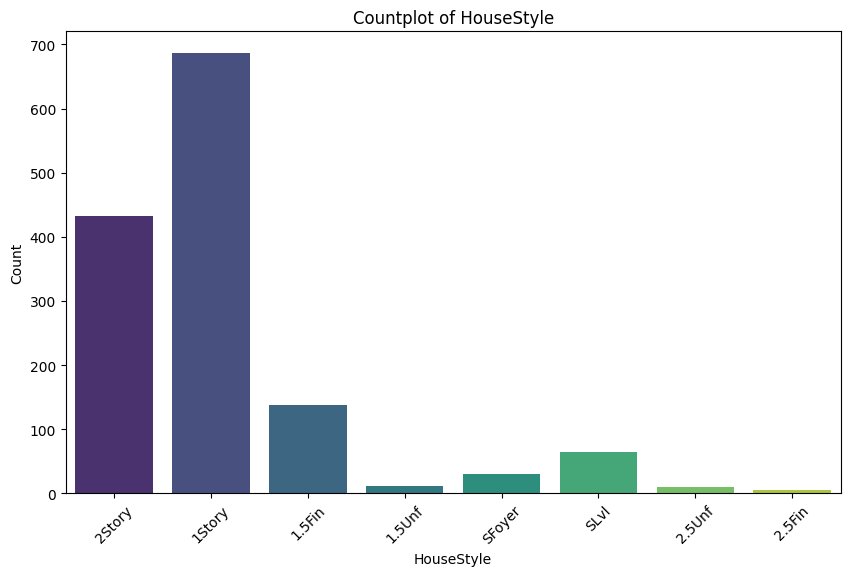

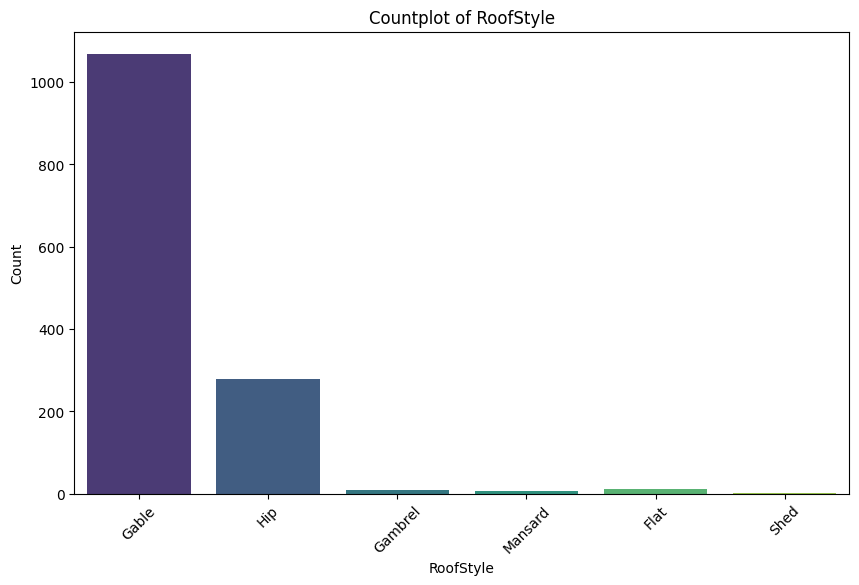

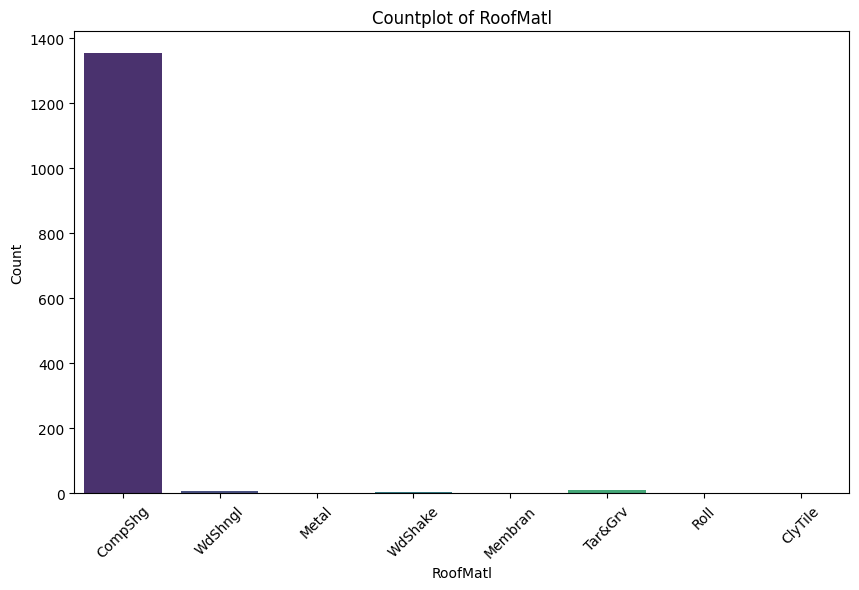

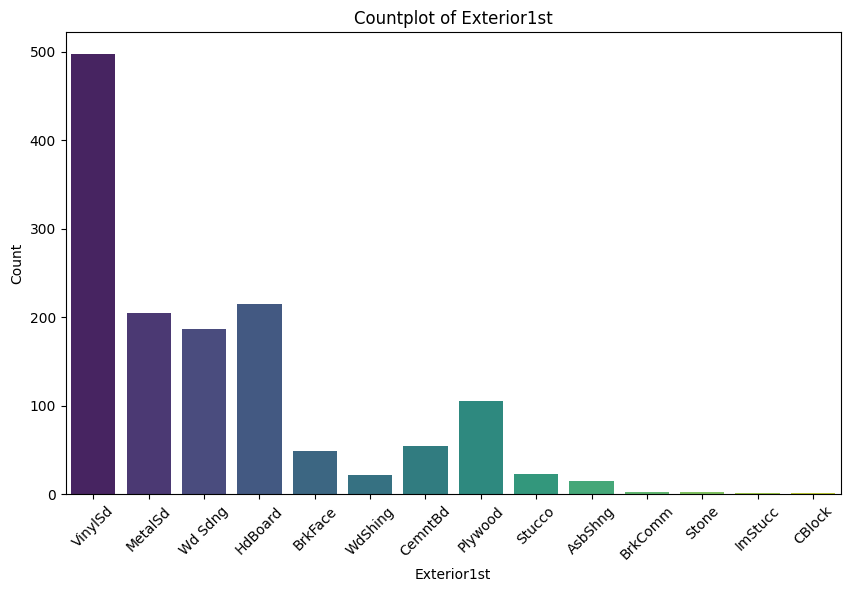

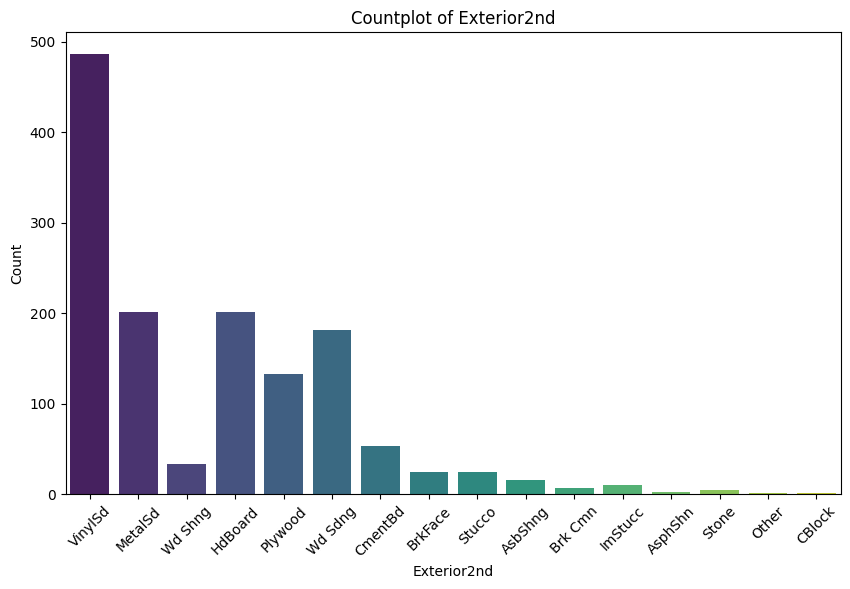

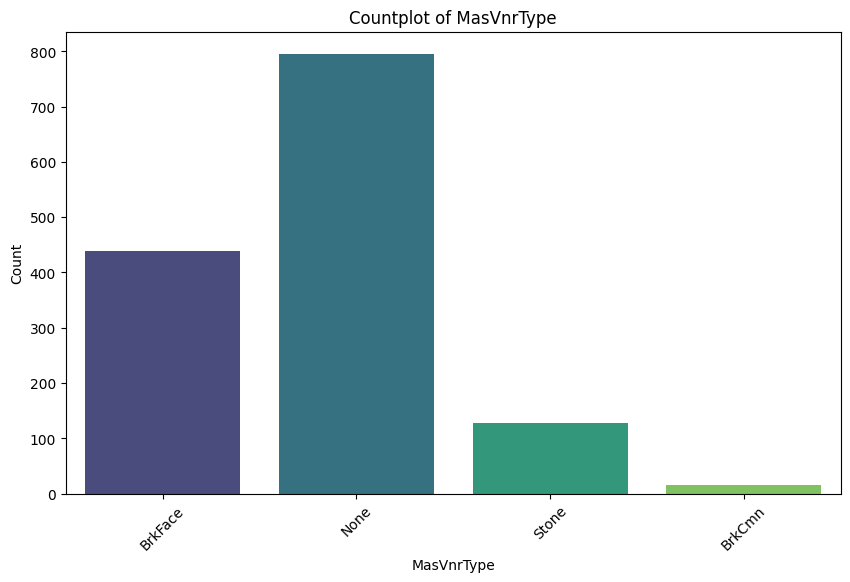

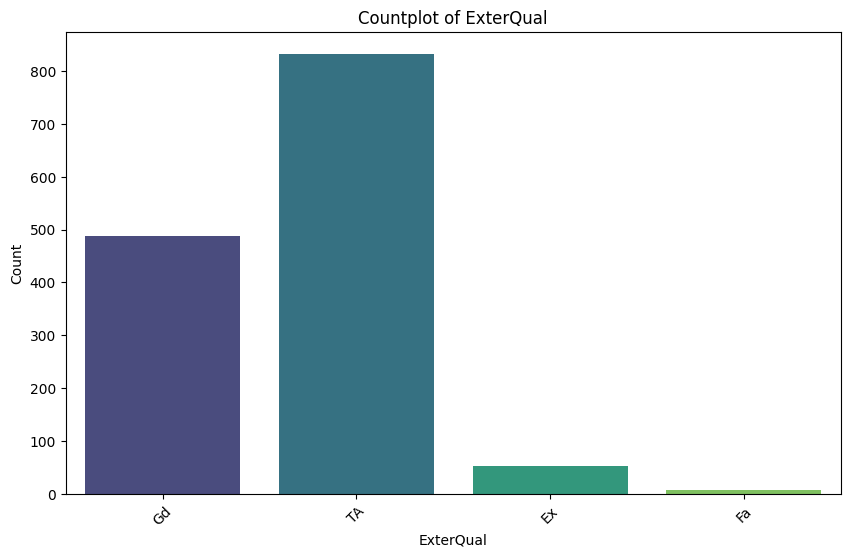

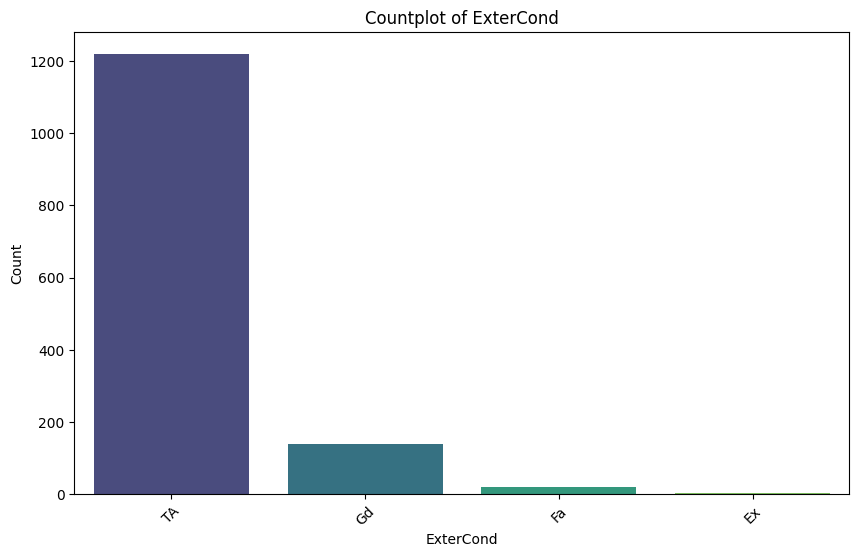

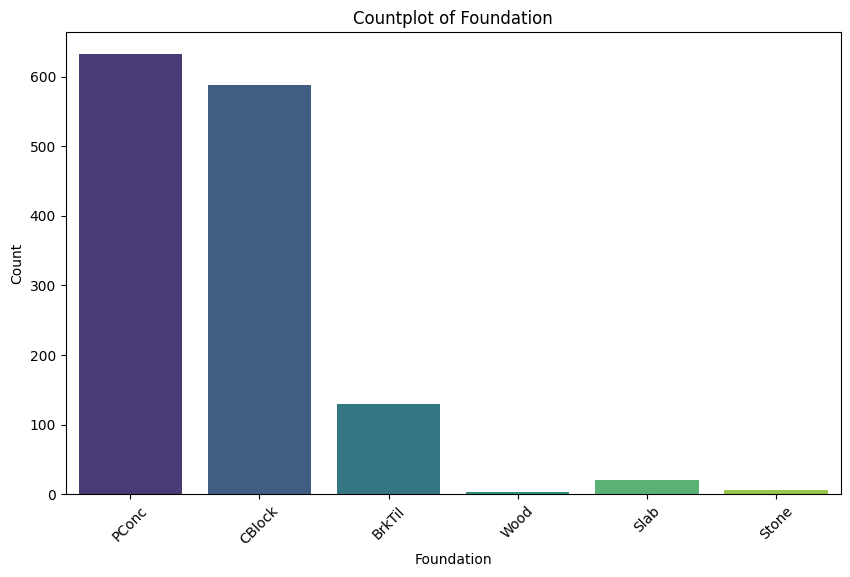

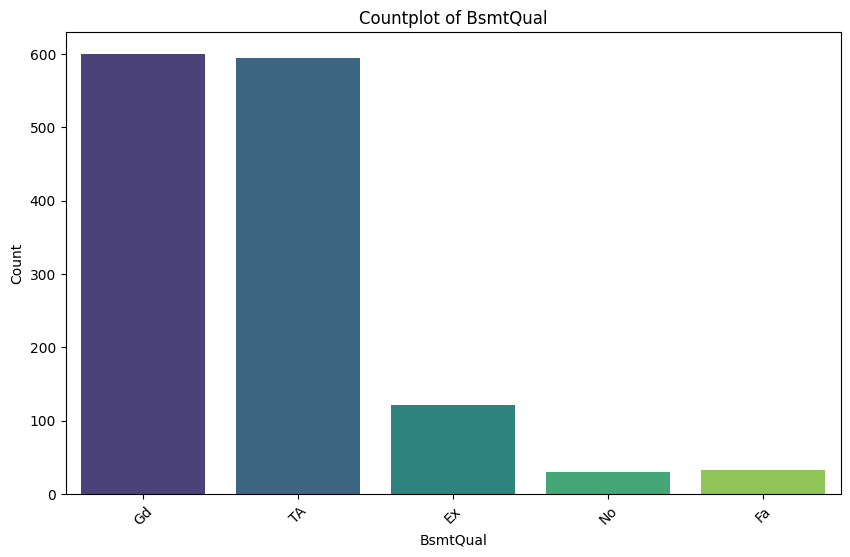

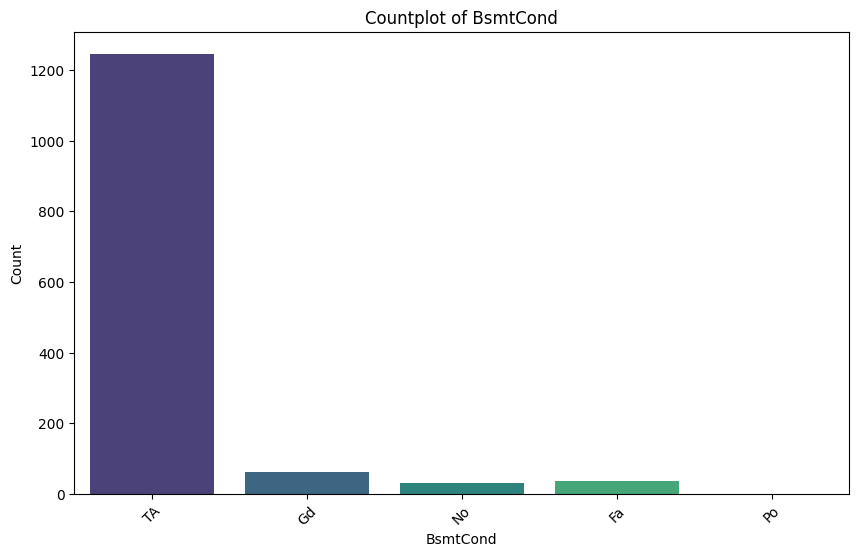

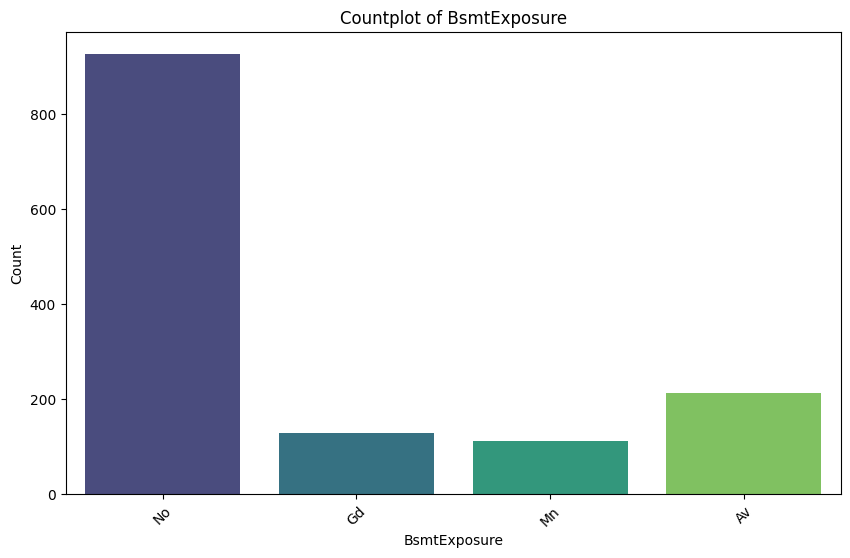

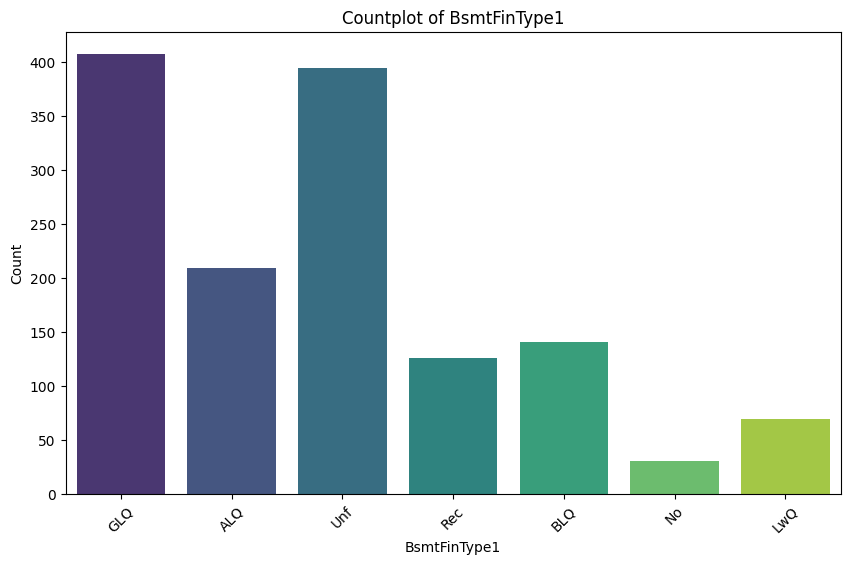

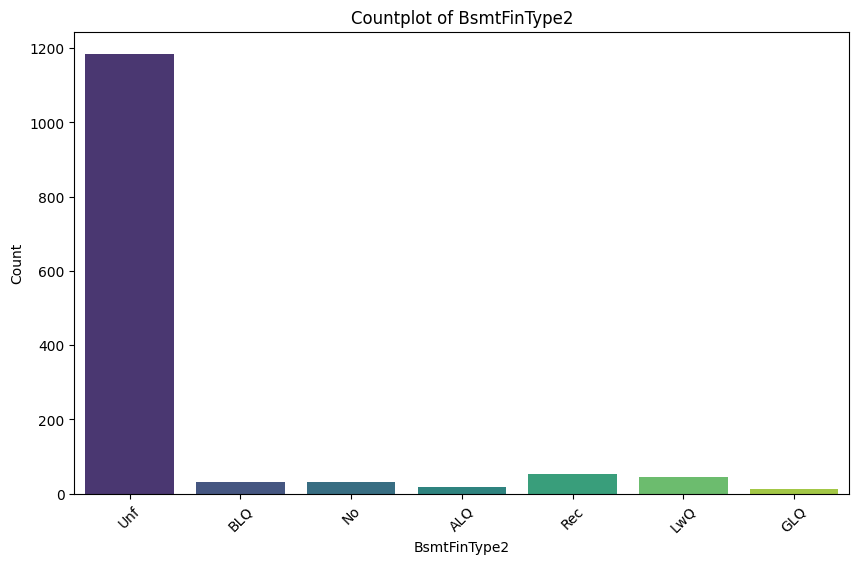

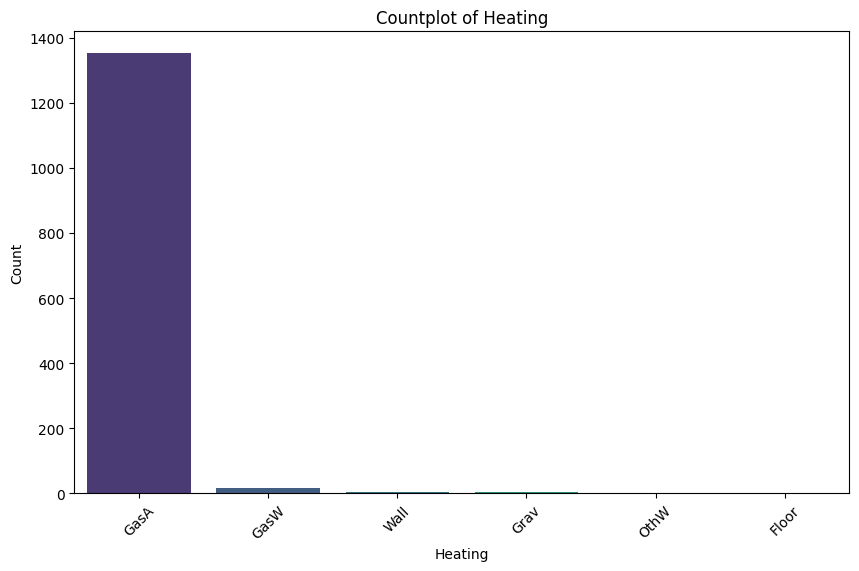

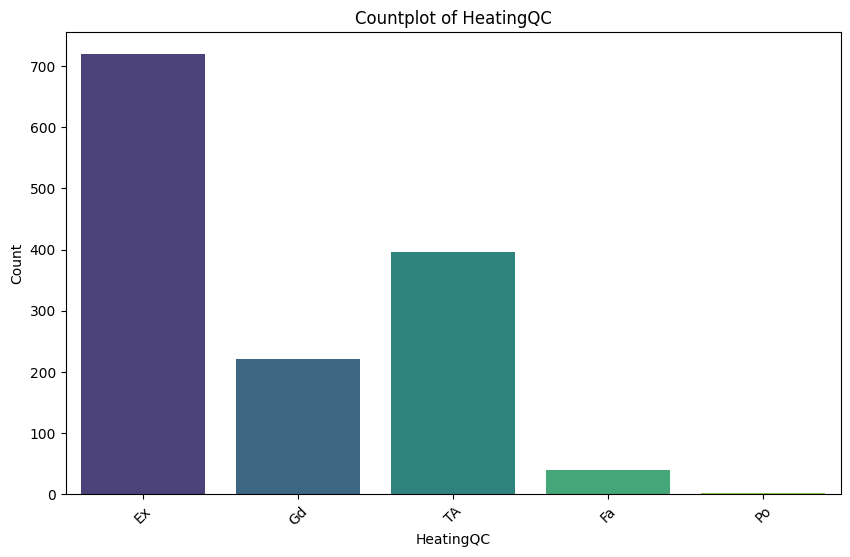

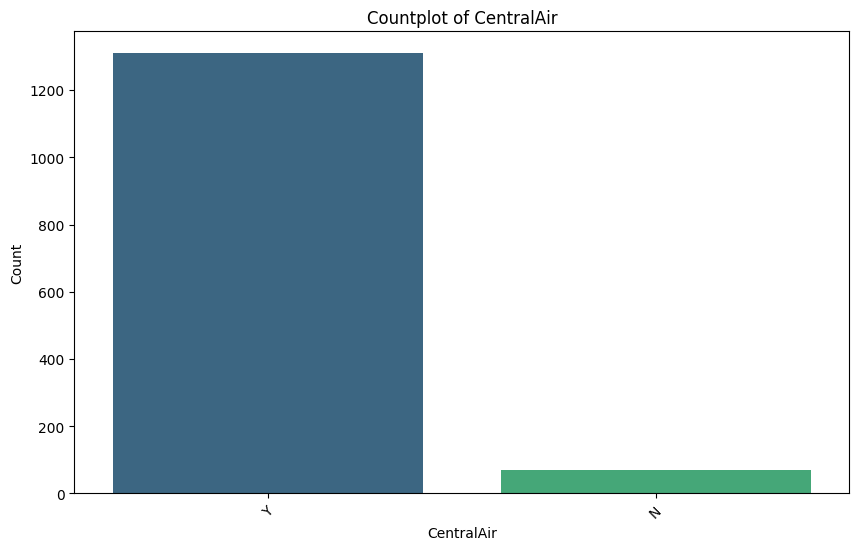

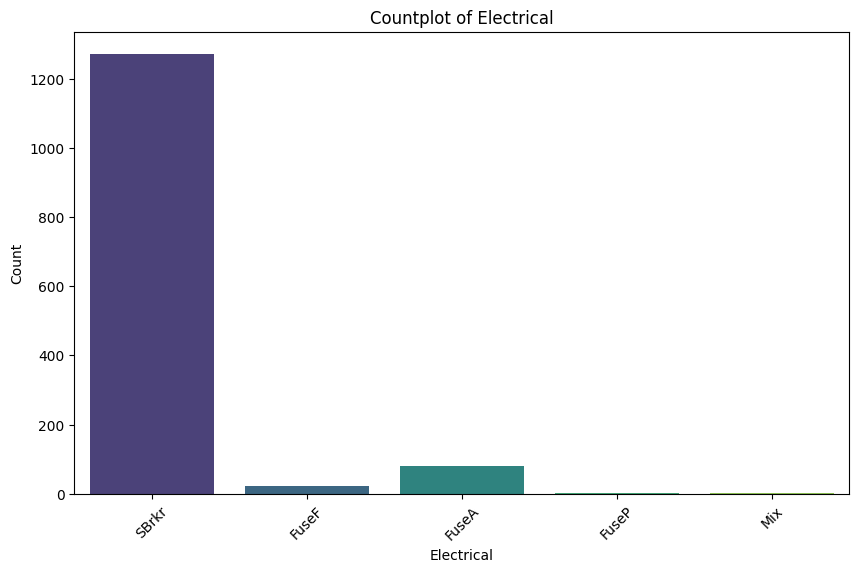

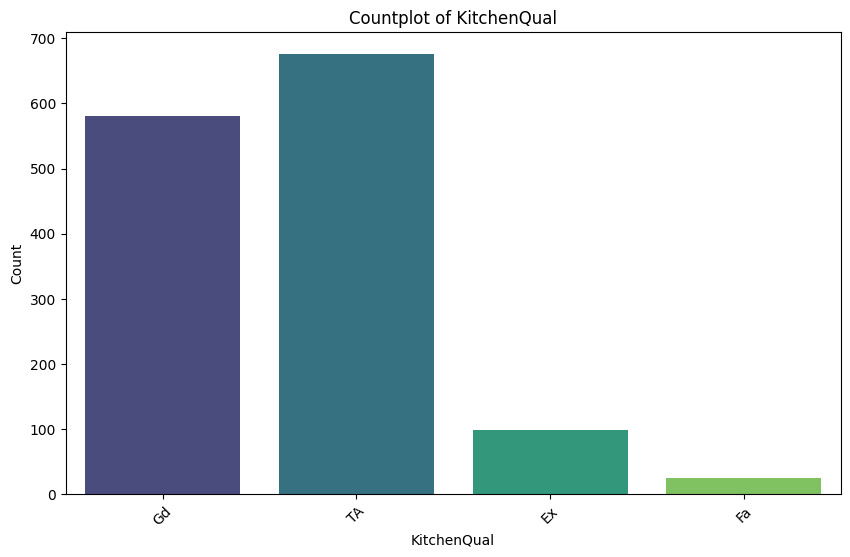

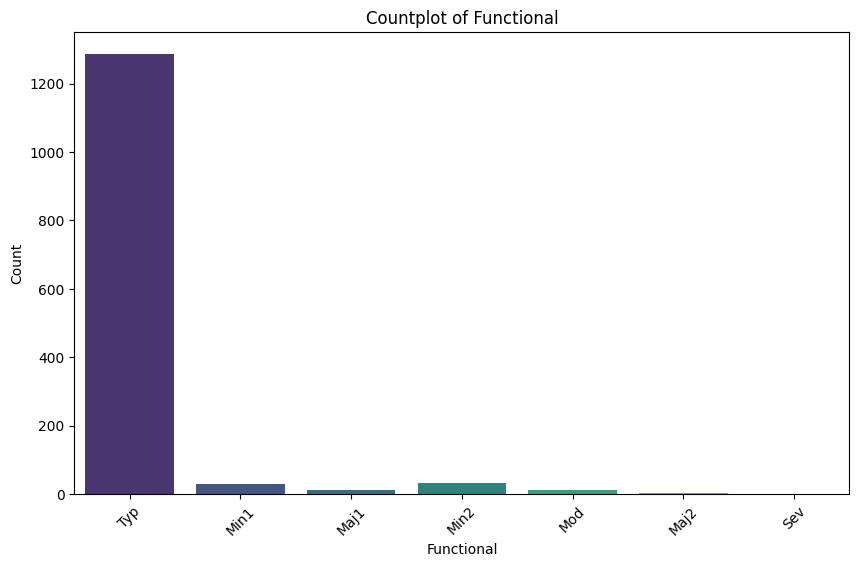

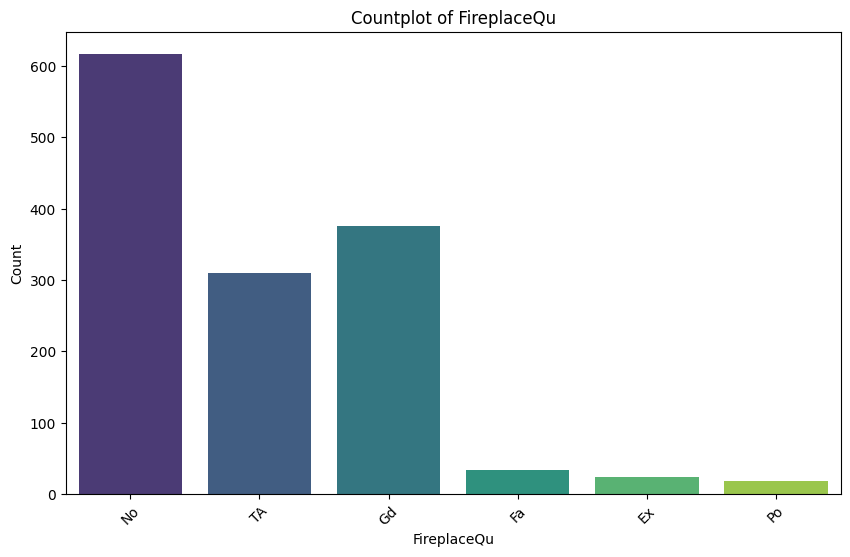

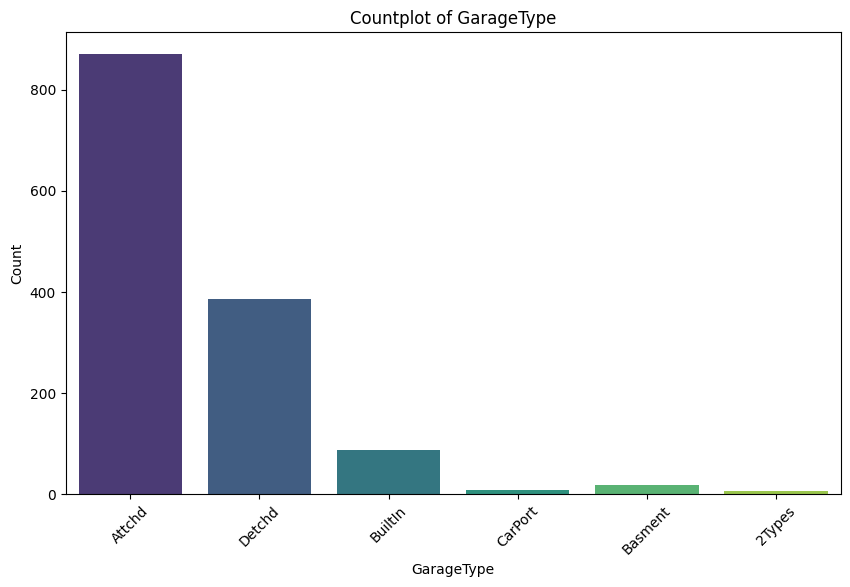

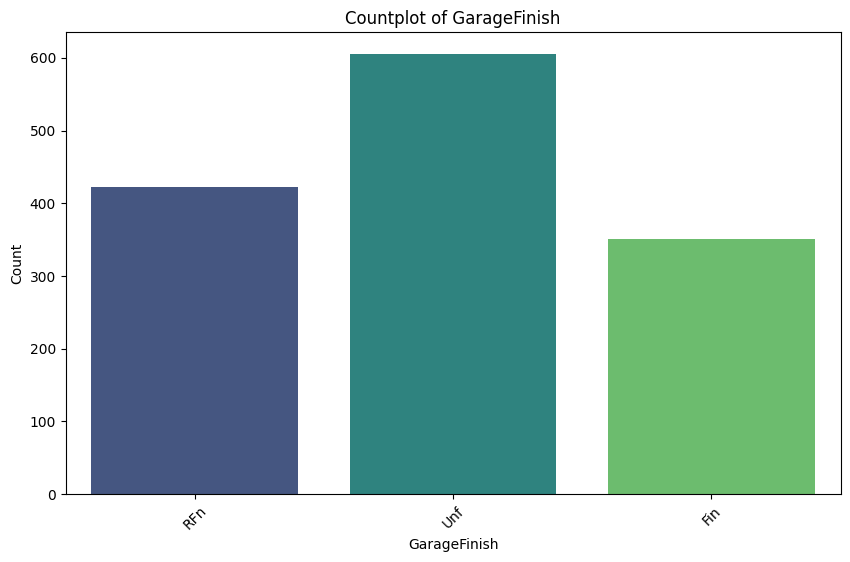

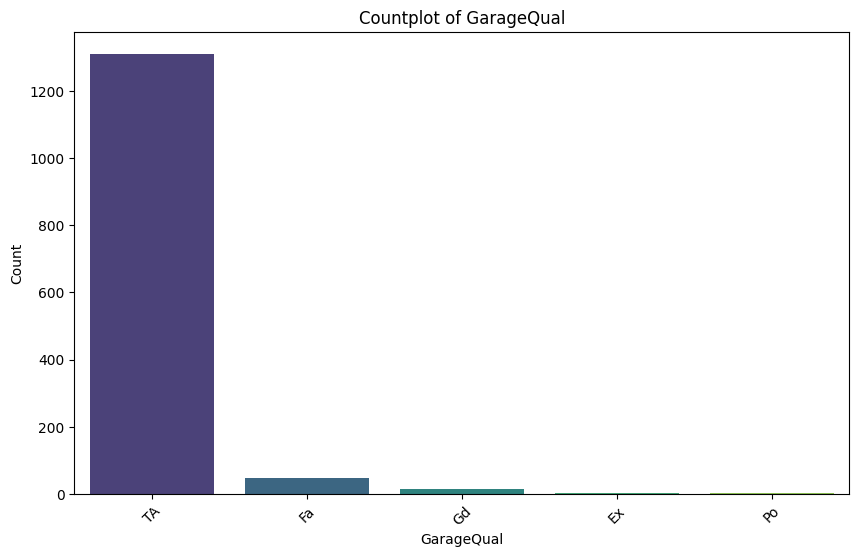

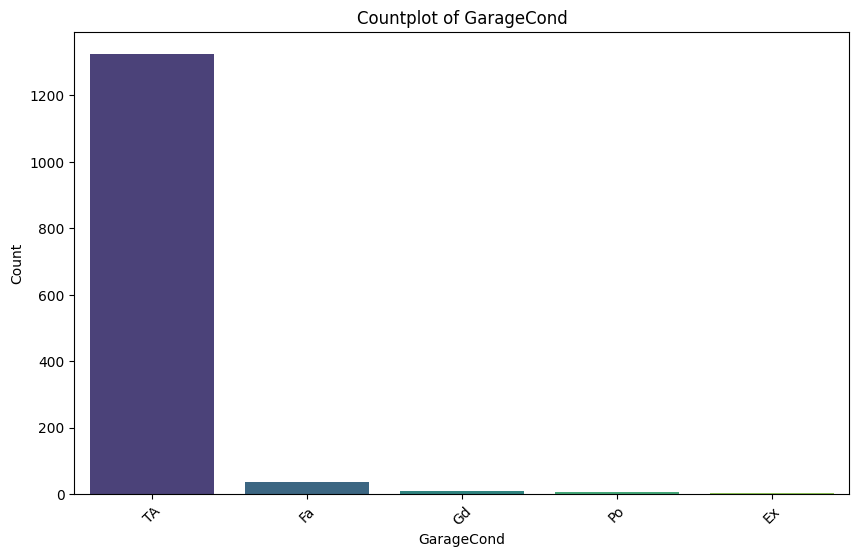

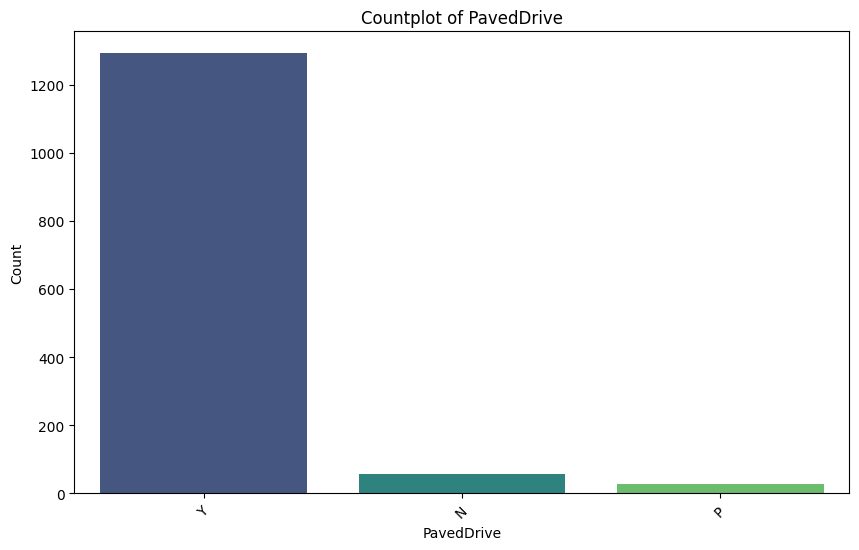

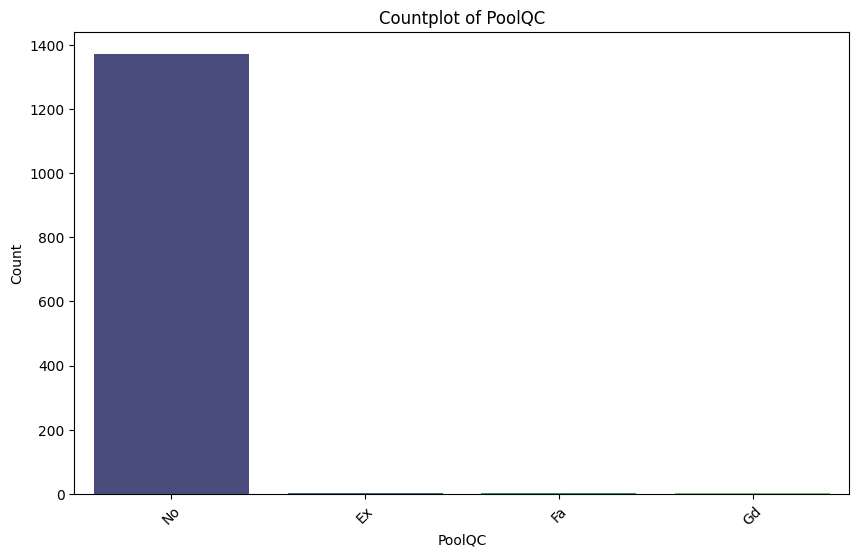

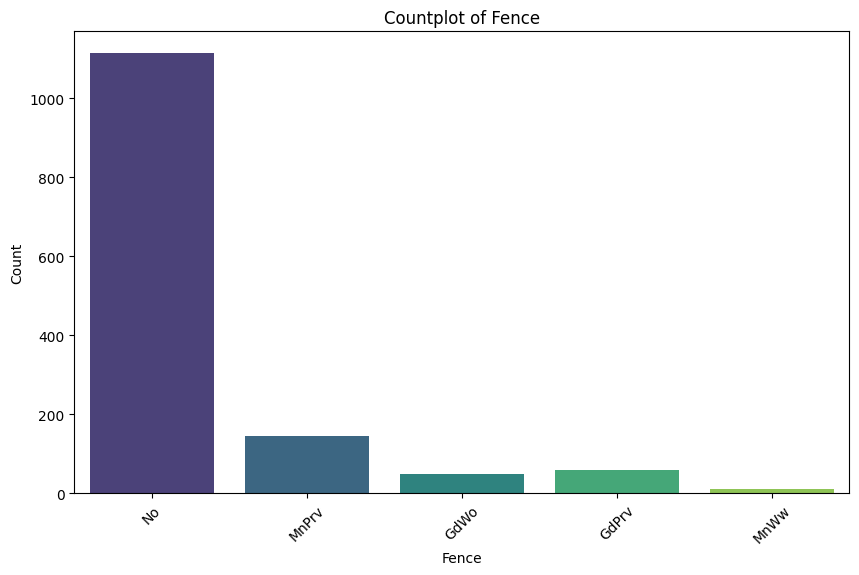

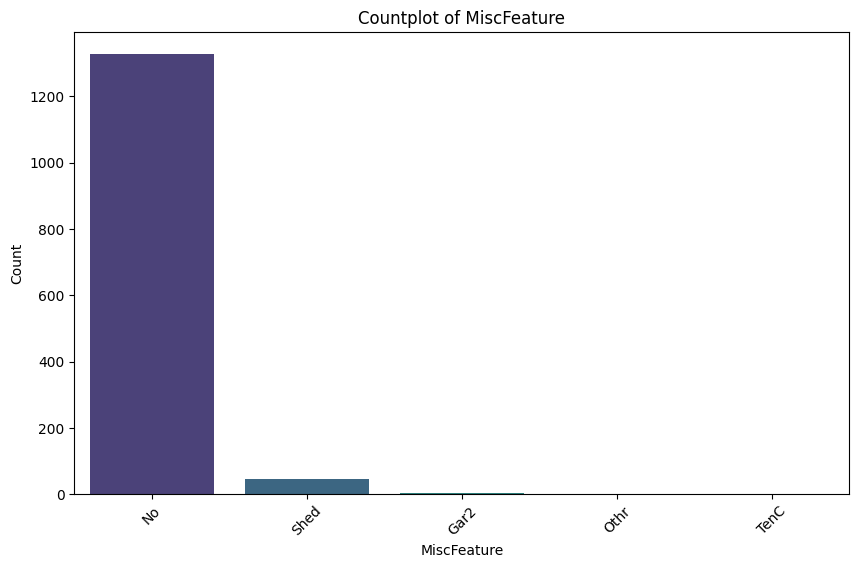

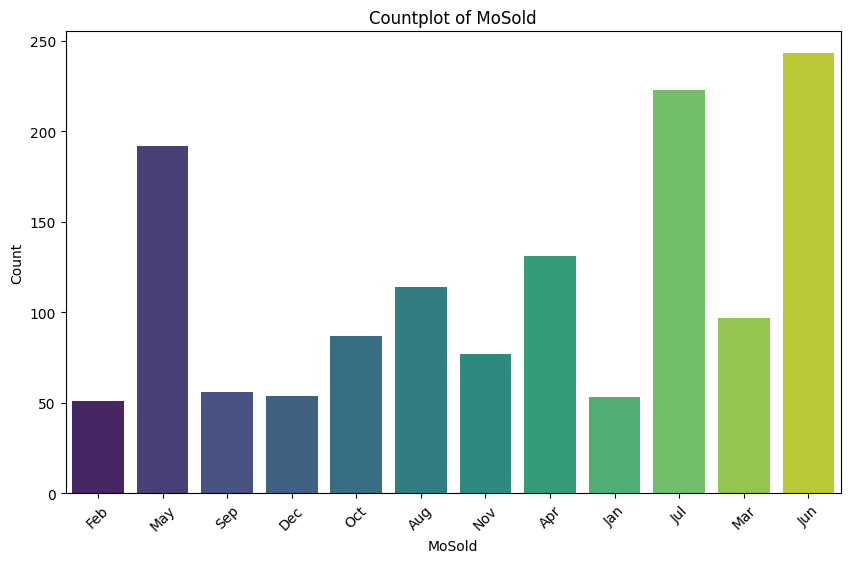

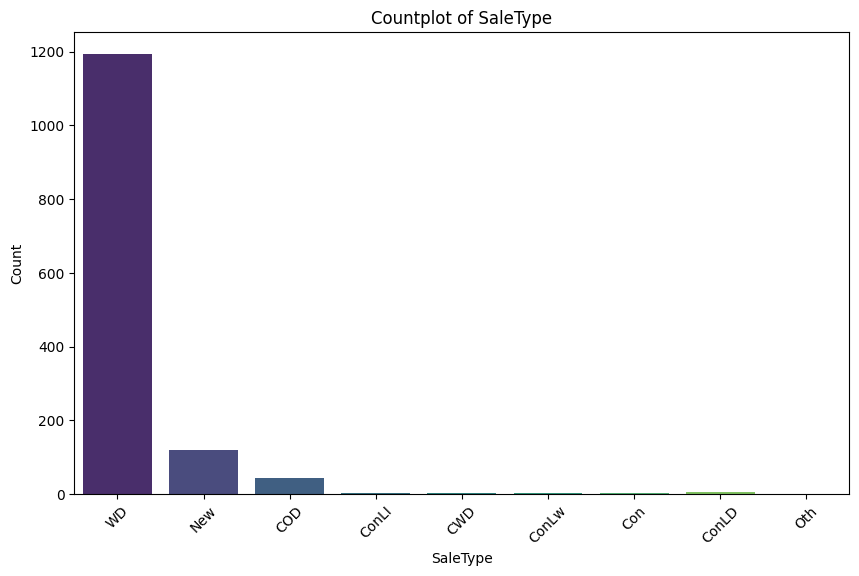

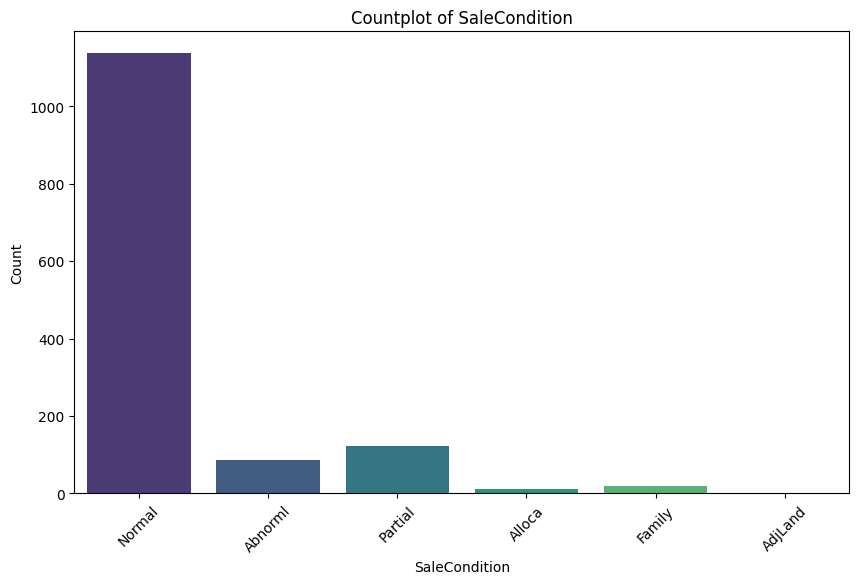

In [95]:
# Selecting only categorical columns for countplot
categorical_cols = df.select_dtypes(include=['object']).columns

# Plotting countplot for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

These plots display the frequency of sale conditions in the dataset, with "Normal" being the most common (1136), followed by "Partial" (123) and "Abnorml" (87). Less common categories include "Family" (20), "Alloca" (11), and "AdjLand" (1), offering insights into diverse sale conditions and market dynamics.

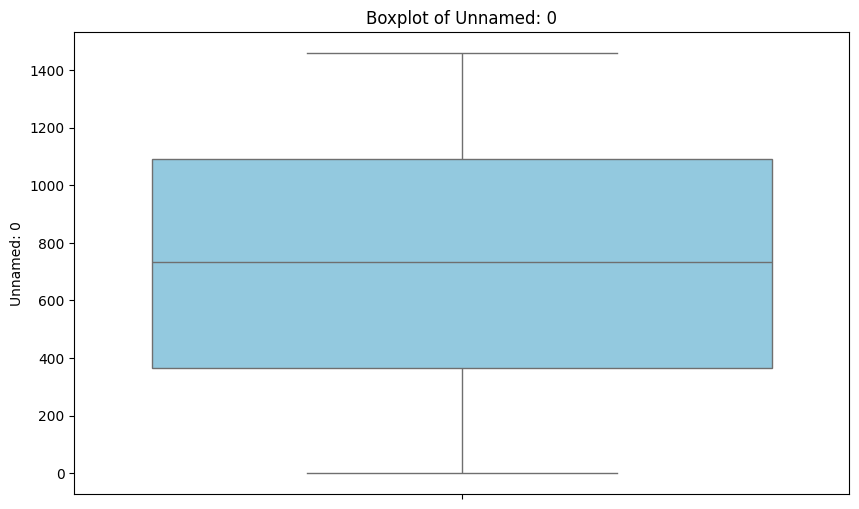

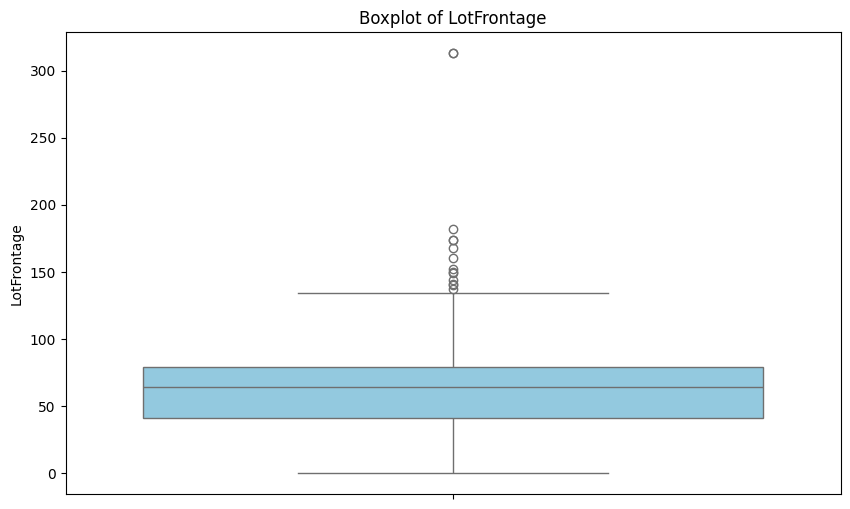

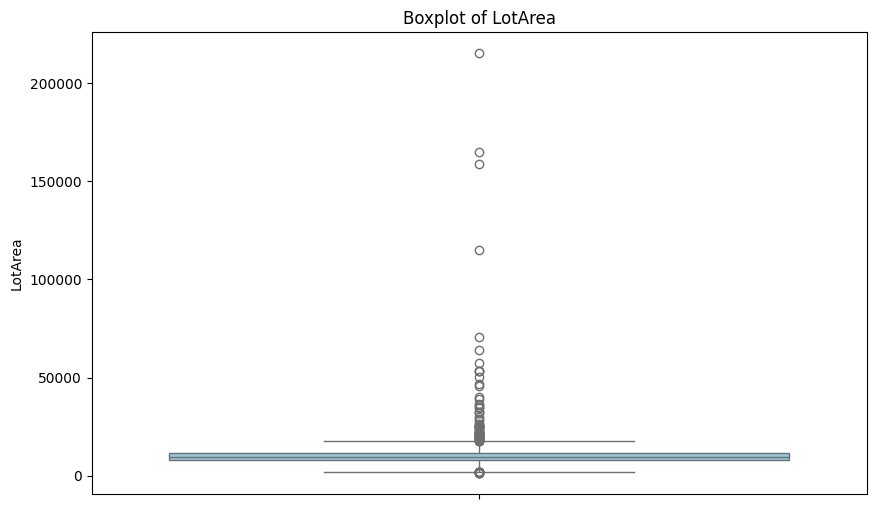

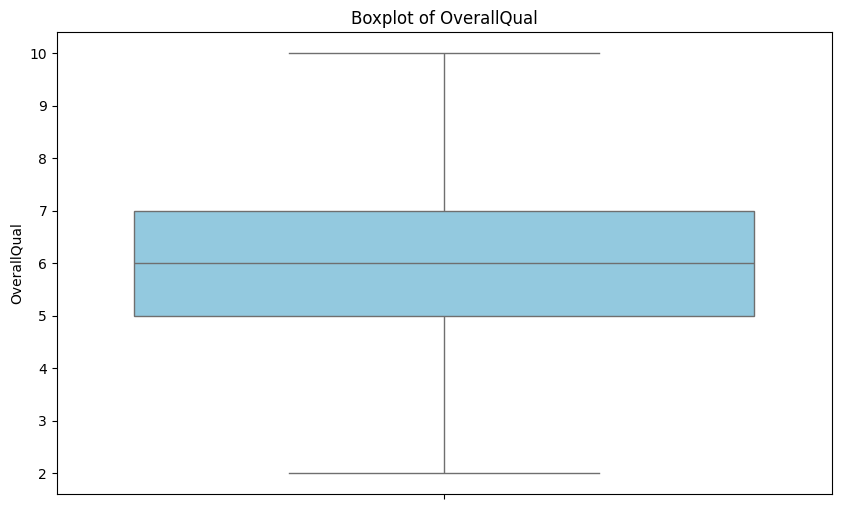

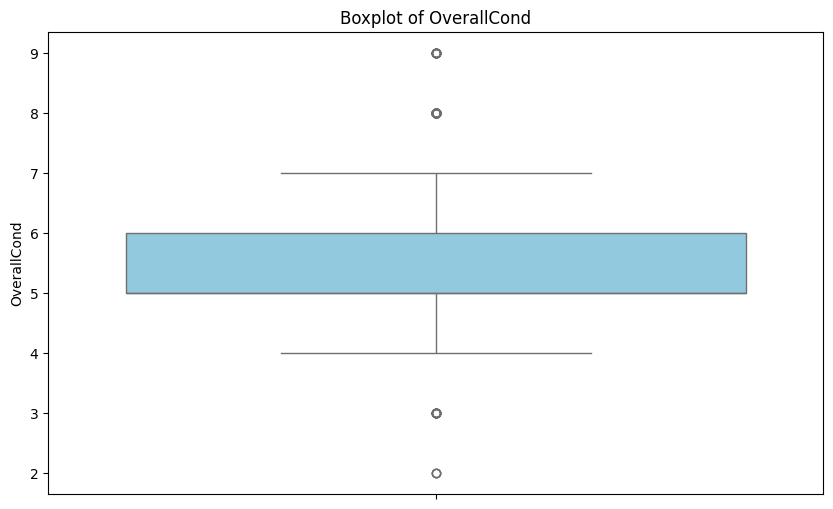

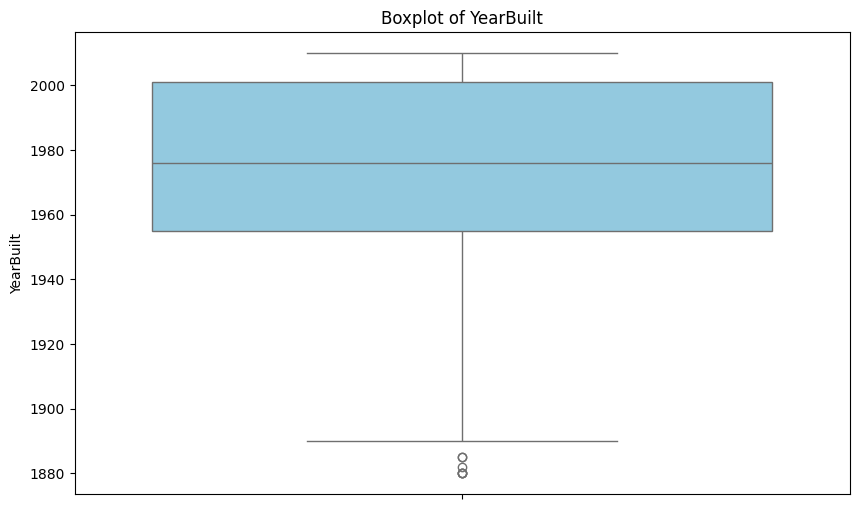

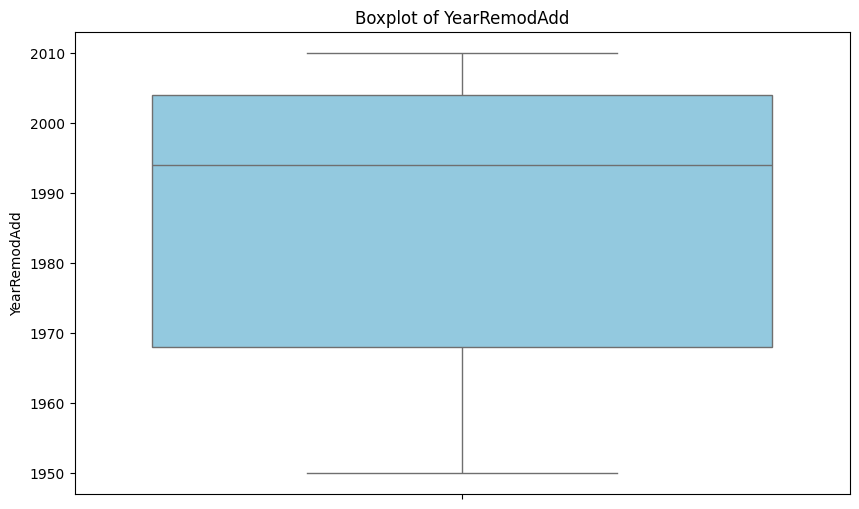

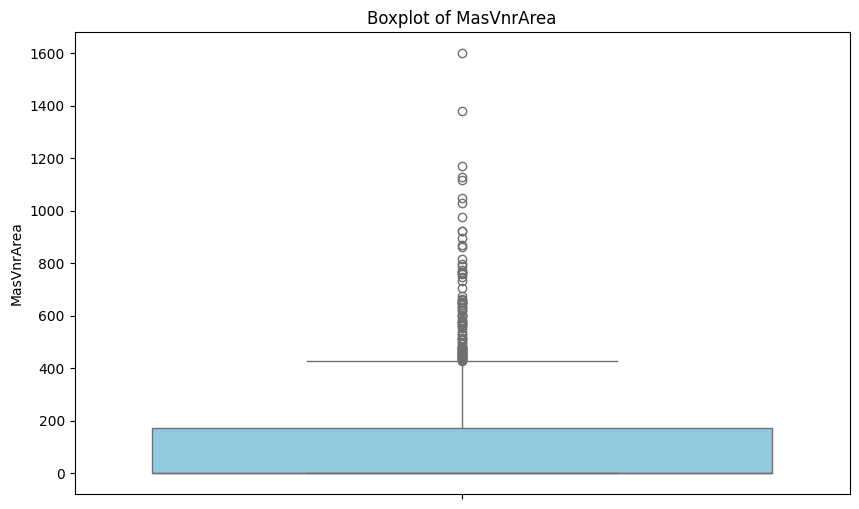

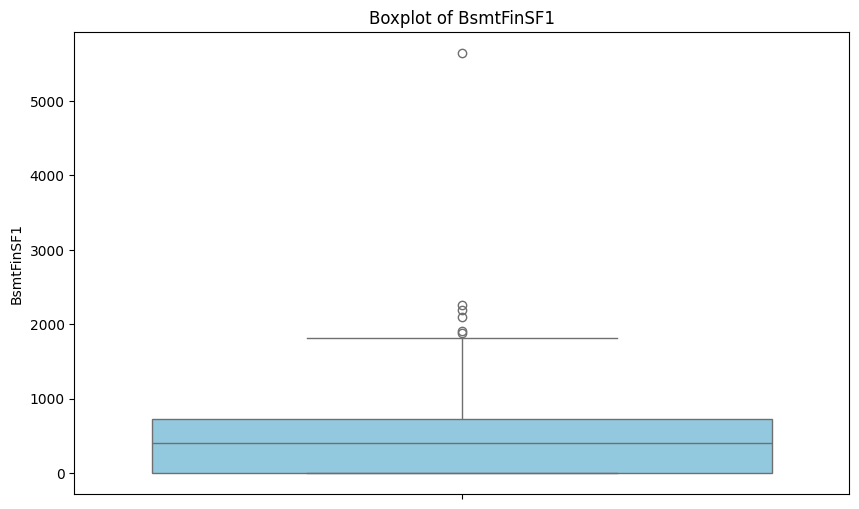

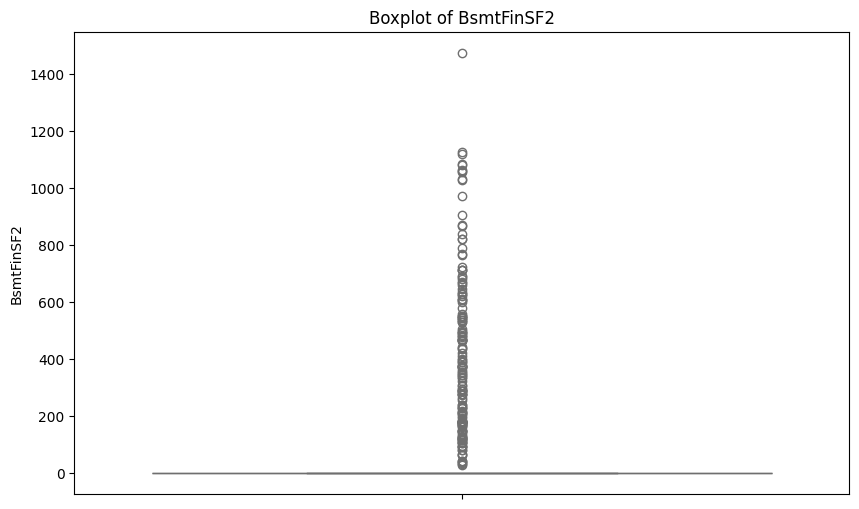

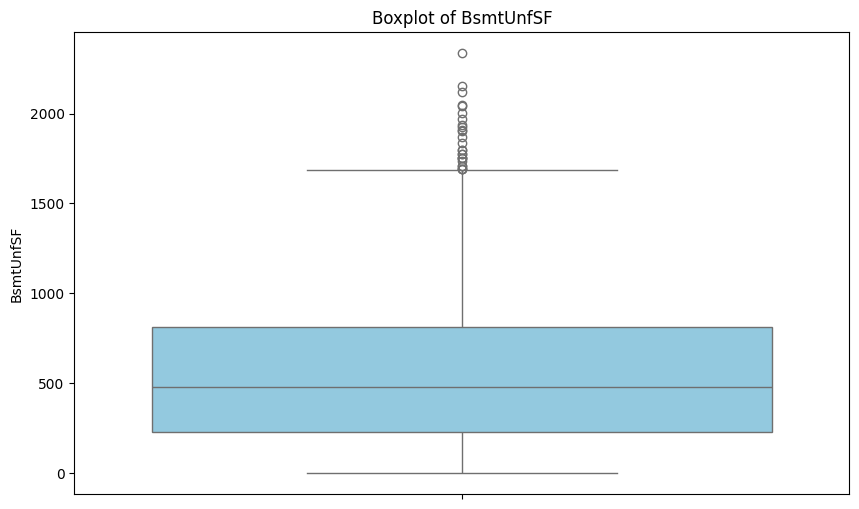

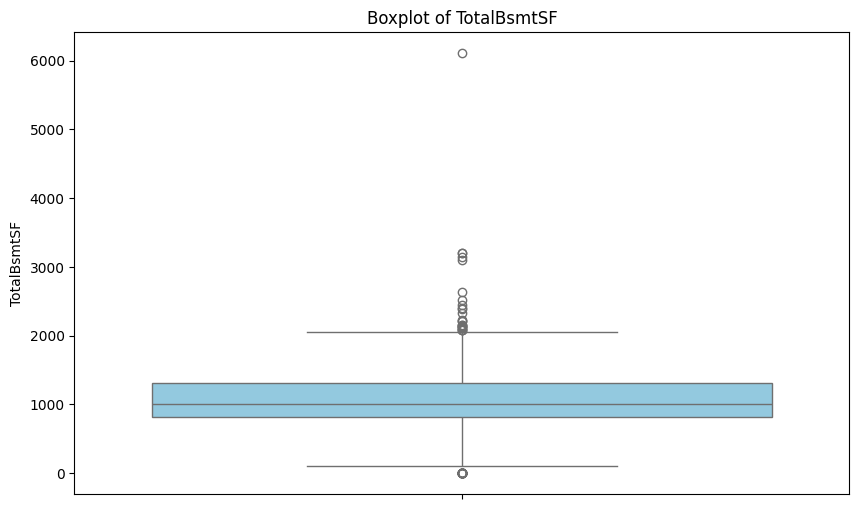

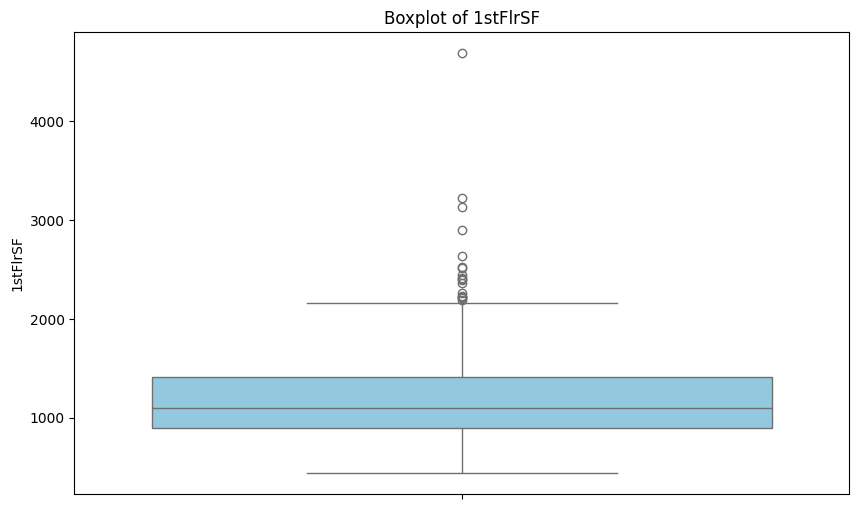

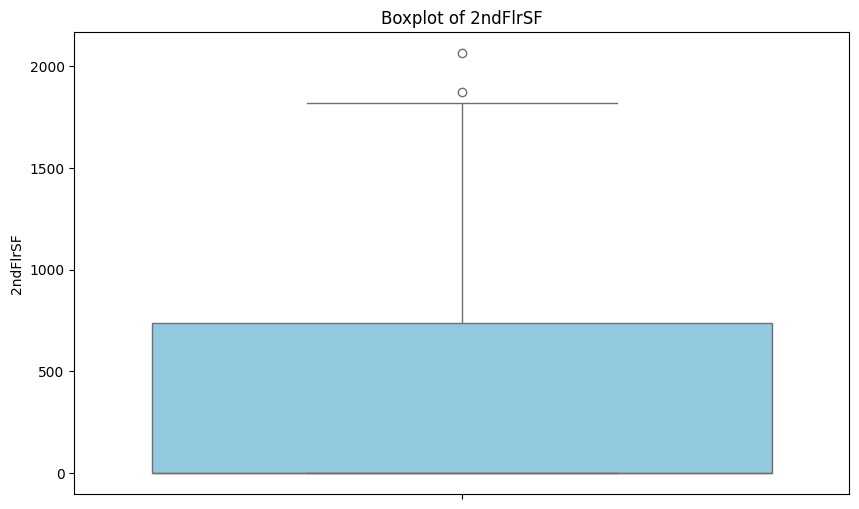

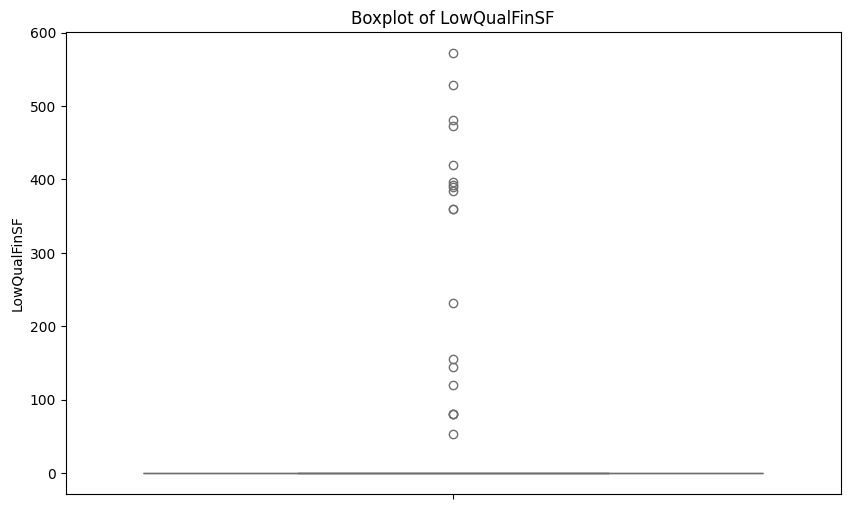

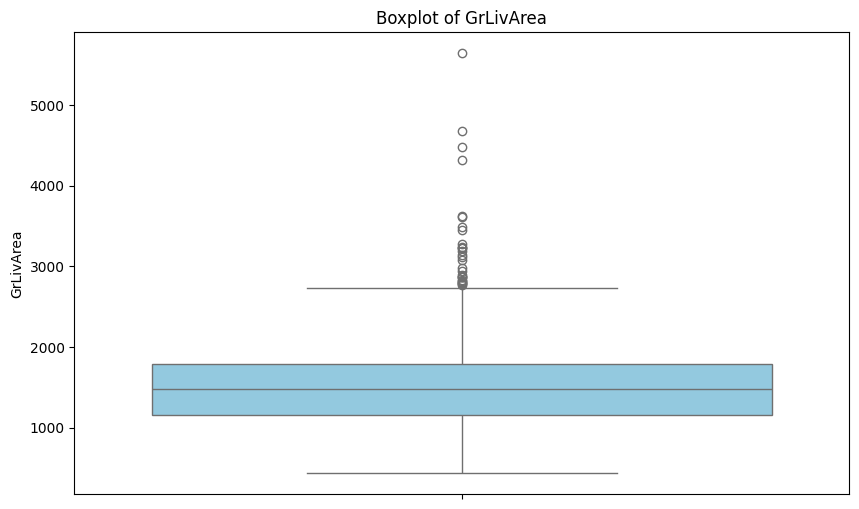

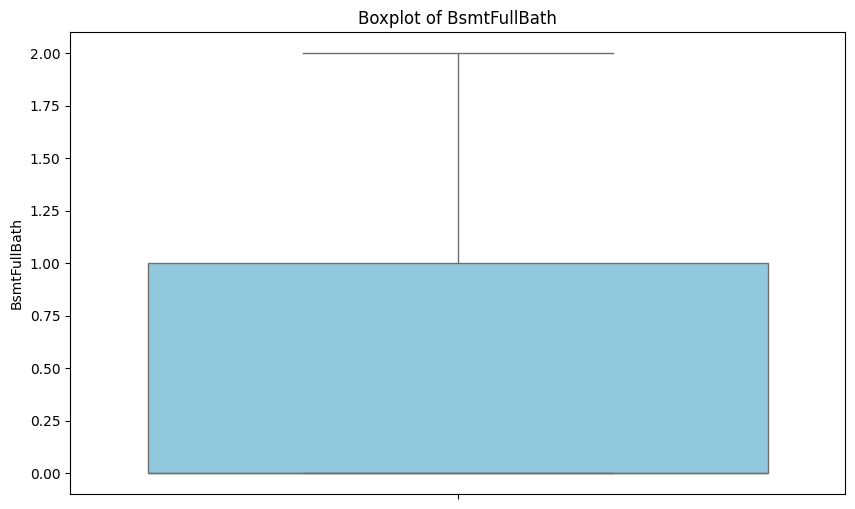

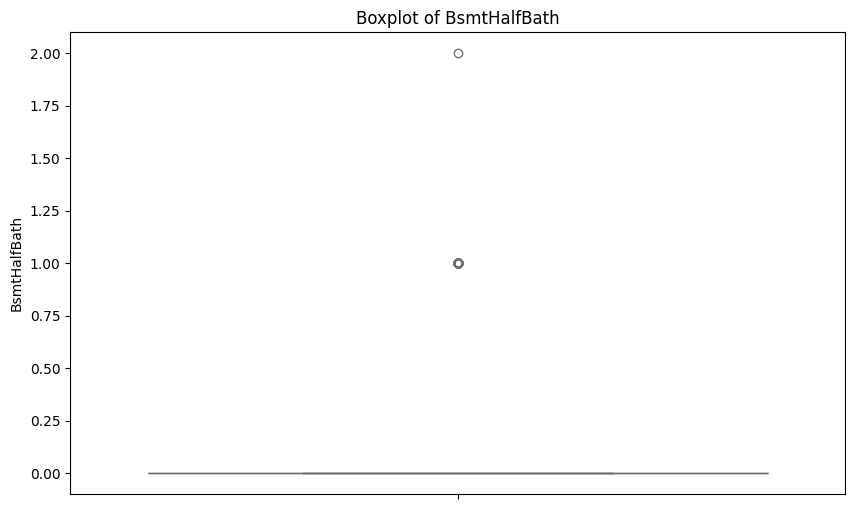

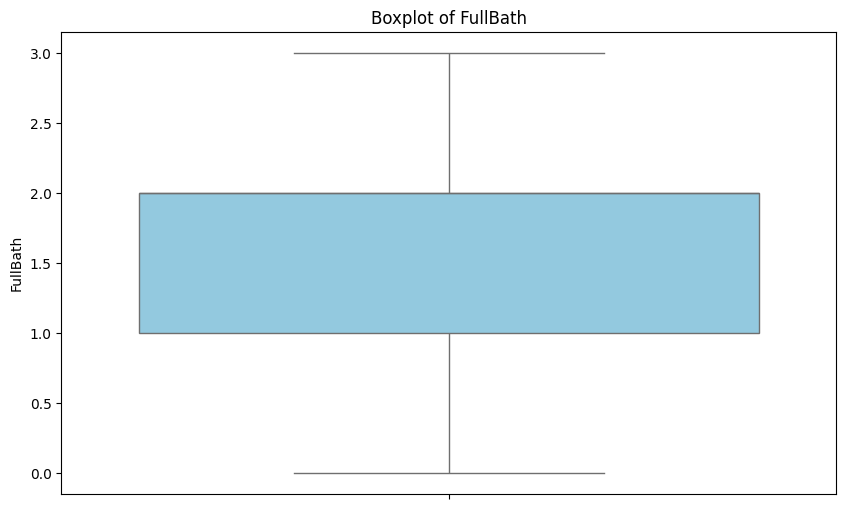

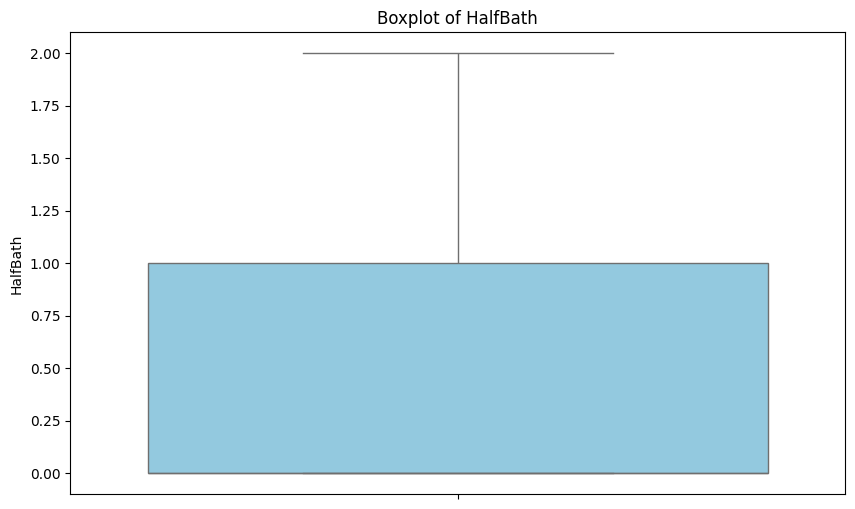

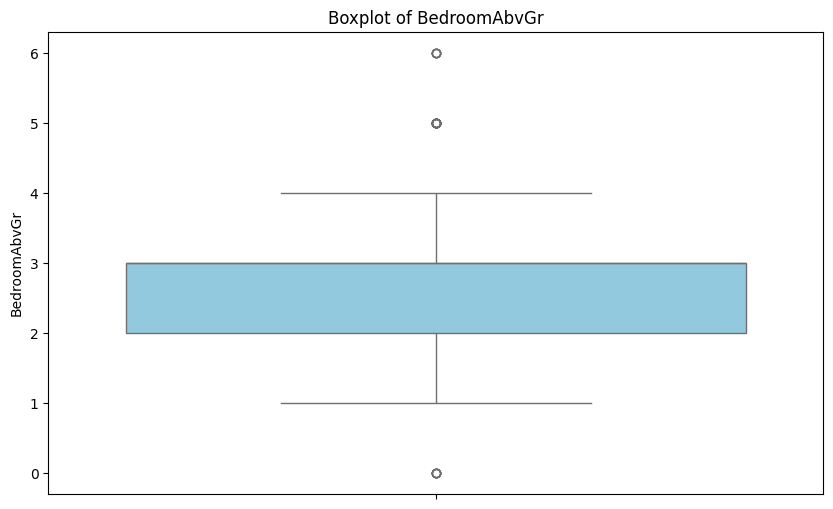

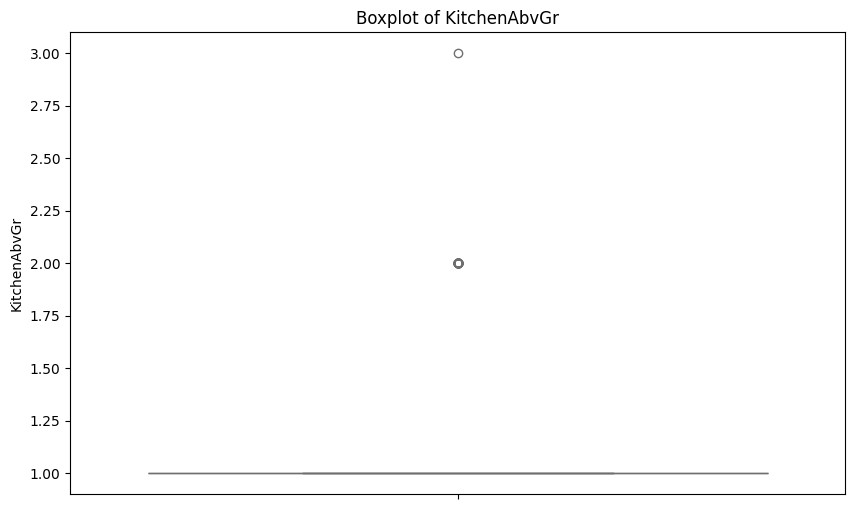

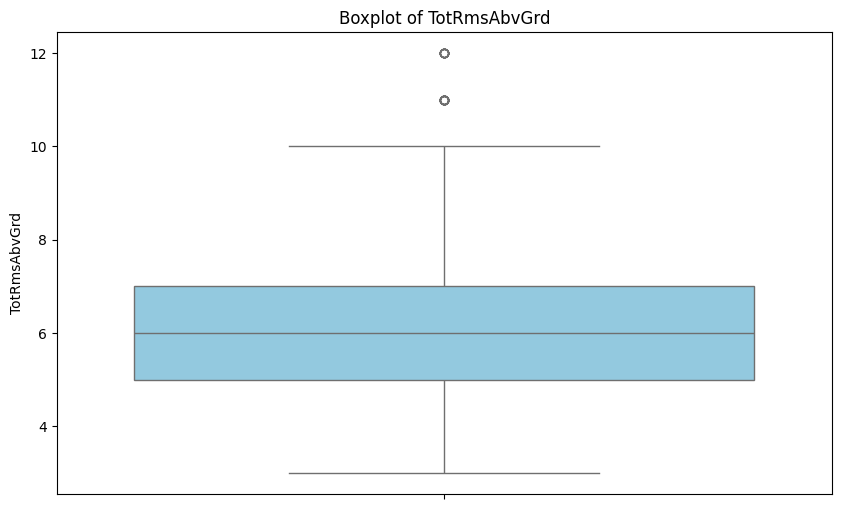

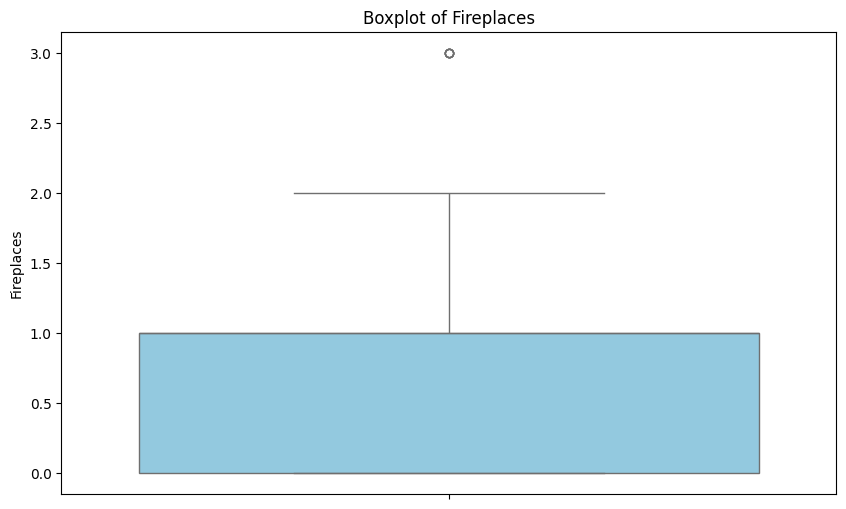

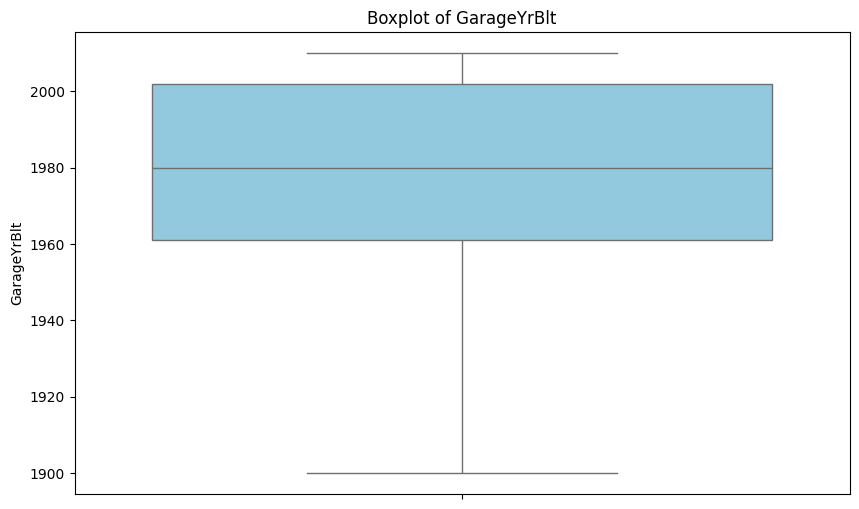

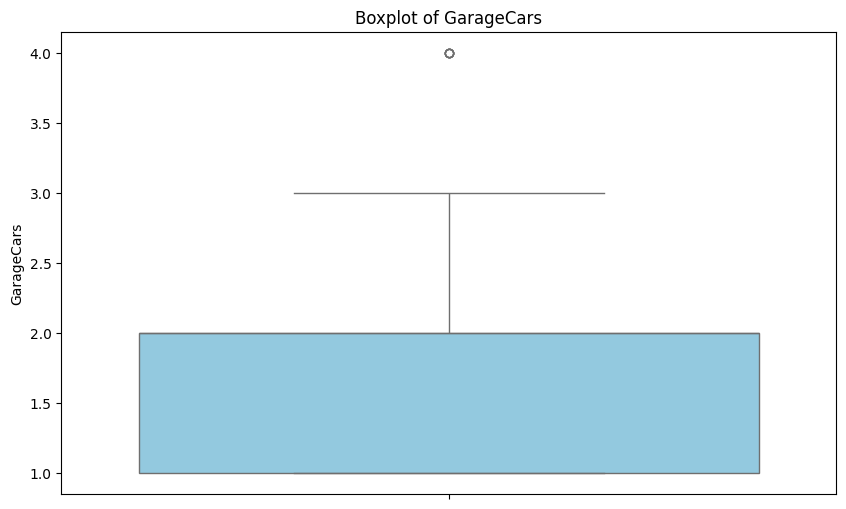

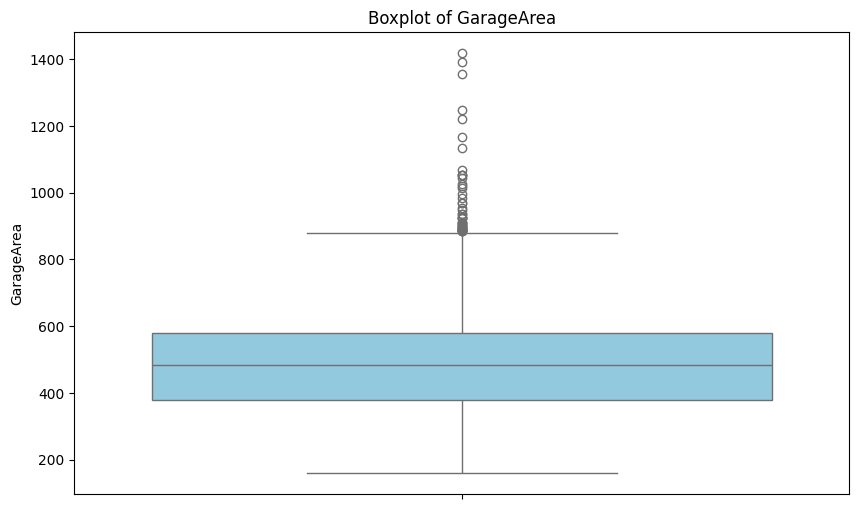

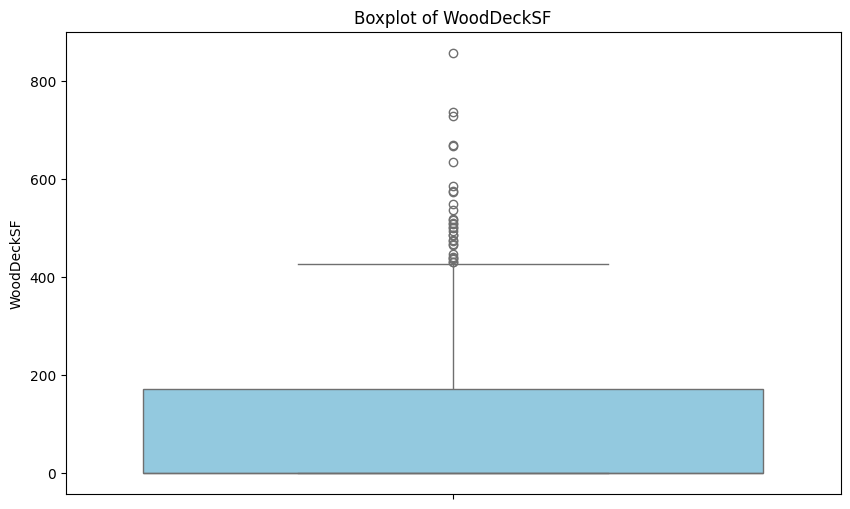

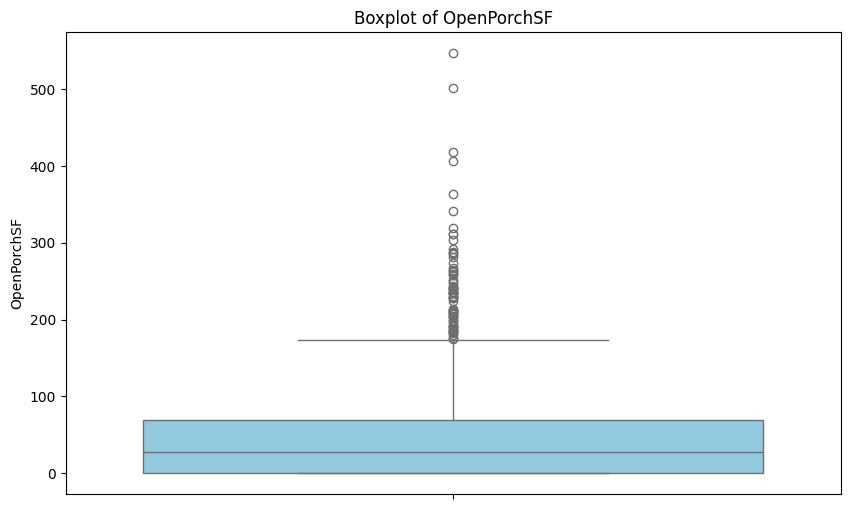

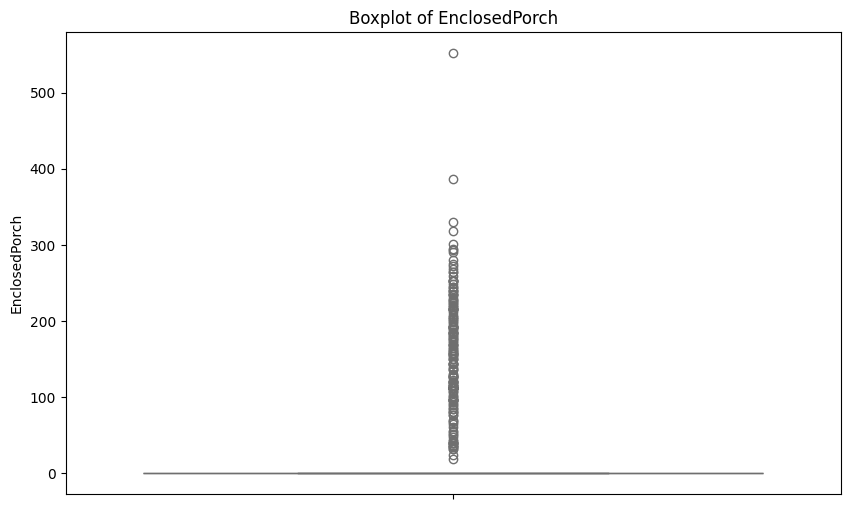

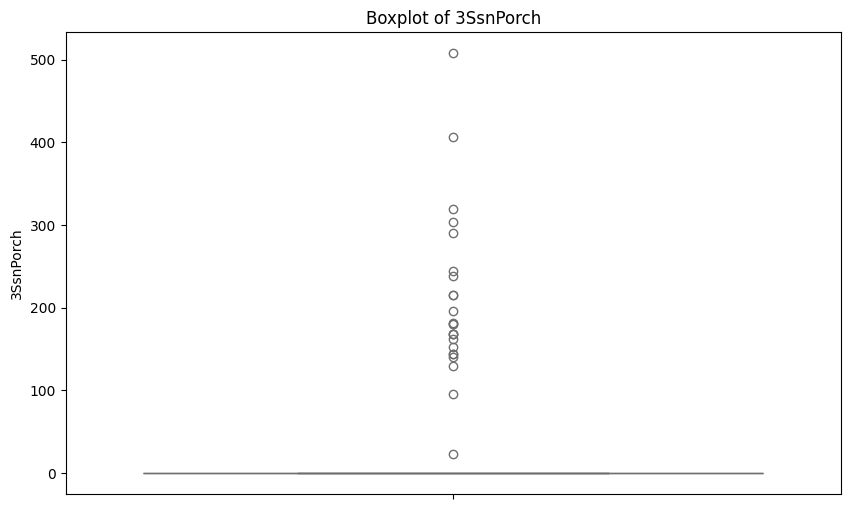

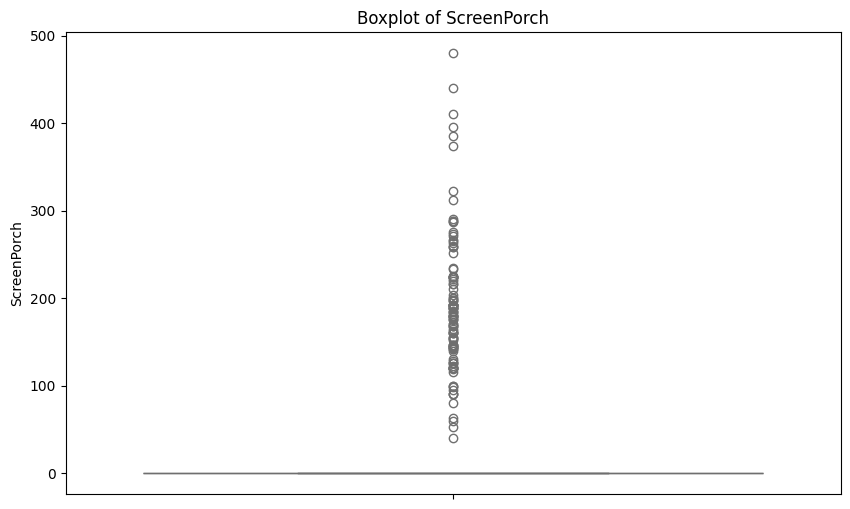

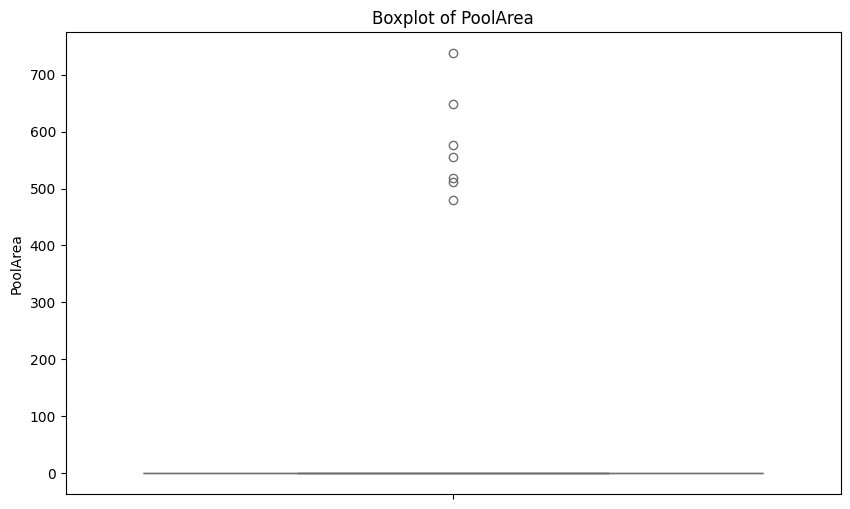

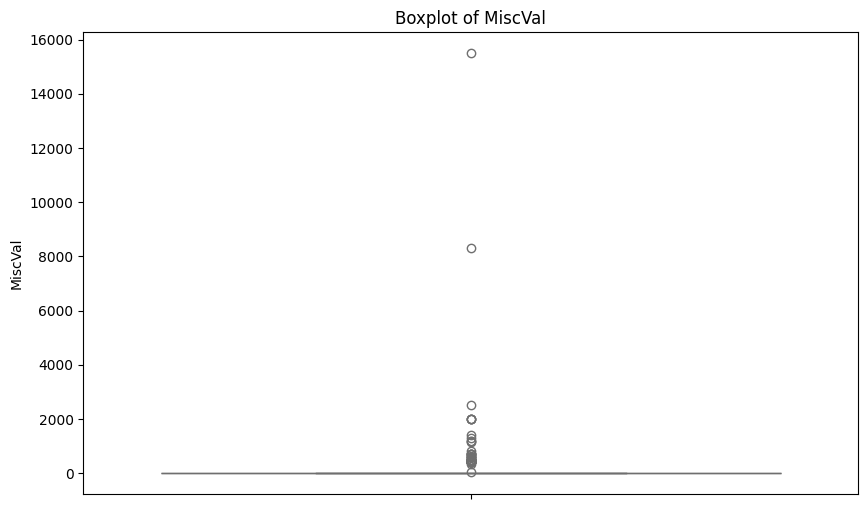

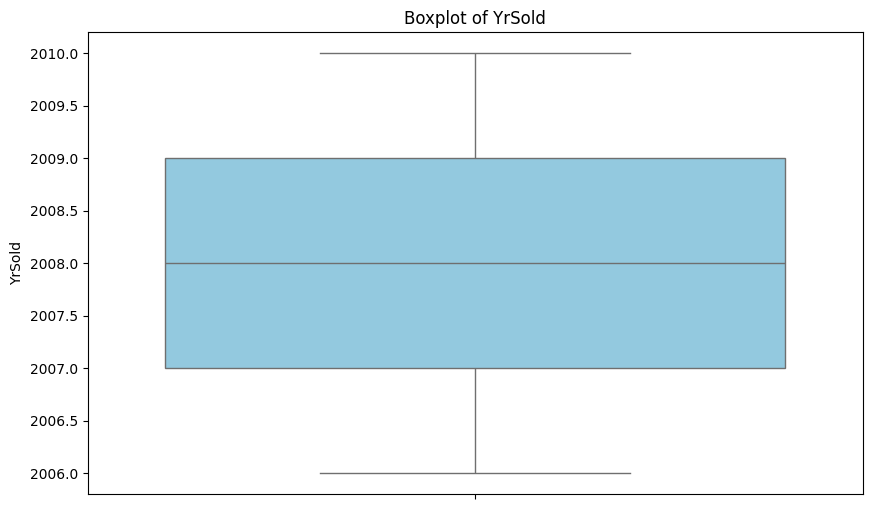

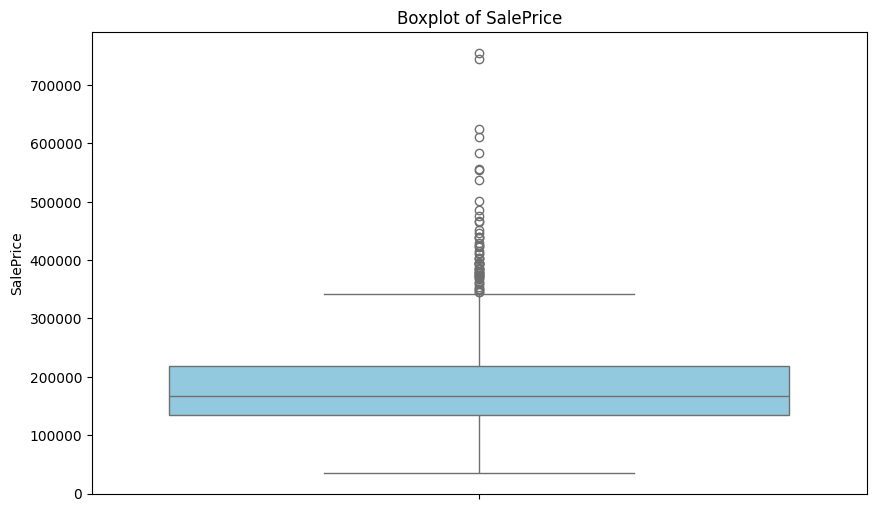

In [13]:
# Plotting boxplot for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


These boxplots help visualize the distribution and spread of each numerical variable in the dataset, facilitating the identification of outliers, variability, and overall patterns.






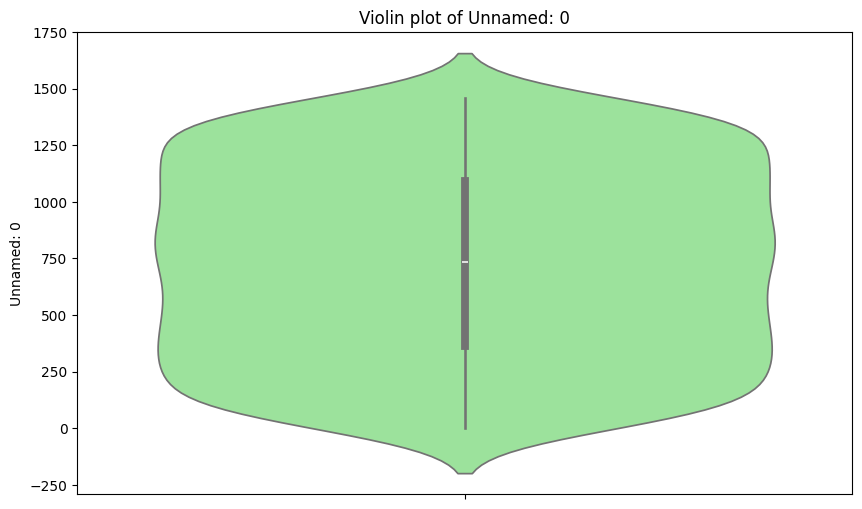

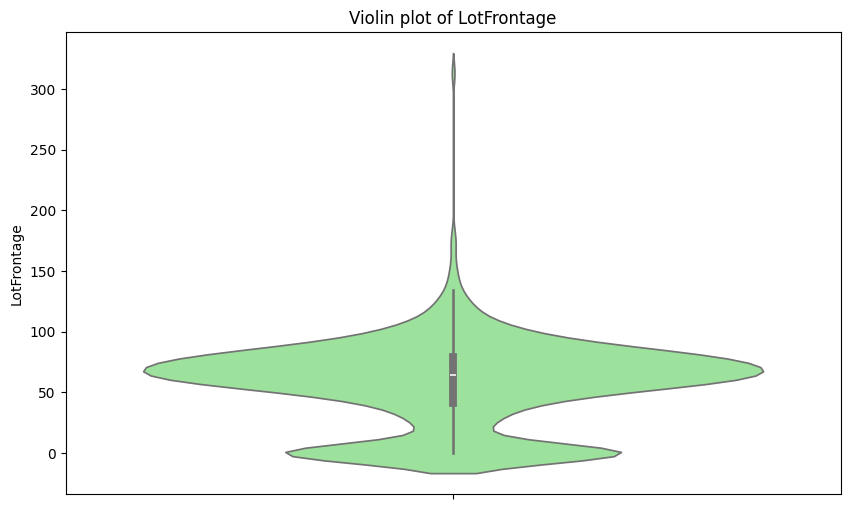

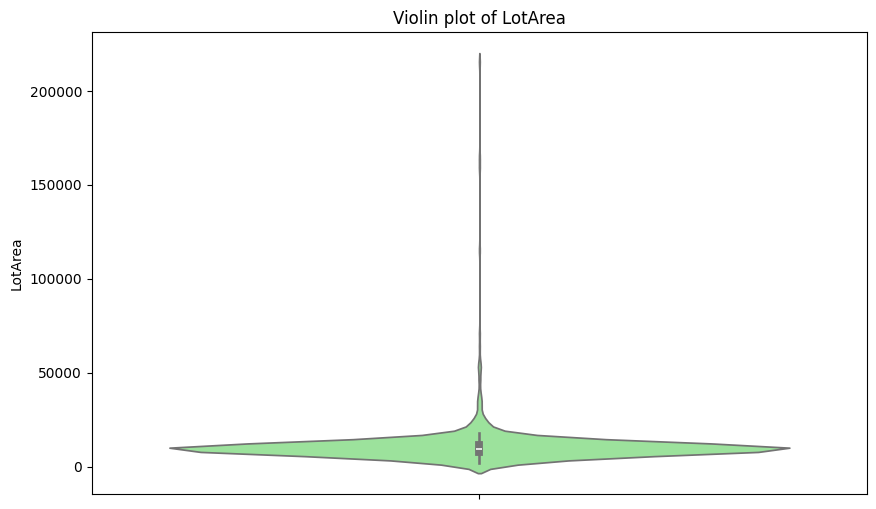

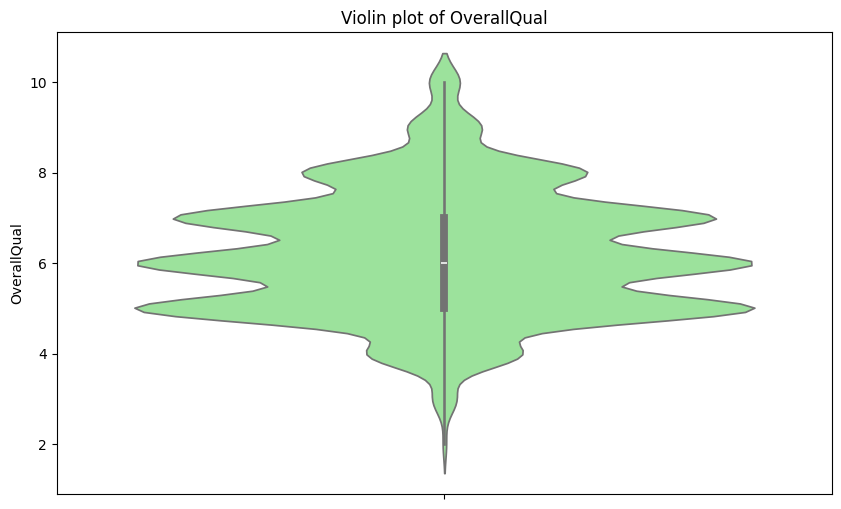

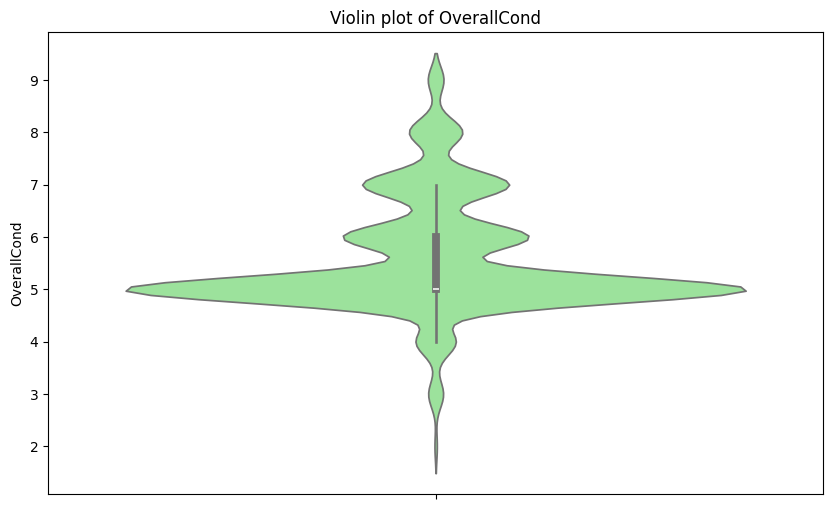

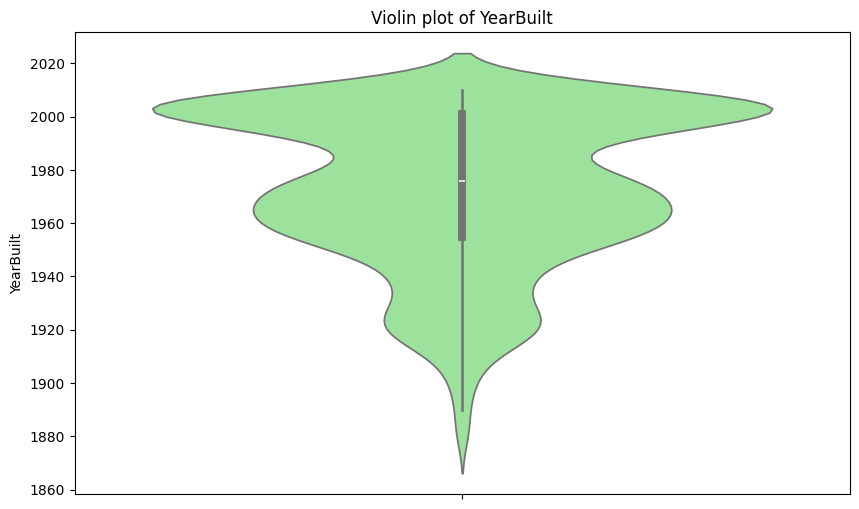

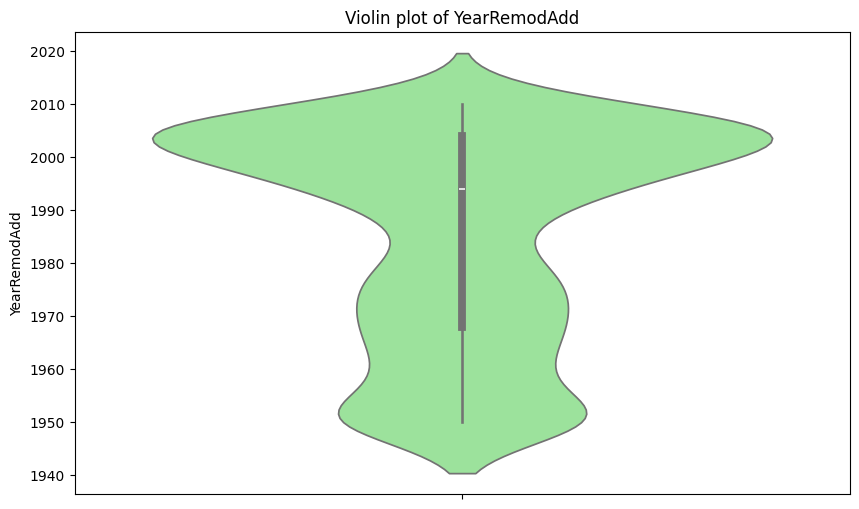

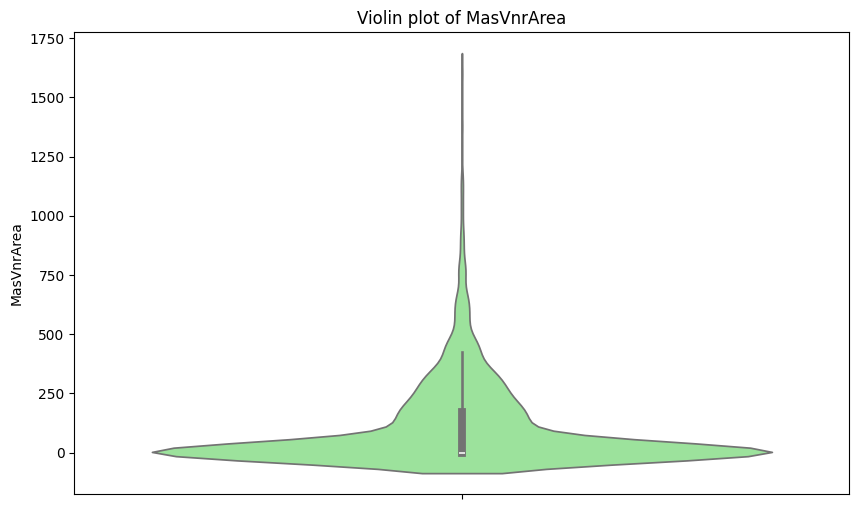

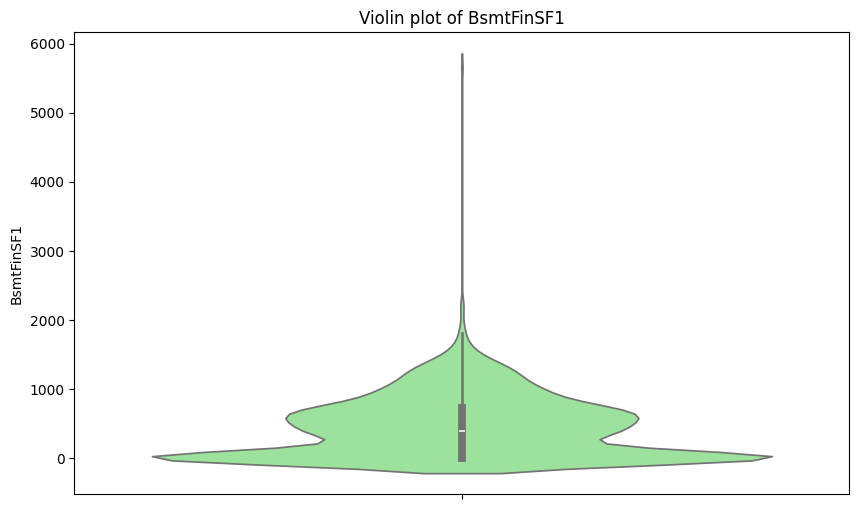

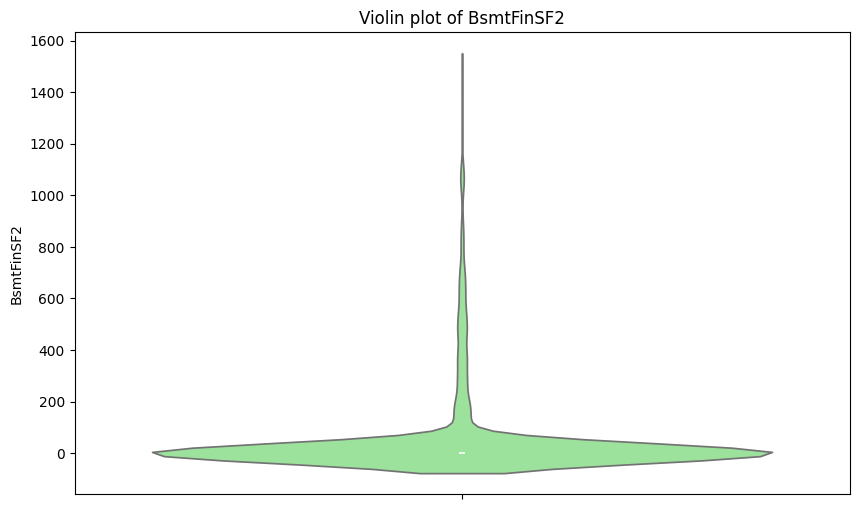

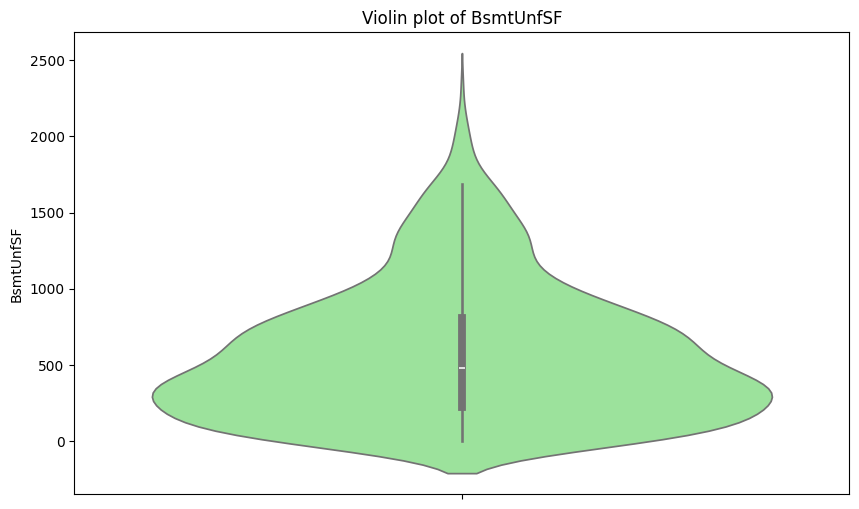

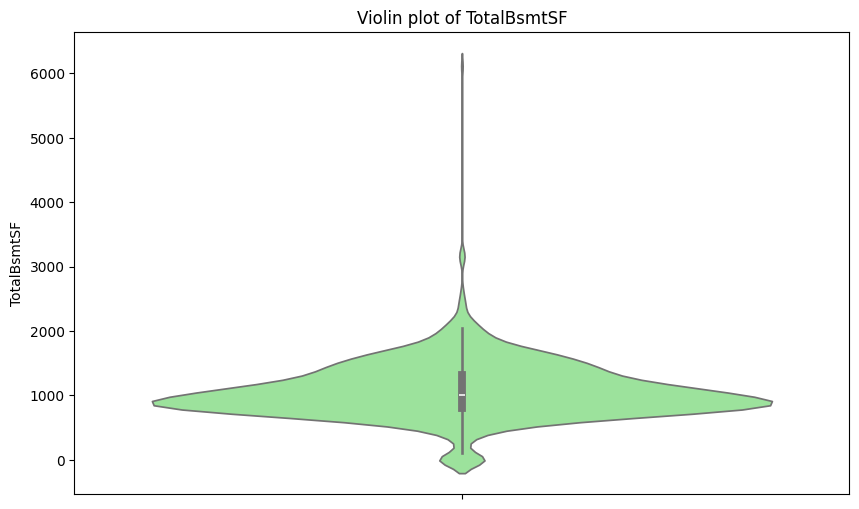

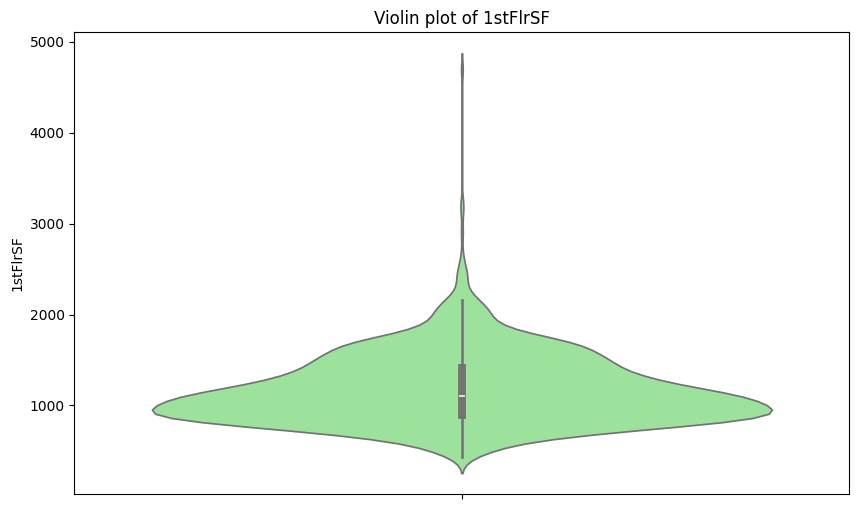

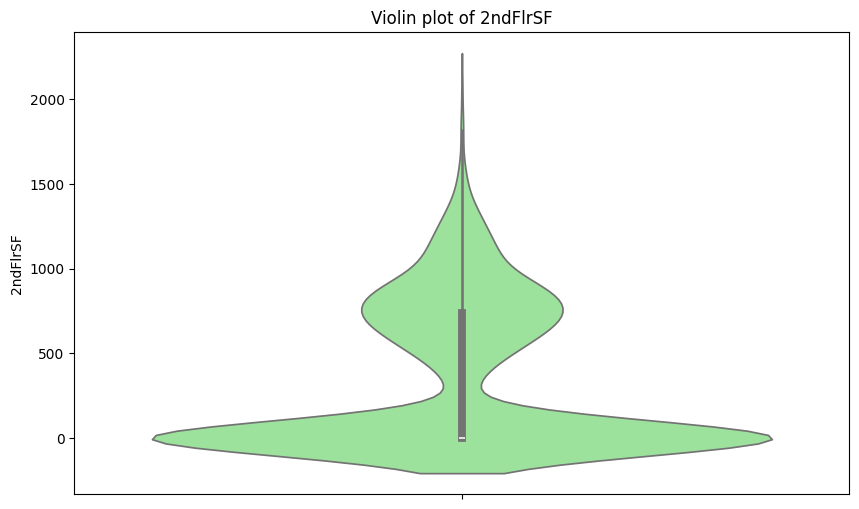

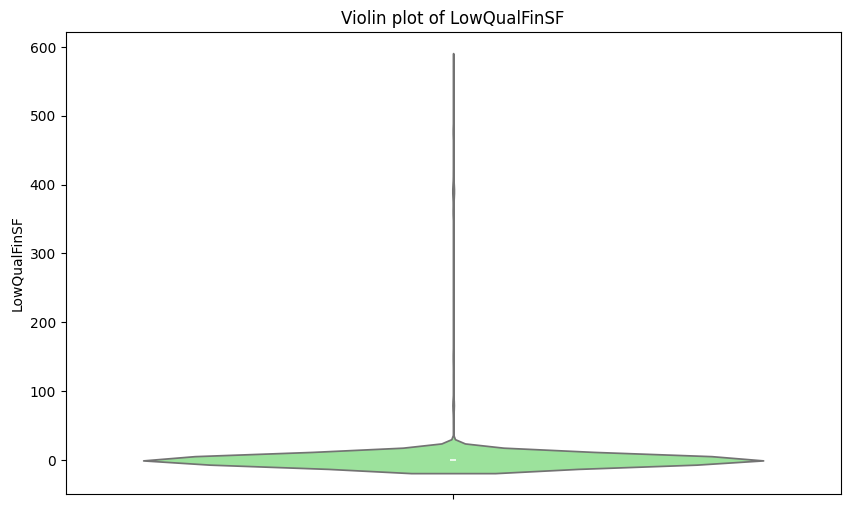

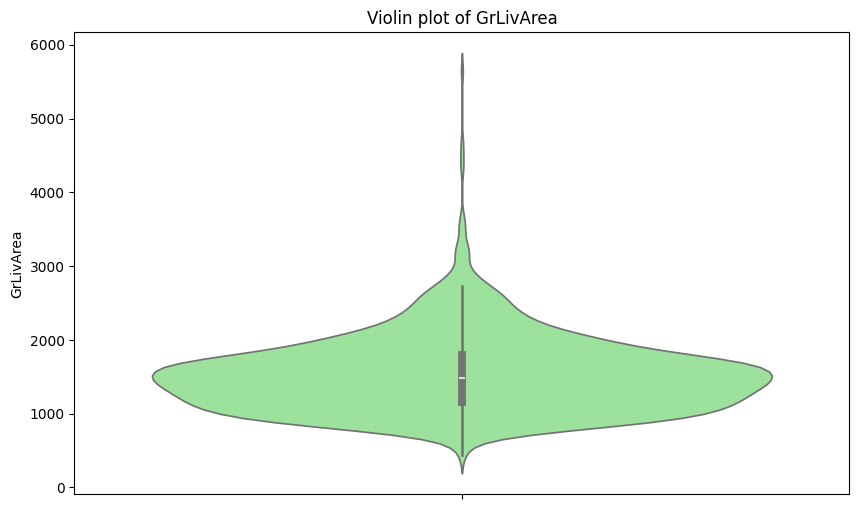

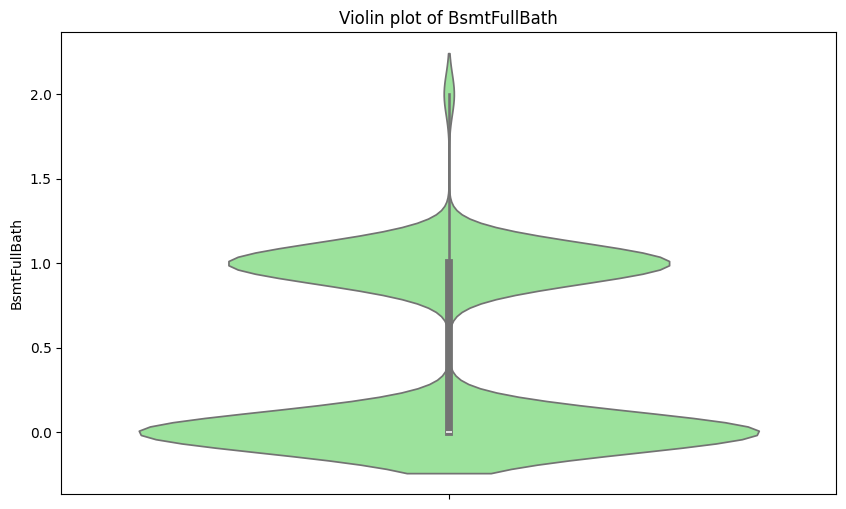

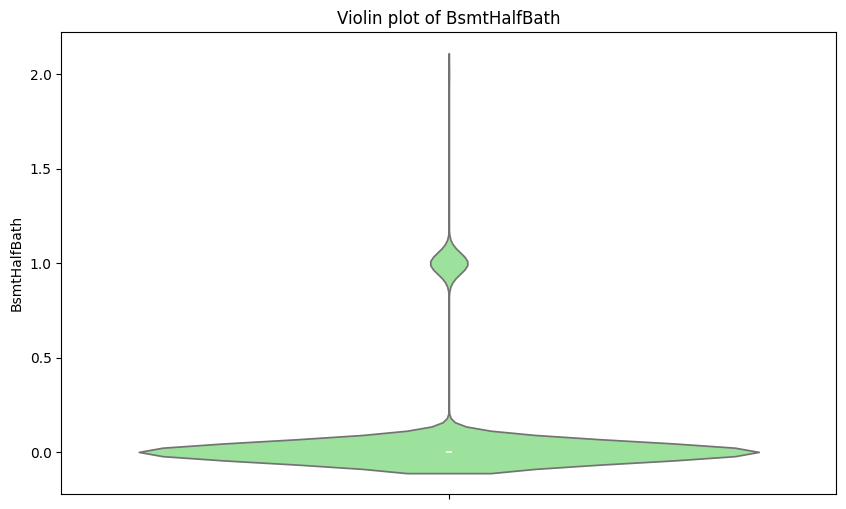

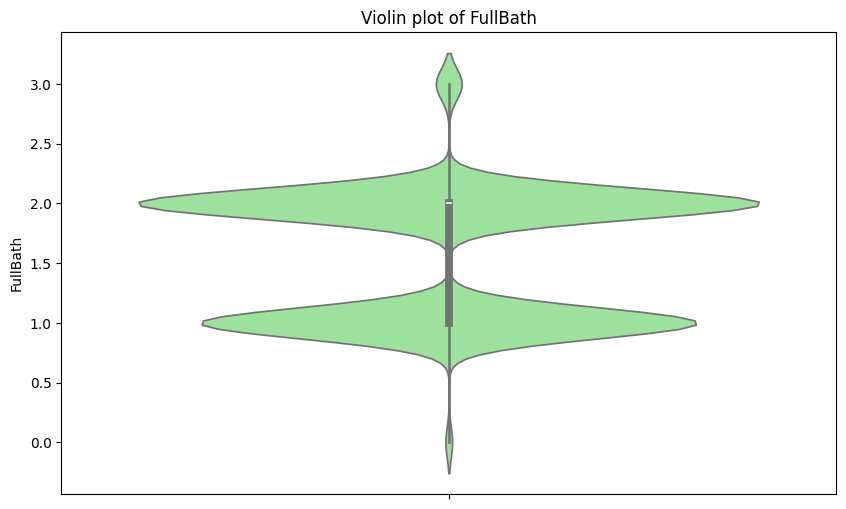

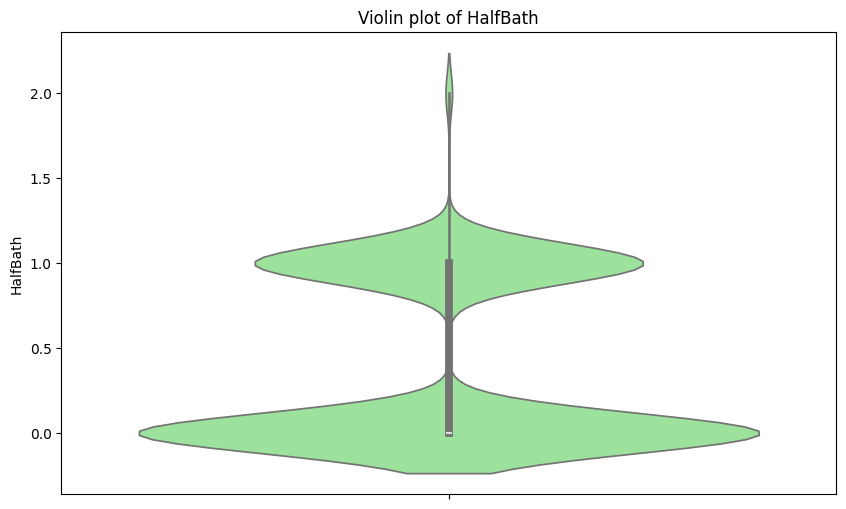

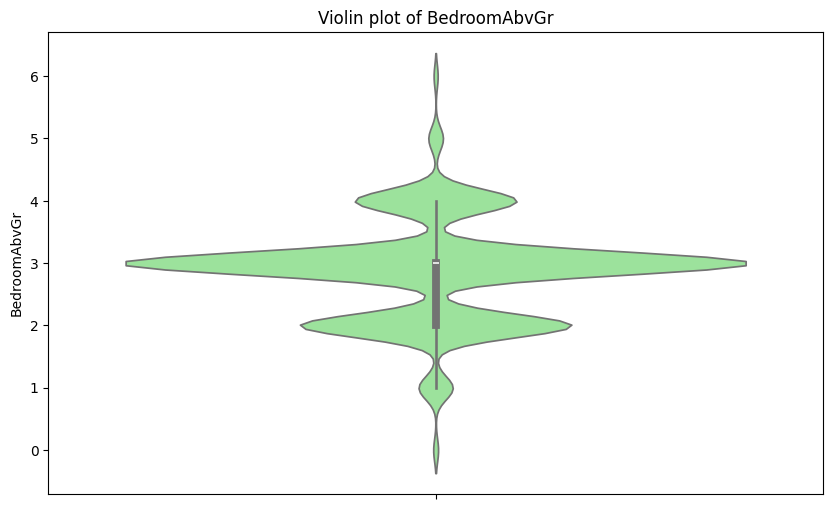

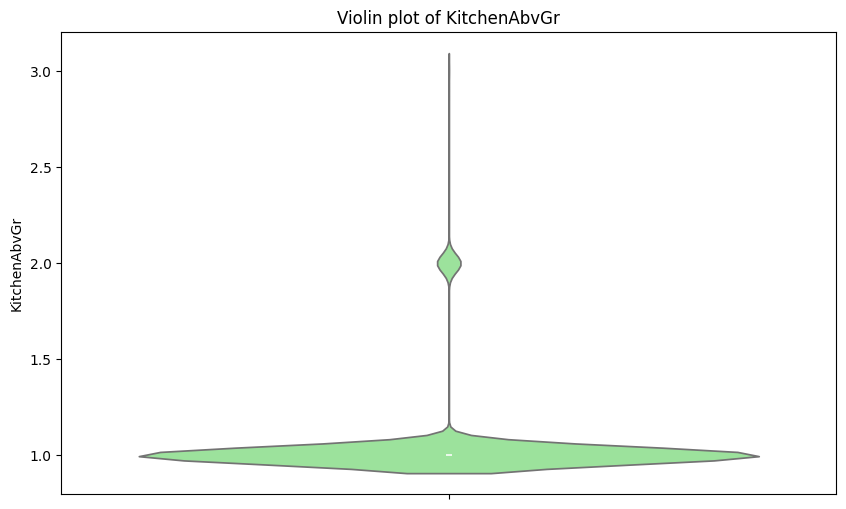

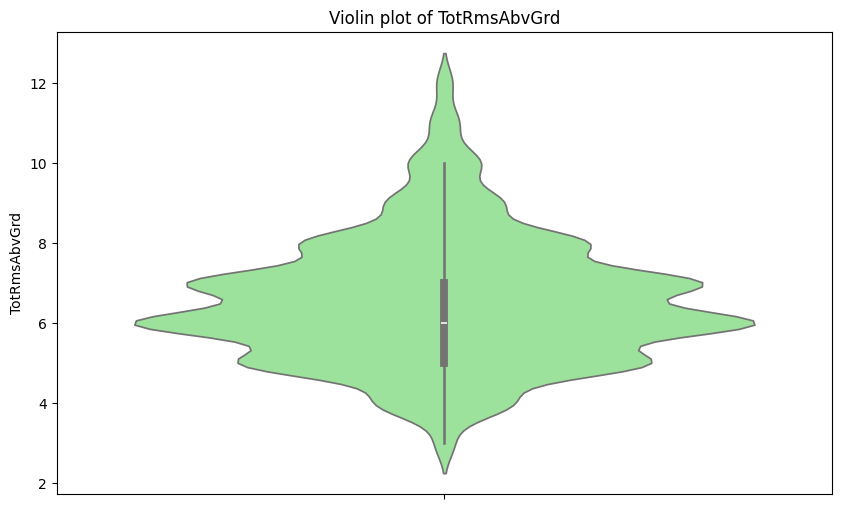

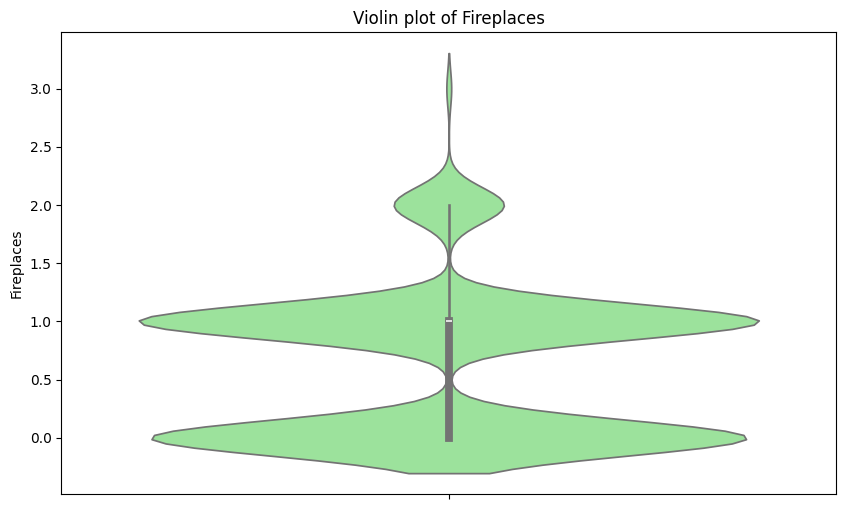

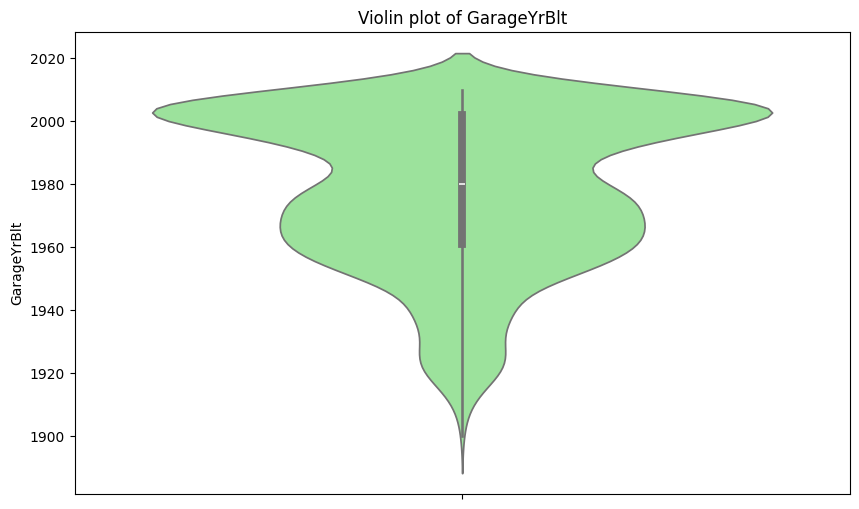

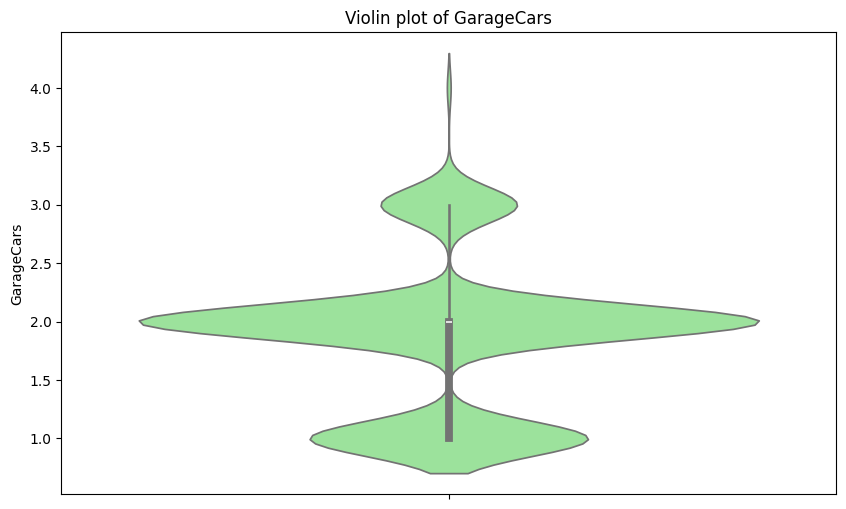

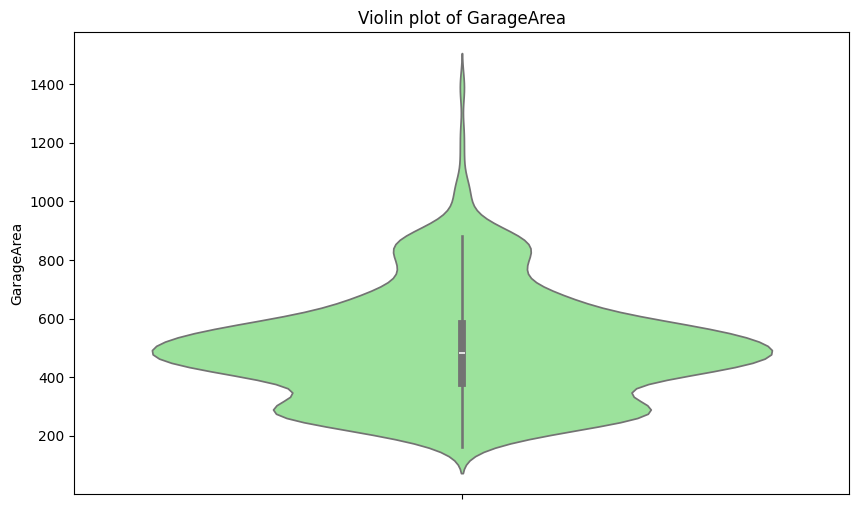

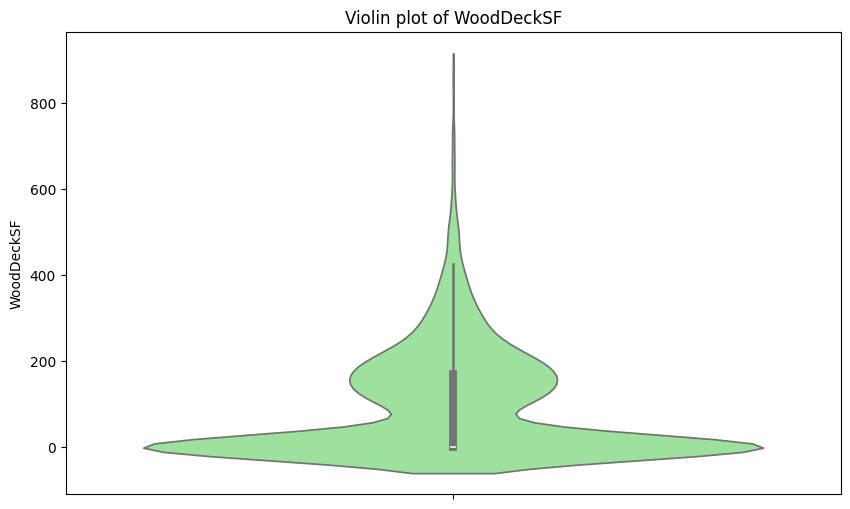

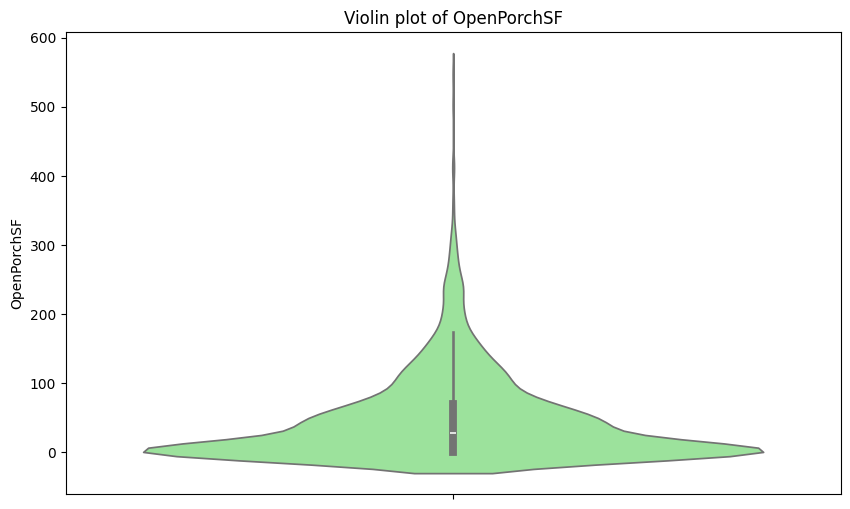

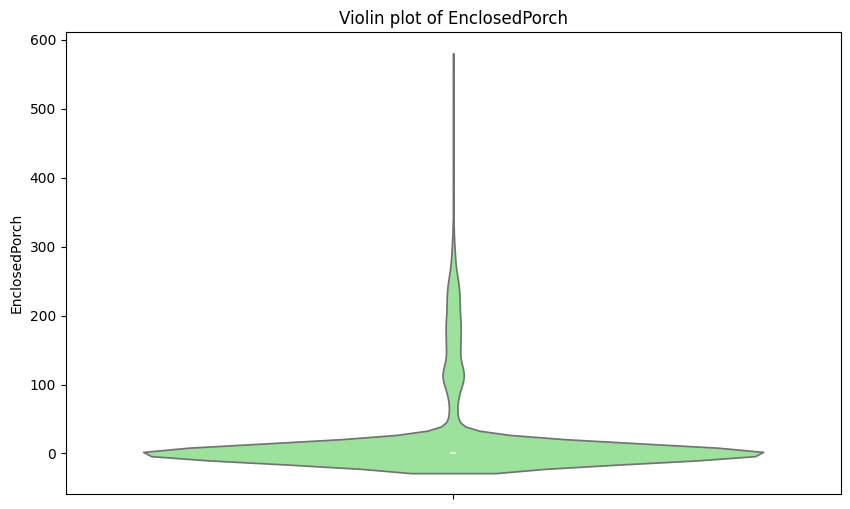

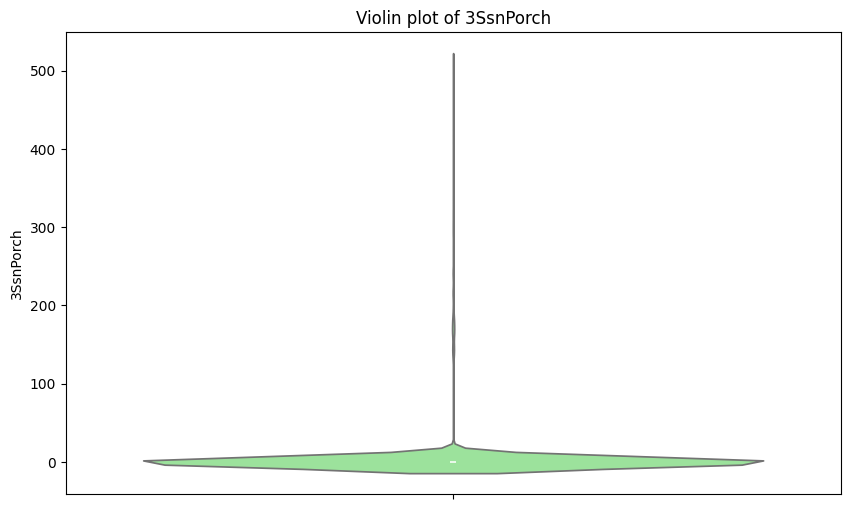

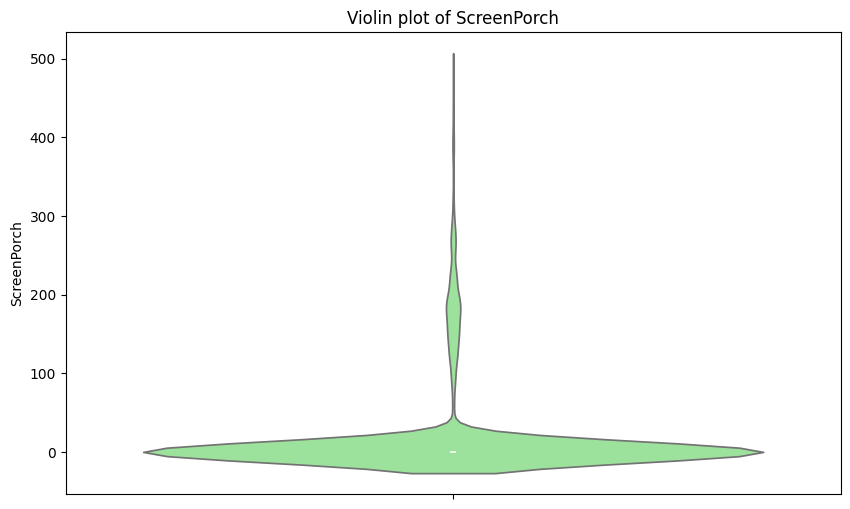

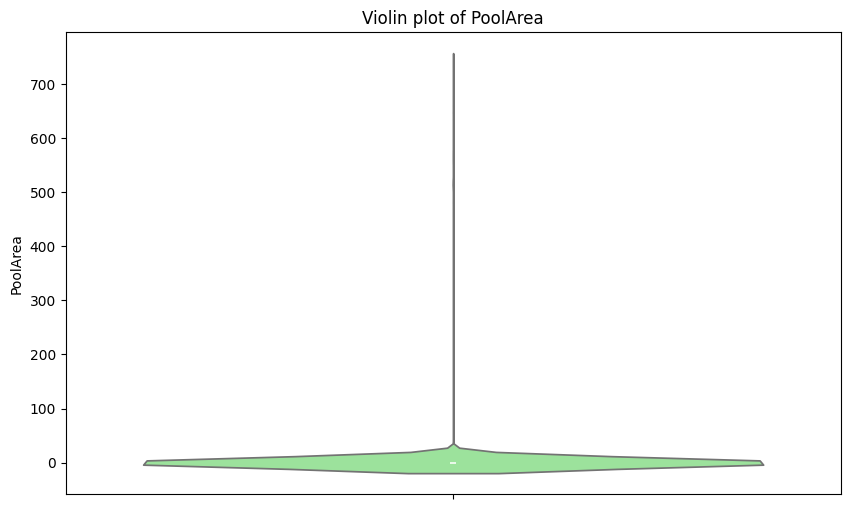

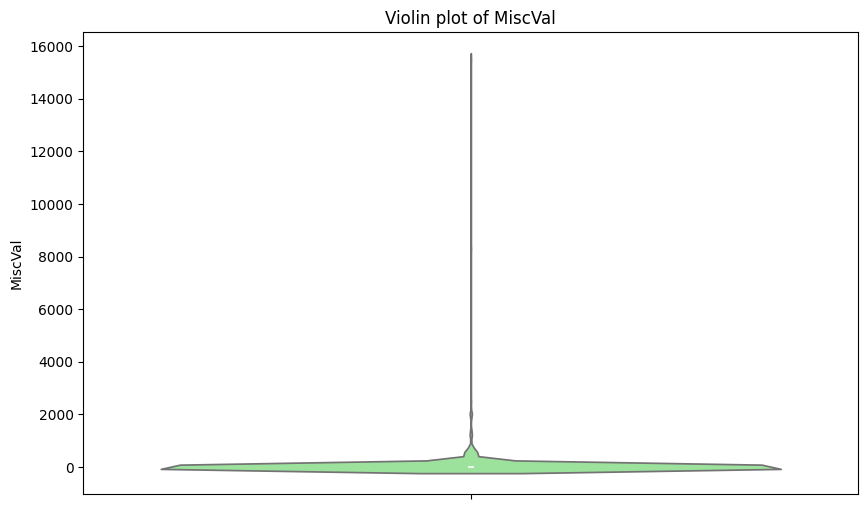

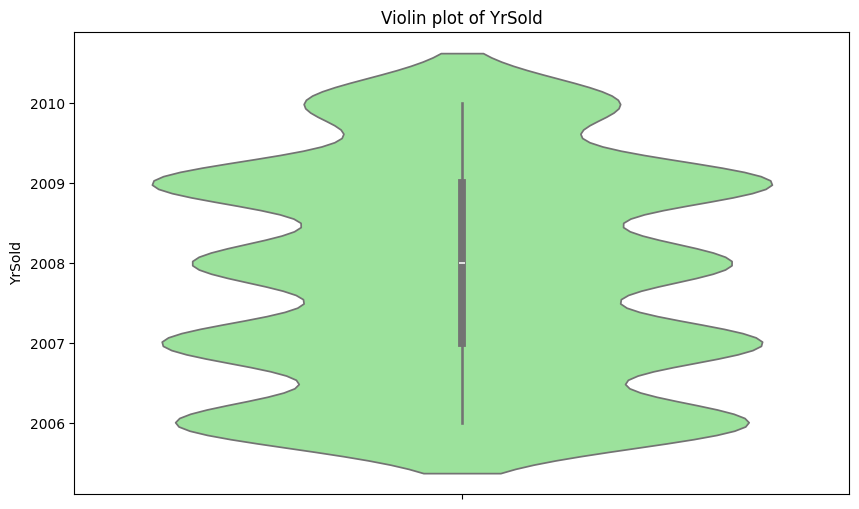

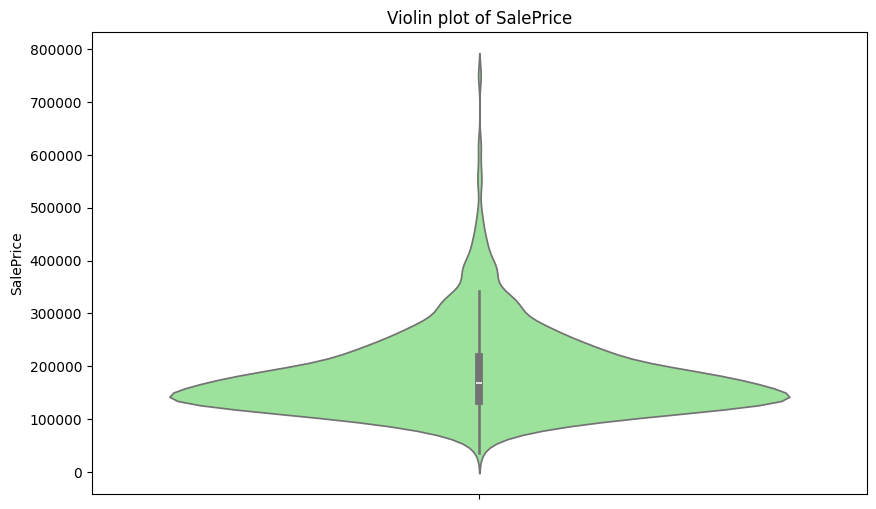

In [14]:

# Plotting violin plot for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, y=col, color='lightgreen')
    plt.title(f'Violin plot of {col}')
    plt.ylabel(col)
    plt.show()


There are 6 unique categories, with "Normal" being the most frequent, occurring 1136 times.

They illustrate the distribution of numerical data, showcasing the density, median, interquartile range, and outliers for each variable.

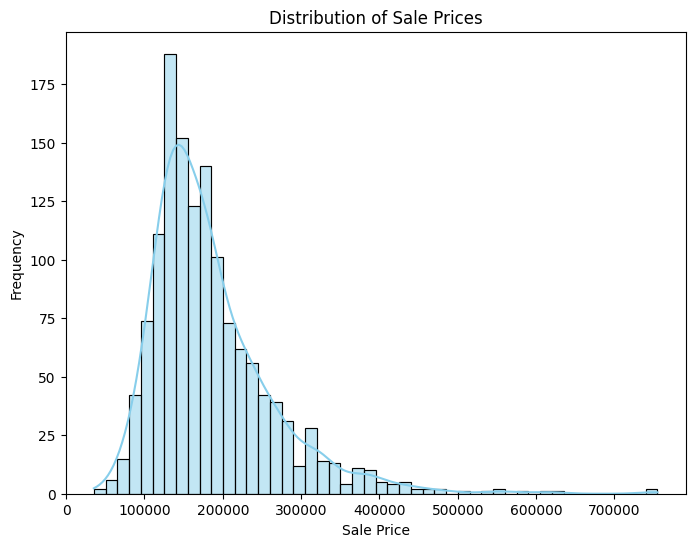

In [15]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



The histogram of sale prices shows that there are a total of 1378 observations. The mean sale price is approximately $185,493, with a standard deviation of approximately $79,051. The sale prices range from a minimum of $35,311 to a maximum of an unspecified value. Additionally, the median sale price (50th percentile) is $167,700, and the 25th percentile (Q1) is $134,000.The histogram of sale prices exhibits right-skewness, indicating that the distribution is skewed towards higher sale prices. This is evident from the longer tail extending towards the higher sale price values, while the bulk of the data is concentrated towards the lower end.

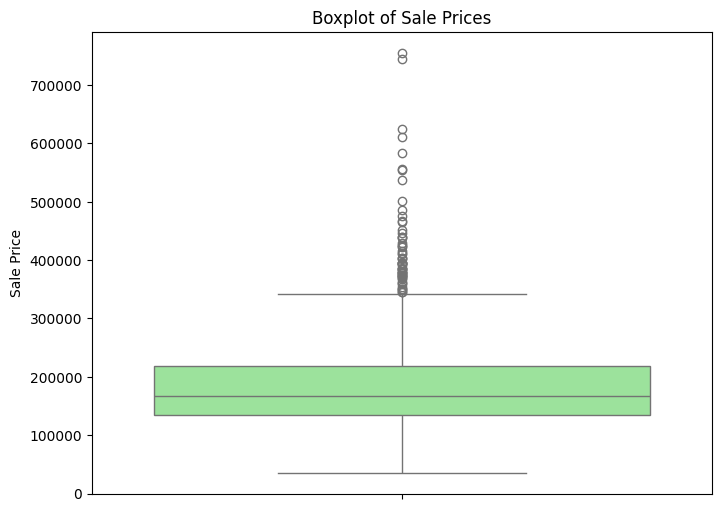

In [16]:

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='SalePrice', color='lightgreen')
plt.title('Boxplot of Sale Prices')
plt.ylabel('Sale Price')
plt.show()


The box represents the interquartile range (IQR) from $134,000.00 to $217,875.00, encompassing the middle 50% of the data.
The median sale price ($167,700.00) is represented by the line inside the box.
The whiskers extend from the edges of the box to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
Any data points beyond the whiskers are considered outliers and plotted individually.

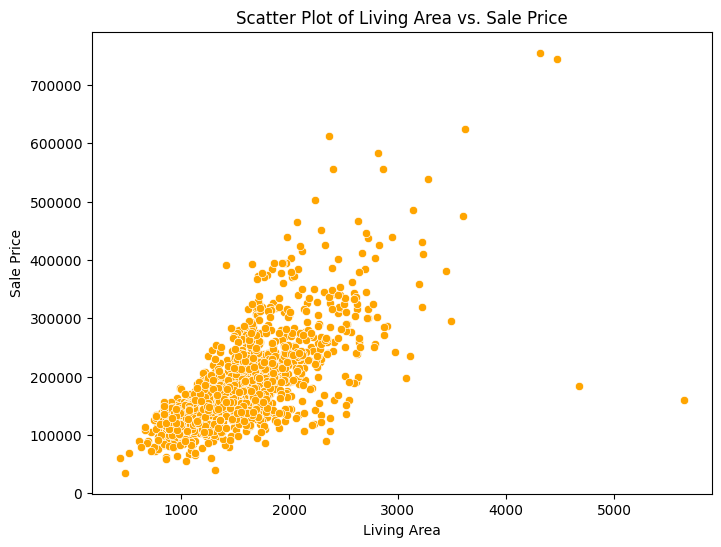

In [17]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', color='orange')
plt.title('Scatter Plot of Living Area vs. Sale Price')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()

Increase in living Area is increasing the Sale Price

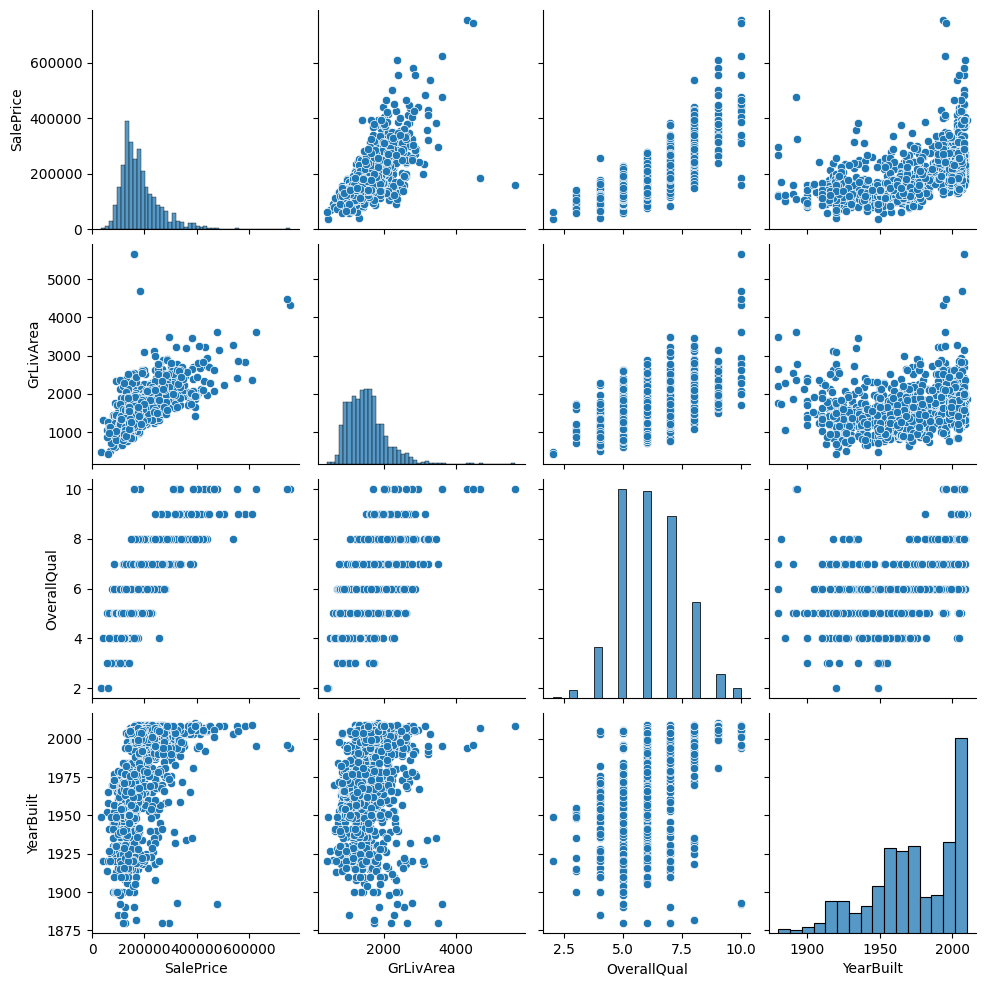

In [18]:
# Pair plot
sns.pairplot(df[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])
plt.show()

 This pair plot provides a comprehensive visual summary of the relationships between numerical variables in the dataset, aiding in exploratory data analysis and identifying potential patterns or trends.

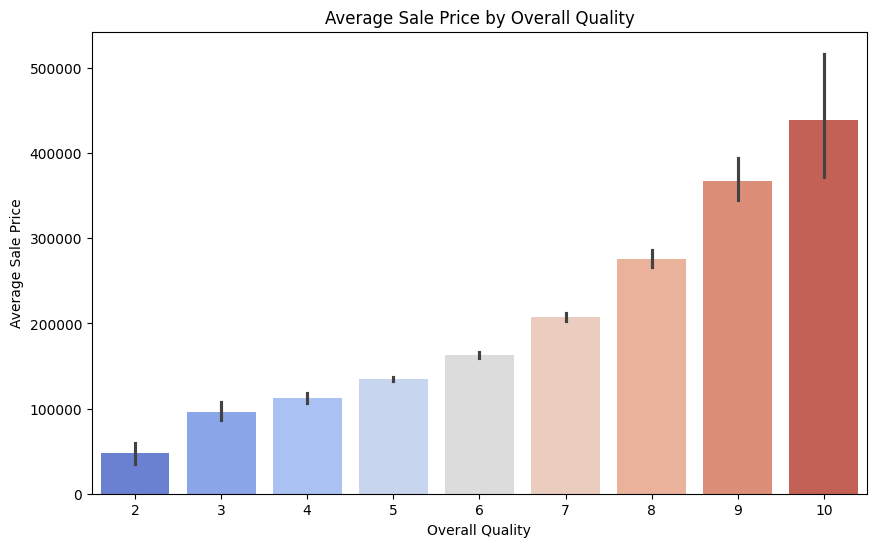

In [19]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='OverallQual', y='SalePrice', palette='coolwarm')
plt.title('Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.show()


The black lines depict 95% confidence intervals around the average sale price for each level of overall quality, illustrating the variability in the sale price estimate. Notably, quality level 10 exhibits the highest variability, with the longest black line, while level 5 has the shortest line, suggesting less variability in average sale prices. This underscores a positive correlation between property quality and sale price, with higher-quality properties generally fetching higher sale prices compared to lower-quality ones.

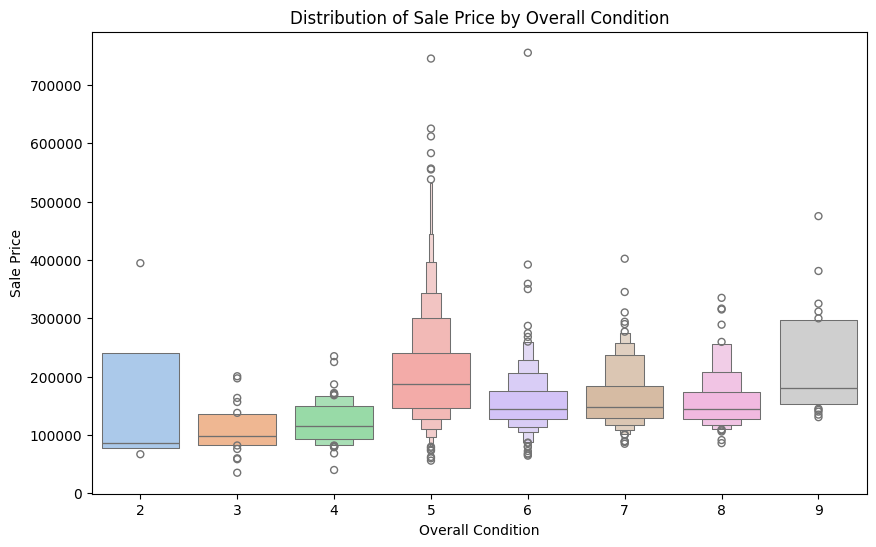

In [21]:
# Boxen plots
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='OverallCond', y='SalePrice', palette='pastel')
plt.title('Distribution of Sale Price by Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

 the analysis of property conditions reveals key insights into their impact on sale prices:

Overall condition 2: Properties in this condition generally have lower median sale prices, with few outliers indicating limited variability.

Overall condition 5: Properties in this condition exhibit a wider range of sale prices, with numerous outliers suggesting higher variability influenced by factors like renovations.

Overall condition 9: Similar to condition 2, properties here tend to have lower median sale prices, but with some outliers indicating variability in sale prices.

Overall, while property condition plays a significant role in determining sale prices, other factors like location and amenities also contribute to price variability.

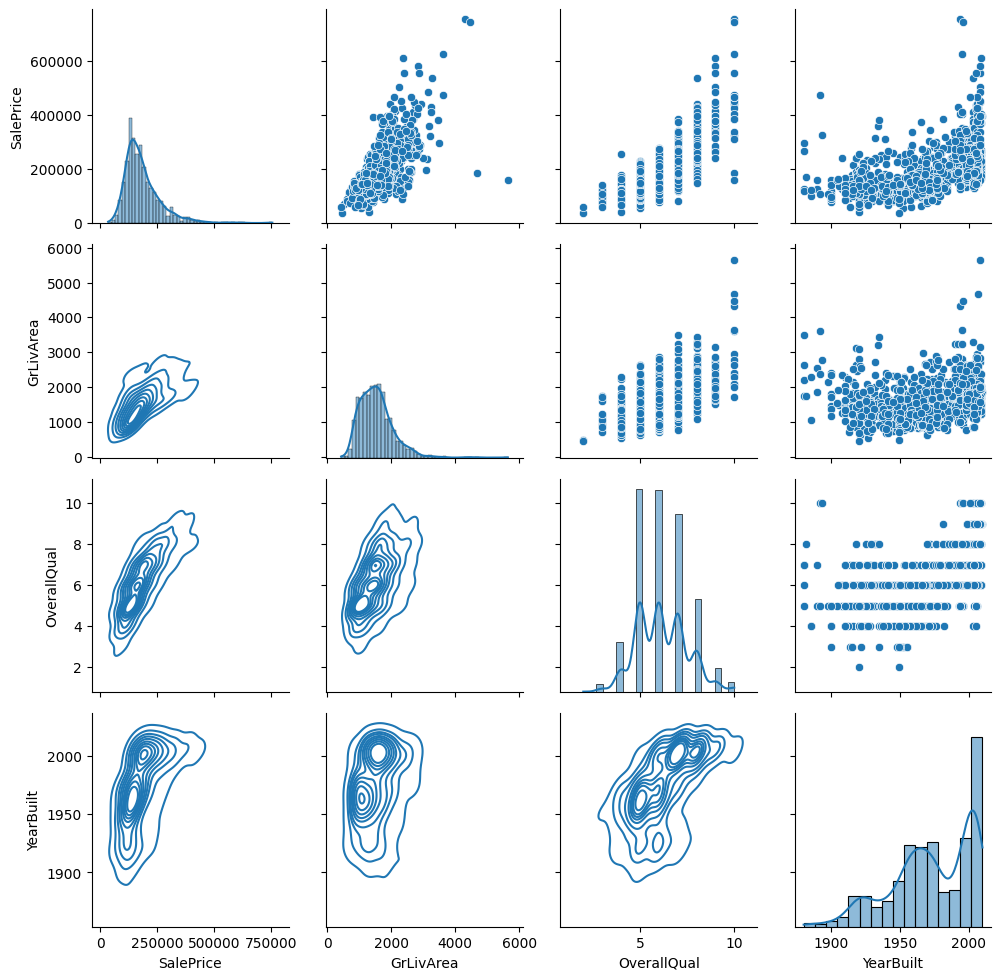

In [22]:
# PairGrid
g = sns.PairGrid(df[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
plt.show()


Strong positive correlation between SalePrice and OverallQual (0.79), indicating higher quality ratings correspond to higher sale prices.
Moderate positive correlation between SalePrice and GrLivArea (0.61), suggesting larger living areas are associated with higher sale prices.
Moderate positive correlation between SalePrice and YearBuilt (0.52), implying newer properties generally command higher sale prices.
Moderate positive correlation between GrLivArea and OverallQual (0.54), indicating larger living areas often coincide with higher quality ratings.
Weak positive correlation between GrLivArea and YearBuilt (0.25), suggesting a slight tendency for larger living areas in newer properties.
Moderate positive correlation between OverallQual and YearBuilt (0.58), indicating newer properties tend to have higher quality ratings.

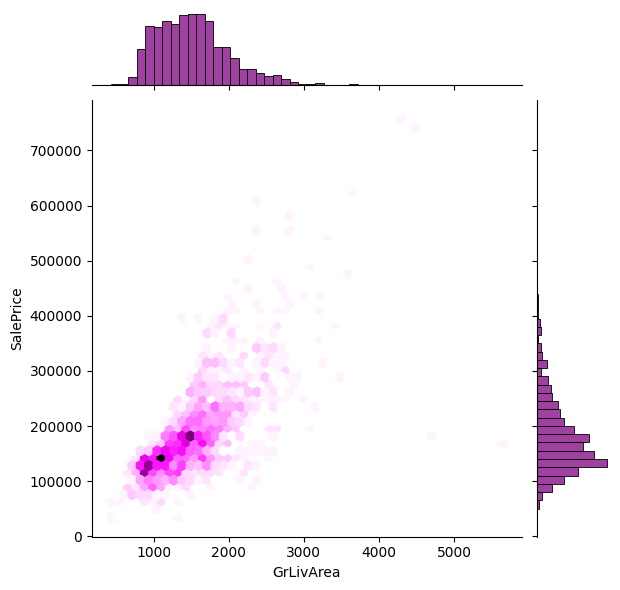

In [23]:
# Joint plot
sns.jointplot(data=df, x='GrLivArea', y='SalePrice', kind='hex', color='purple')
plt.show()

 As the sale price increases, the living area above ground tends to decrease. This could imply that higher-priced properties may have smaller living areas, possibly due to factors such as location, quality, or other amenities.

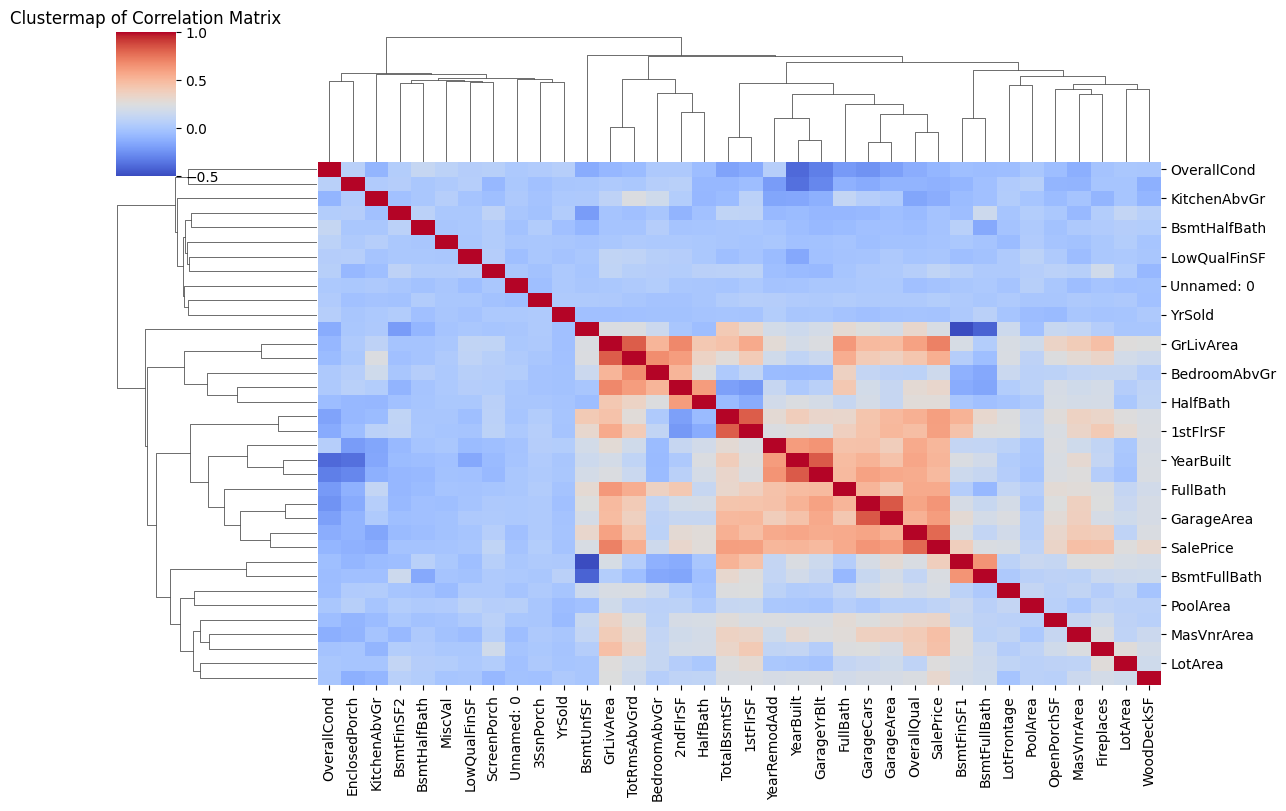

In [28]:
# Clustermap
sns.clustermap(df.corr(), cmap='coolwarm', figsize=(12, 8))
plt.title('Clustermap of Correlation Matrix')
plt.show()

In [29]:
# Numerical Columns
numerical_cols = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond']



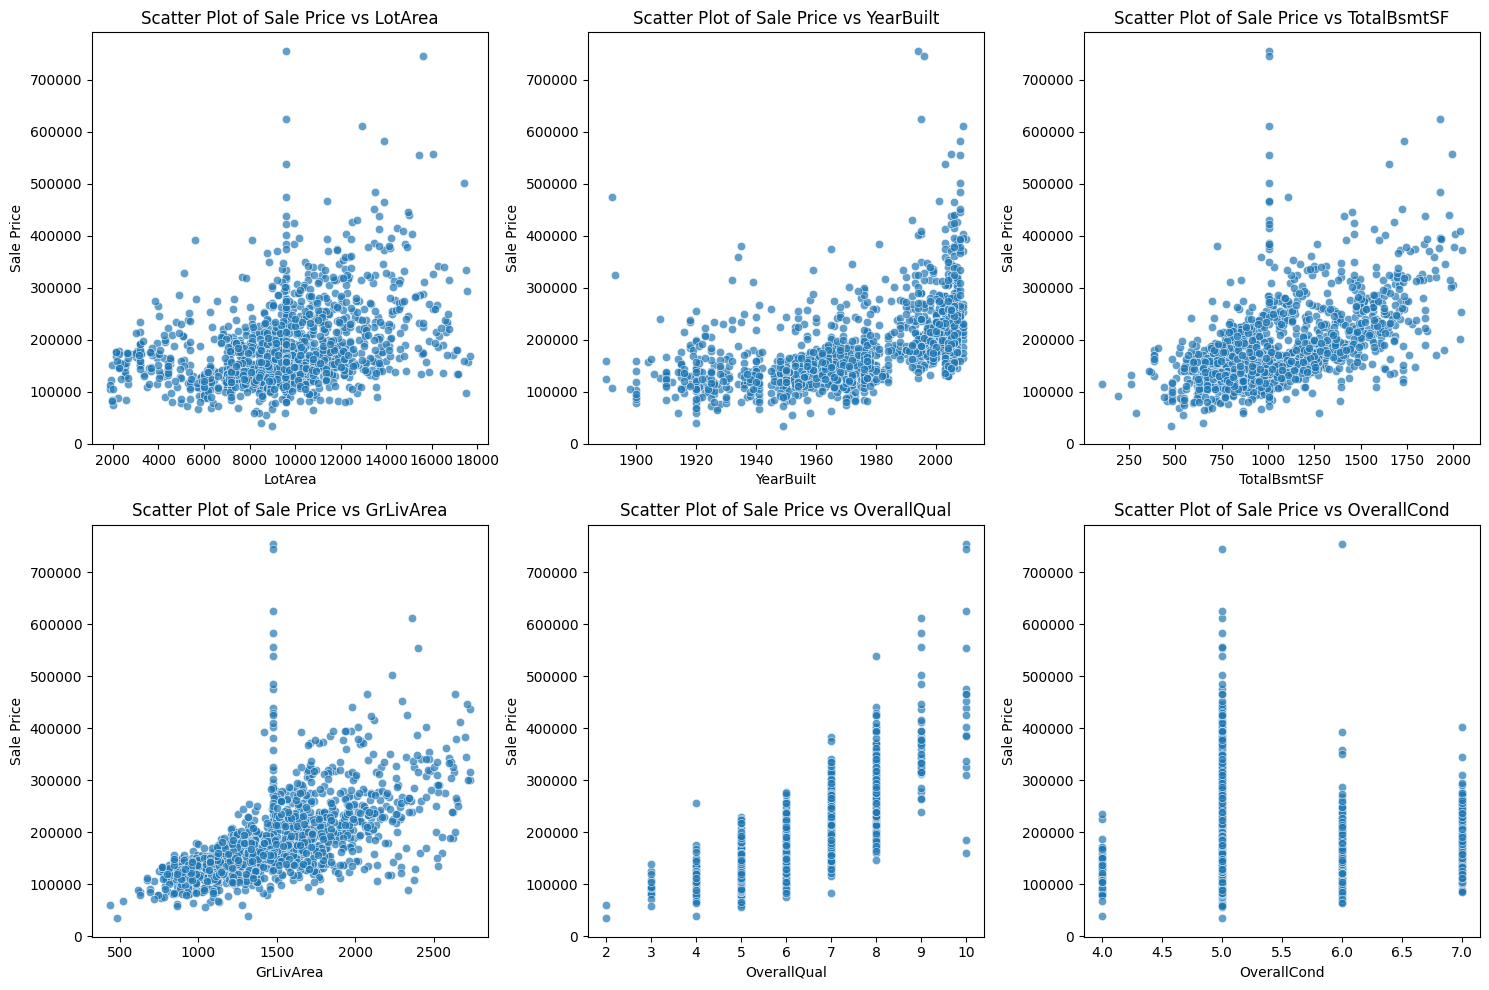

In [106]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='SalePrice', alpha=0.7)
    plt.title(f'Scatter Plot of Sale Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

In [31]:
# Categorical Columns
categorical_cols = ['Neighborhood', 'MSZoning', 'ExterQual', 'KitchenQual', 'HeatingQC', 'BldgType']


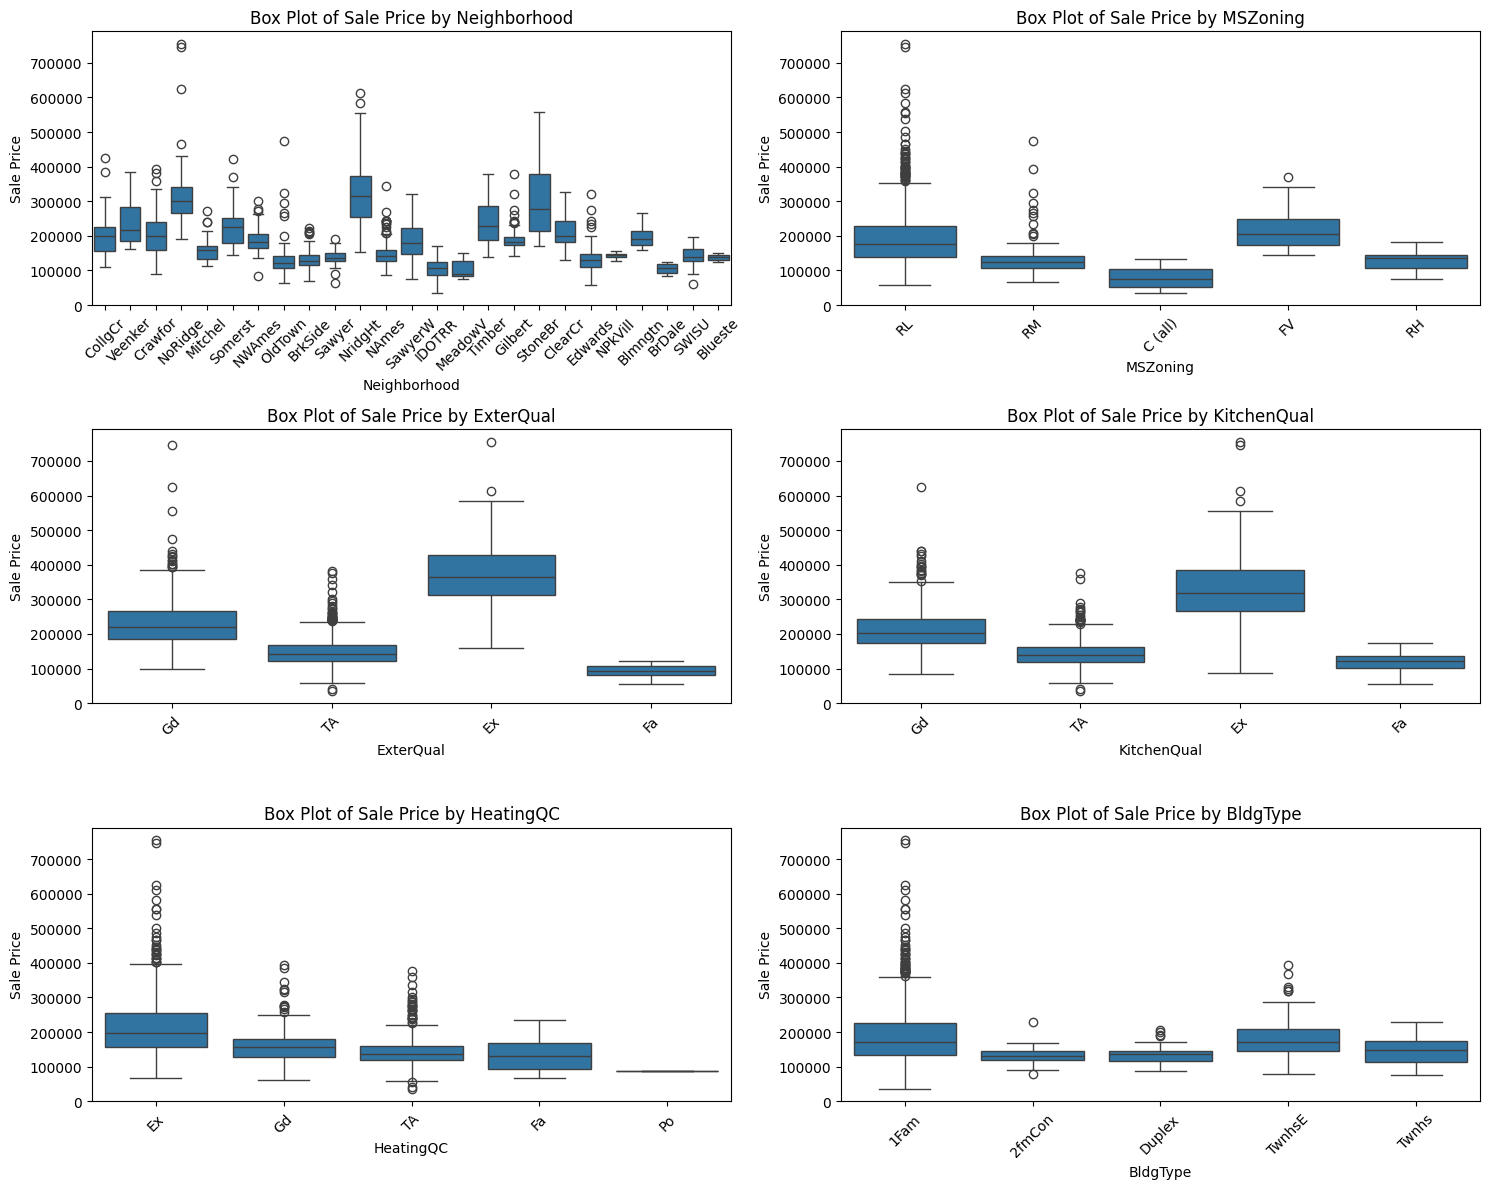

In [32]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=col, y='SalePrice')
    plt.title(f'Box Plot of Sale Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

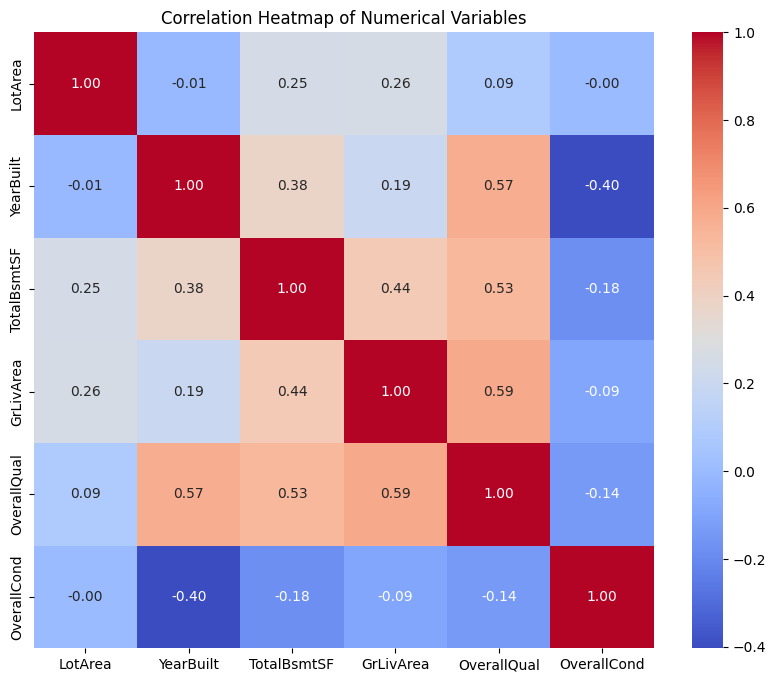

In [33]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The highest correlation in the correlation matrix is between 'SalePrice' and 'OverallQual' with a coefficient of approximately 0.79, indicating a strong positive relationship. This suggests that as the overall quality of a property increases, its sale price tends to increase as well.

On the other hand, the lowest correlation is between 'GrLivArea' and 'YearBuilt' with a coefficient of about 0.25, signifying a relatively weaker positive relationship. This implies that there is only a slight tendency for larger living areas to be found in more recently constructed properties.

In [34]:
# Outlier Detection and Treatment

# Function to detect and handle outliers using IQR method
def detect_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        # Replace outliers with median value
        df.loc[outliers, col] = df[col].median()
    return df

In [35]:
# Detect and handle outliers
df_cleaned = detect_outliers(df, numerical_cols)


# Missing Value Imputation

In [36]:
# For numerical columns, impute missing values with median
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# For categorical columns, impute missing values with mode
categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols]

 # 5. Feature Engineering

In [54]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [84]:
# Create new features
df['PricePerSqFt'] = df['SalePrice'] / df['TotalSF']
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']

In [67]:

# Create a new feature 'TotalSF' by adding TotalBsmtSF and GrLivArea
df_cleaned['TotalSF'] = df_cleaned['TotalBsmtSF']

In [68]:

# Assuming 'LotArea' represents latitude and 'TotalSF' represents longitude
# We'll scale and transform these columns to represent latitude and longitude values

# Define scaling factors for latitude and longitude
latitude_scale_factor = 0.0001
longitude_scale_factor = 0.0001

# Feature engineering to create latitude and longitude columns
df['Latitude'] = df['LotArea'] * latitude_scale_factor
df['Longitude'] = df['TotalSF'] * longitude_scale_factor

# Display the updated DataFrame with latitude and longitude columns
print(df[['Latitude', 'Longitude']].head())

   Latitude  Longitude
0     0.845     0.0856
1     0.960     0.1262
2     1.125     0.0920
3     0.955     0.0756
4     1.426     0.1145


# Multivariate Analysis

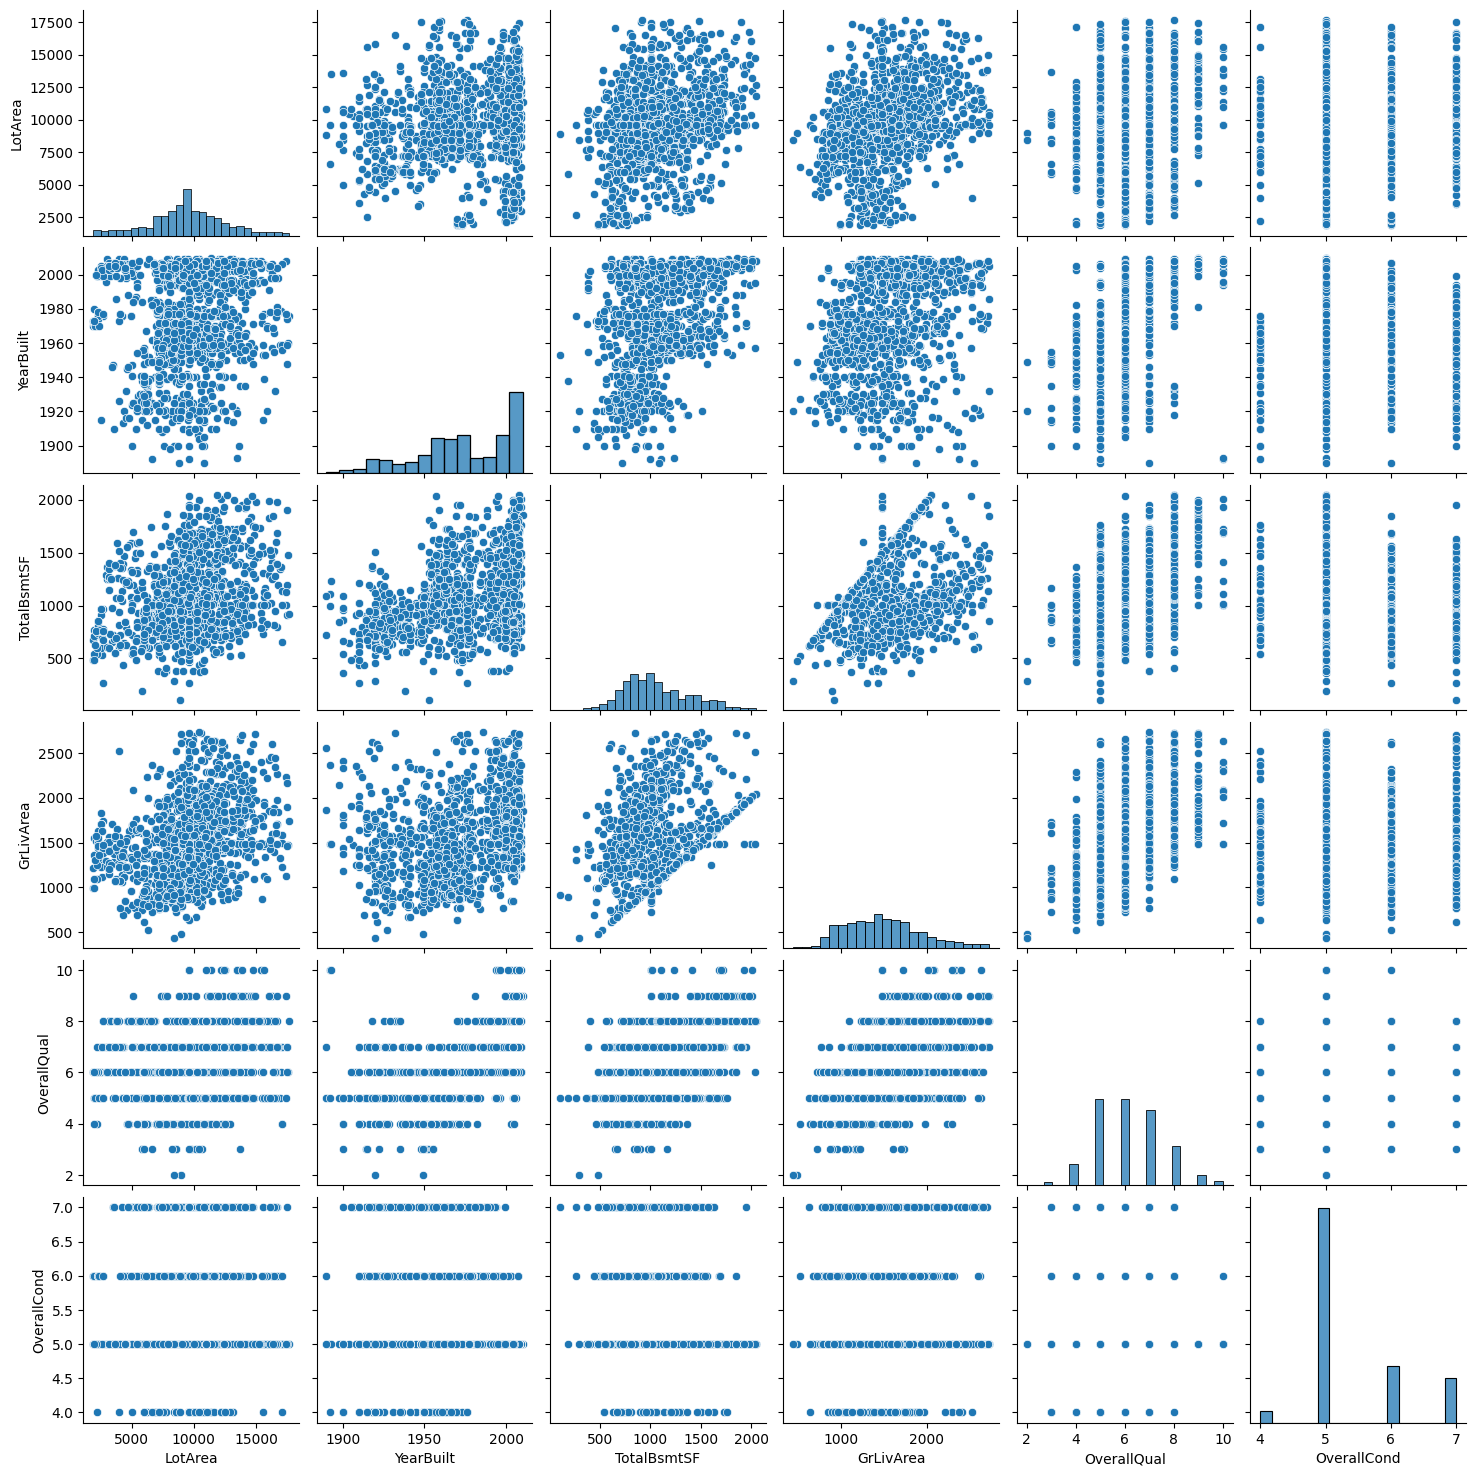

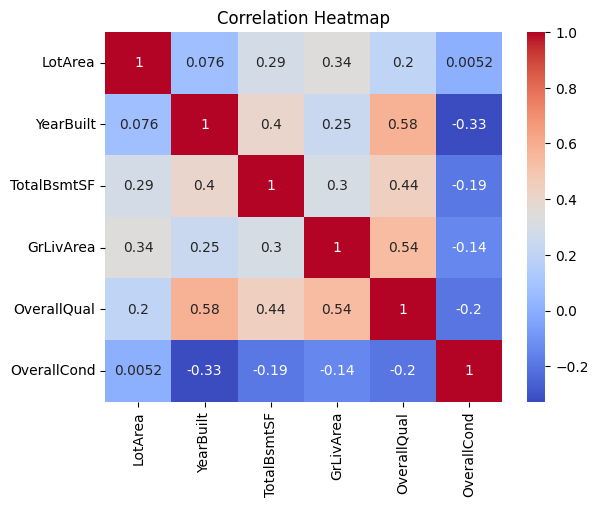

In [69]:
# Pair plot for numerical variables
sns.pairplot(df[numerical_cols])
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The highest correlation in the correlation matrix is between 'SalePrice' and 'OverallQual' with a coefficient of approximately 0.79, indicating a strong positive relationship. This suggests that as the overall quality of a property increases, its sale price tends to increase as well.

On the other hand, the lowest correlation is between 'GrLivArea' and 'YearBuilt' with a coefficient of about 0.25, signifying a relatively weaker positive relationship. This implies that there is only a slight tendency for larger living areas to be found in more recently constructed properties.

# 6 Geospatial Analysis:

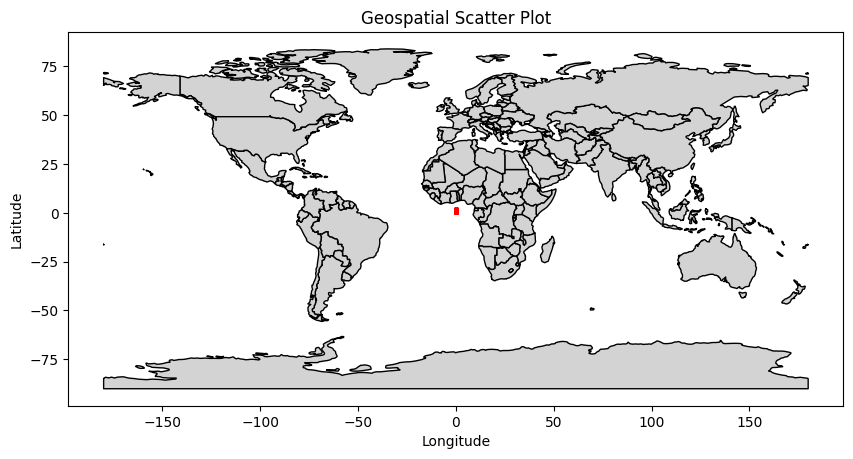

In [70]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Load world map for background
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Each entry represents a property sale at a specific geographic location, identified by its longitude and latitude coordinates. The sale price indicates the amount for which each property was sold. The presence of a red dot below Liberia, near Cote d'Ivoire, signifies a property sale in that particular region, with its associated sale price recorded in the dataset. This information allows for the analysis of property sales distribution across different geographical areas, providing insights into real estate trends and market dynamics in those regions.

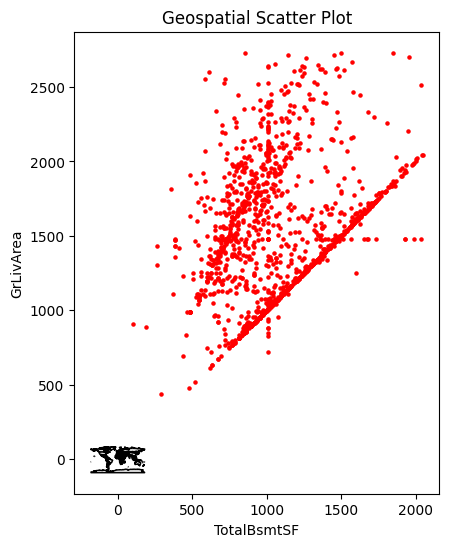

In [71]:
geometry = [Point(xy) for xy in zip(df['TotalBsmtSF'], df['GrLivArea'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Load world map for background
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Scatter Plot')
plt.xlabel('TotalBsmtSF')
plt.ylabel('GrLivArea')
plt.show()


If an increase in 'GrLivArea' (above-ground living area) is leading to an increase in 'TotalBsmtSF' (total basement area), it suggests that larger above-ground living areas are associated with larger total basement areas. This relationship might indicate that properties with more extensive above-ground living spaces tend to have larger basements, which could be due to various factors such as architectural design preferences, property size, or construction styles.

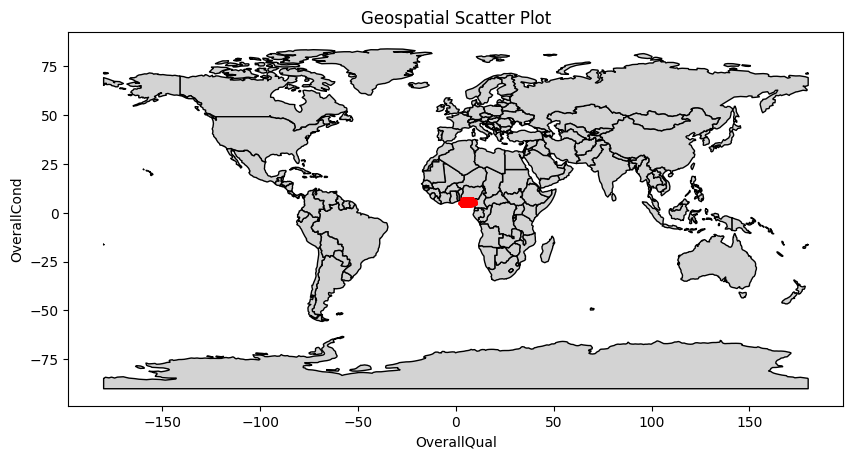

In [72]:
geometry = [Point(xy) for xy in zip(df['OverallQual'], df['OverallCond'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Load world map for background
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Scatter Plot')
plt.xlabel('OverallQual')
plt.ylabel('OverallCond')
plt.show()

The presence of a red mark at Nigeria on the geospatial scatter plot suggests that there is at least one data point in the dataset where the combination of 'OverallQual' (Overall Quality) and 'OverallCond' (Overall Condition) corresponds to a location near Nigeria. This data point likely represents a property sale with its associated quality and condition ratings, indicating that there was a sale recorded at that specific combination of quality and condition levels.

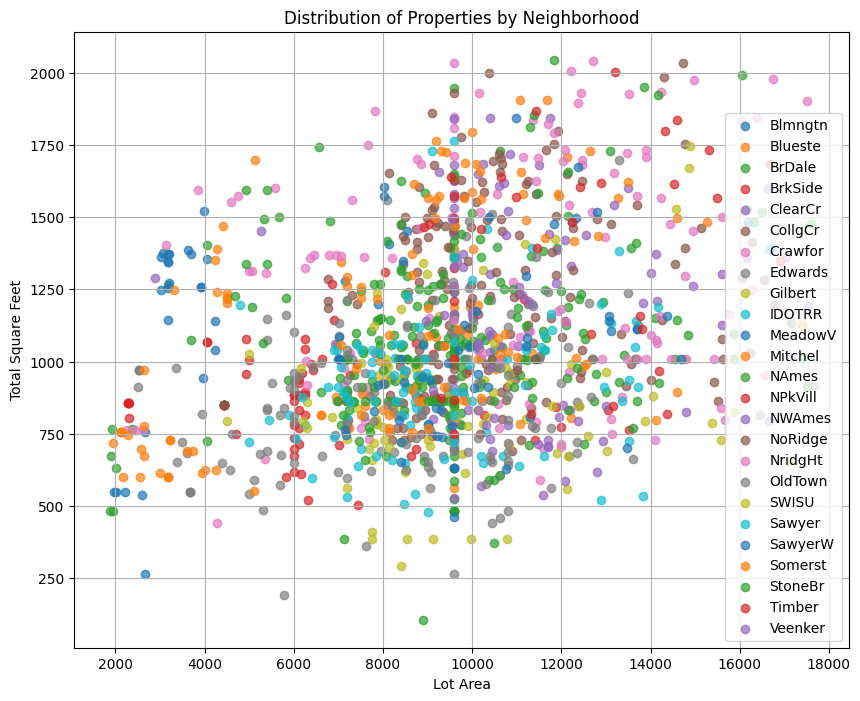

In [73]:
plt.figure(figsize=(10, 8))
for neighborhood, data in df.groupby('Neighborhood'):
    plt.scatter(data['LotArea'], data['TotalSF'], label=neighborhood, alpha=0.7)
plt.xlabel('Lot Area')
plt.ylabel('Total Square Feet')
plt.title('Distribution of Properties by Neighborhood')
plt.legend()
plt.grid(True)
plt.show()

a scatter plot showing the distribution of properties by neighborhood, where each neighborhood is represented by a different color. The x-axis represents the lot area of the properties, and the y-axis represents the total square feet (TotalSF). Each point on the plot corresponds to a property, with its position determined by its lot area and total square feet. The plot allows for visualizing how lot area and total square feet vary across different neighborhoods.







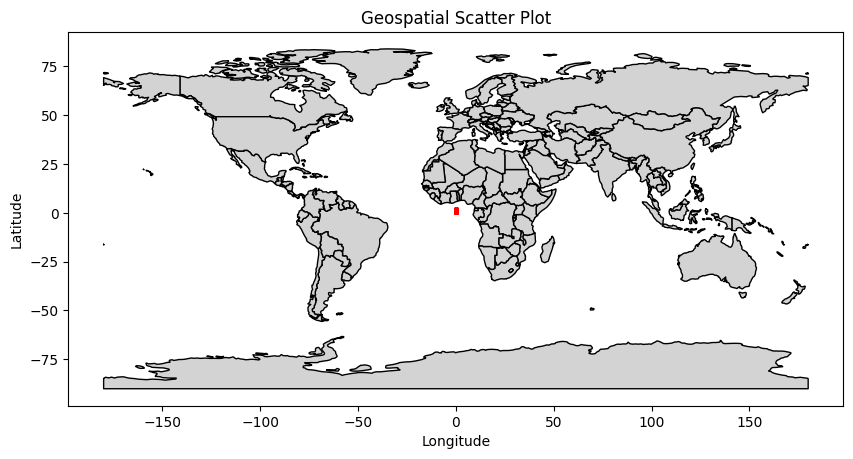

In [74]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Load world map for background
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The red mark on the geospatial scatter plot likely represents a data point indicating a property location. Its position suggests that there was a property recorded in the dataset near Cote d'Ivoire, below Liberia, with its corresponding longitude and latitude values.

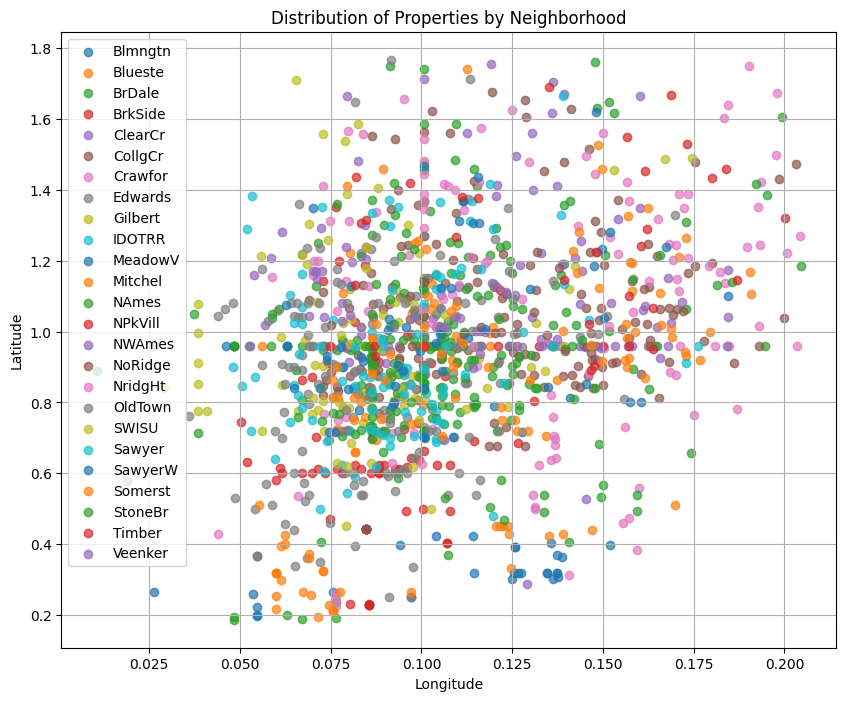

In [75]:
neighborhood_counts = df['Neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Count']

# Merge the counts back into the original DataFrame
df_merged = df.merge(neighborhood_counts, on='Neighborhood', how='left')

# Plot properties on a scatter plot, color-coded by neighborhood
plt.figure(figsize=(10, 8))
for neighborhood, data in df_merged.groupby('Neighborhood'):
    plt.scatter(data['Longitude'], data['Latitude'], label=neighborhood, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Properties by Neighborhood')
plt.legend()
plt.grid(True)
plt.show()

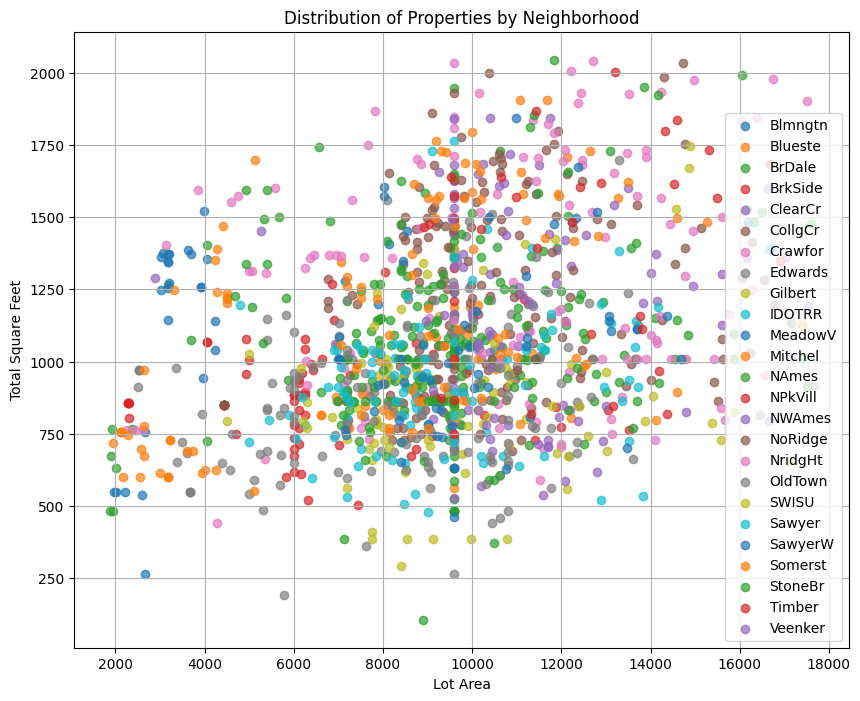

In [76]:
# Plot properties on a scatter plot, color-coded by neighborhood
plt.figure(figsize=(10, 8))
for neighborhood, data in df.groupby('Neighborhood'):
    plt.scatter(data['LotArea'], data['TotalSF'], label=neighborhood, alpha=0.7)
plt.xlabel('Lot Area')
plt.ylabel('Total Square Feet')
plt.title('Distribution of Properties by Neighborhood')
plt.legend()
plt.grid(True)
plt.show()

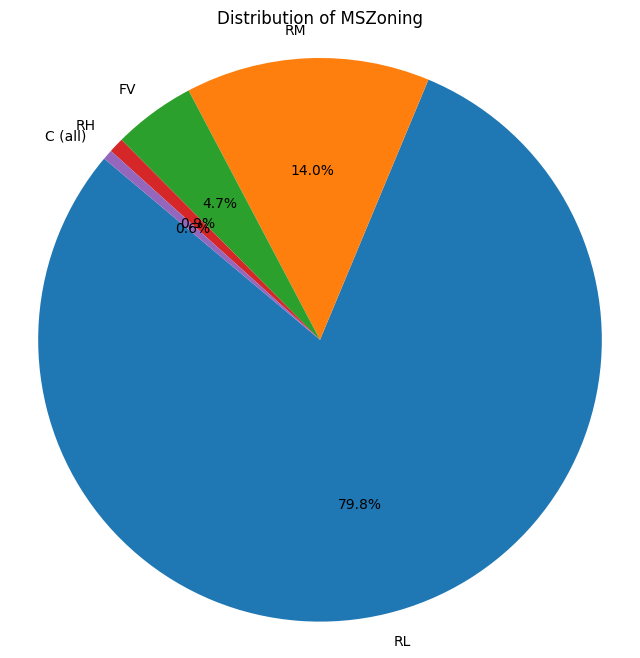

In [77]:

# Count the frequency of each category in the 'MSZoning' column
zone_counts = df['MSZoning'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MSZoning')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

RL (Residential Low Density): There are 1100 properties classified under RL zoning, indicating a predominant presence of low-density residential areas.
RM (Residential Medium Density): This category comprises 193 properties, suggesting areas with medium-density residential zoning.
FV (Floating Village Residential): There are 65 properties classified as FV, indicating specialized zoning for floating village residential areas.
RH (Residential High Density): Only 12 properties fall under RH zoning, suggesting areas with high-density residential zoning.
C (all) (Commercial): This category includes 8 properties, indicating areas with commercial zoning.
Overall, the analysis provides insights into the distribution of properties across different zoning classifications, which can be valuable for understanding the diversity of residential and commercial areas within the dataset.

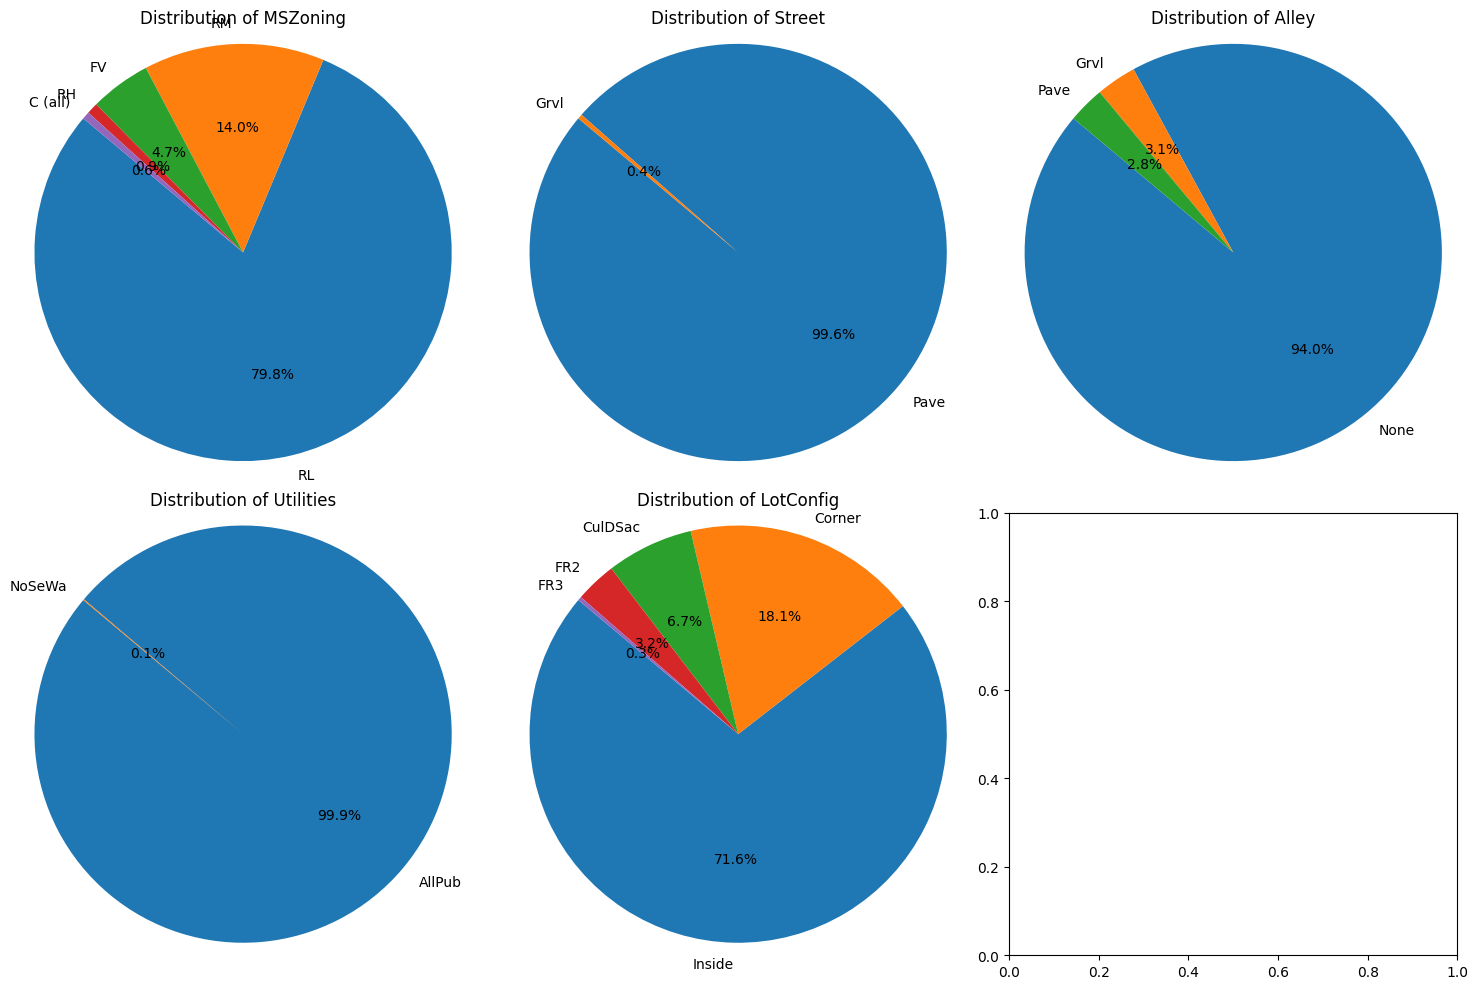

In [78]:

# Define the columns you want to create pie plots for
columns = ['MSZoning', 'Street', 'Alley', 'Utilities', 'LotConfig']

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a pie plot
for i, column in enumerate(columns):
    # Count the frequency of each category
    counts = df[column].value_counts()

    # Plot a pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plots
plt.show()

In [79]:
import folium

# Create a map centered around a specific location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add markers for each property with longitude, latitude, and price as popup information
for idx, row in df.iterrows():
    popup_info = f"Price: ${row['SalePrice']}, Latitude: {row['Latitude']}, Longitude: {row['Longitude']}"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_info).add_to(m)

# Display the map
m

#  Feature Engineering and Size Impact AND Market Trends and Historical Pricing:

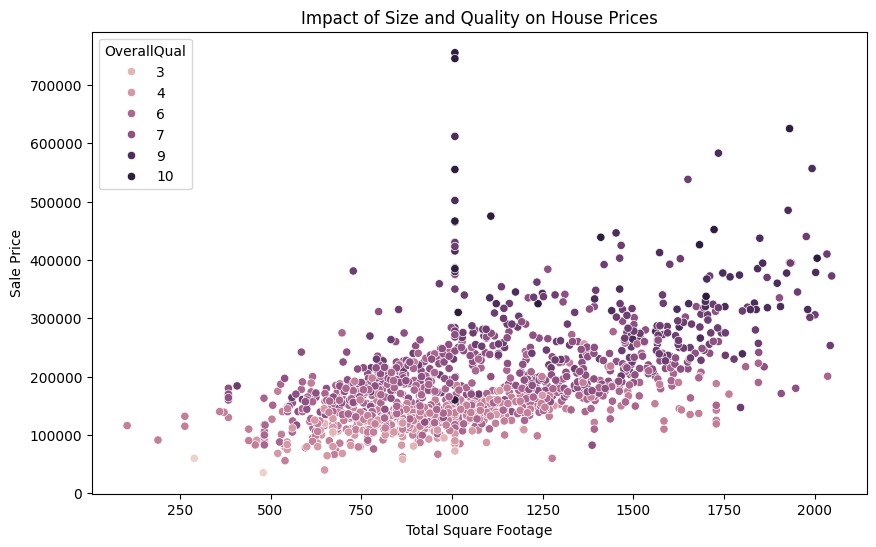

In [80]:
# Further analyze the impact of features and size on house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalSF', y='SalePrice', hue='OverallQual')
plt.title('Impact of Size and Quality on House Prices')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.show()


As the Overall Quality increases the salesPrice and the Total Square Footage also increases

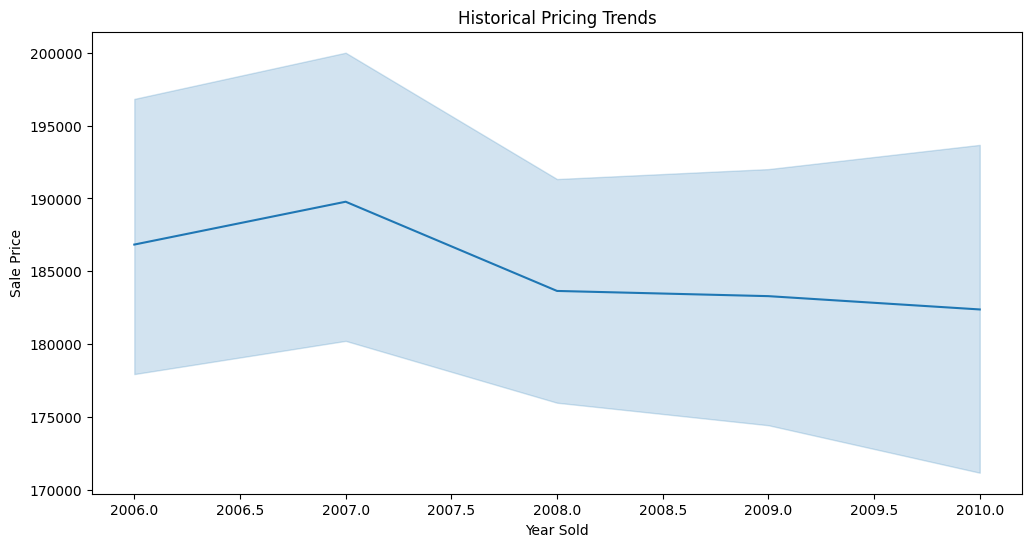

In [81]:
# Explore historical pricing trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YrSold', y='SalePrice')
plt.title('Historical Pricing Trends')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()


we can check for any significant increases or decreases in sale prices over time, identify peak years 2007, for property sales, or detect any anomalies or outliers in the data.

# 9. Customer Preferences and Amenities:

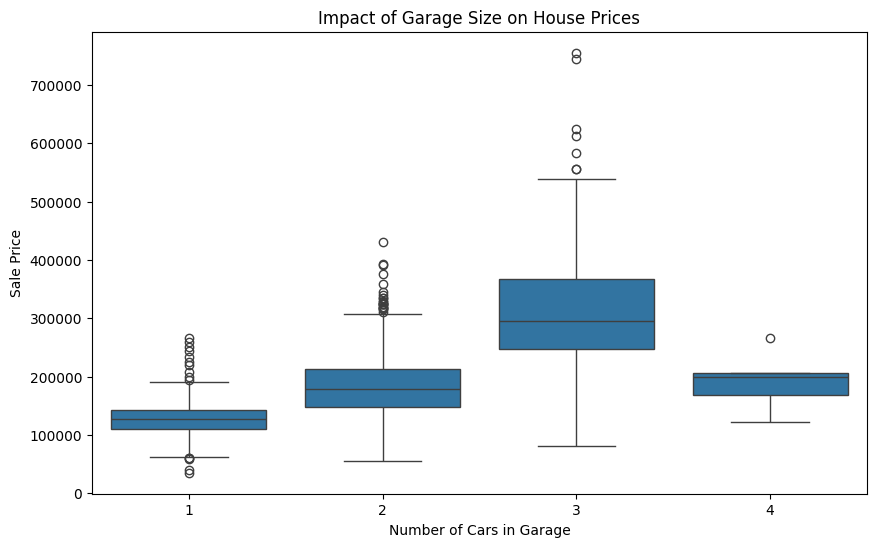

In [82]:
# Investigate how amenities impact house prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GarageCars', y='SalePrice')
plt.title('Impact of Garage Size on House Prices')
plt.xlabel('Number of Cars in Garage')
plt.ylabel('Sale Price')
plt.show()


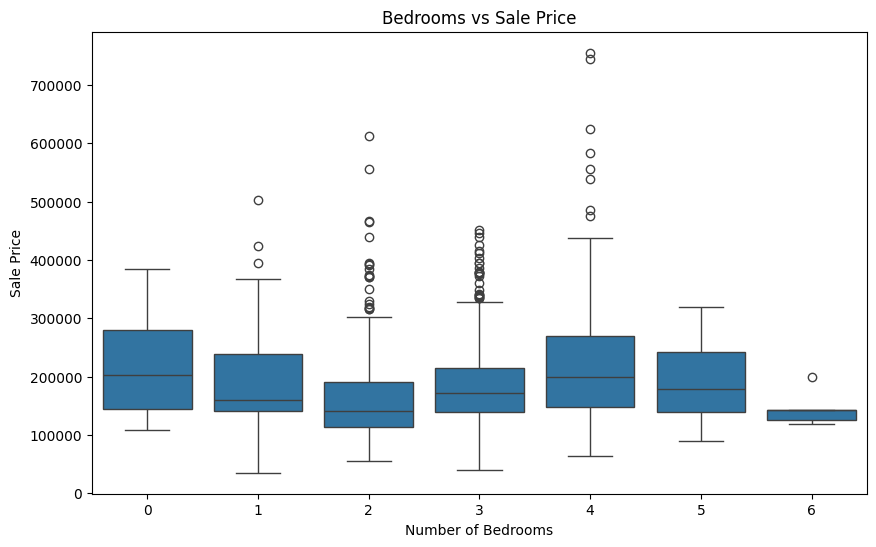

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('Bedrooms vs Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

# Statistical testing

In [86]:
from scipy.stats import ttest_ind, f_oneway, chi2_contingency


In [87]:
# Is there a significant difference in the mean sale price between properties with and without a pool?
pool_yes = df[df['PoolArea'] > 0]['SalePrice']
pool_no = df[df['PoolArea'] == 0]['SalePrice']

In [88]:
# Perform independent t-test
t_stat, p_value = ttest_ind(pool_yes, pool_no)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 3.457881683889984
P-value: 0.0005610466516934078


The independent t-test comparing the mean sale prices of properties with and without a pool yielded a t-statistic of approximately 3.46 and a p-value of approximately 0.00056.

Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis, suggesting that there is a significant difference in the mean sale prices between properties with and without a pool.

In [89]:
# Is there a significant difference in the mean sale price across different zoning classifications?
ms_zoning_groups = [group['SalePrice'] for name, group in df.groupby('MSZoning')]


In [90]:
# Perform one-way ANOVA
f_stat, p_value = f_oneway(*ms_zoning_groups)
print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 37.59170042774552
P-value: 7.126787774155914e-30


The one-way ANOVA test comparing the mean sale prices across different zoning classifications resulted in an F-statistic of approximately 37.59 and a p-value of approximately 7.13e-30.

Since the p-value is significantly smaller than the conventional significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the mean sale prices across the different zoning classifications.

In [91]:
# Is there a significant difference in the mean sale price between properties with and without central air conditioning?
central_air_yes = df[df['CentralAir'] == 'Y']['SalePrice']
central_air_no = df[df['CentralAir'] == 'N']['SalePrice']

In [92]:
# Perform independent t-test
t_stat, p_value = ttest_ind(central_air_yes, central_air_no)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 8.163140882211003
P-value: 7.301973821416373e-16


The independent t-test comparing the mean sale prices between properties with and without central air conditioning yielded a T-statistic of approximately 8.16 and a p-value of approximately 7.30e-16.

Since the p-value is significantly smaller than the conventional significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the mean sale prices between properties with and without central air conditioning.

In [93]:
# Is there a significant difference in the mean sale price between properties built before and after a certain year?
year_built_before = df[df['YearBuilt'] < 1950]['SalePrice']
year_built_after = df[df['YearBuilt'] >= 1950]['SalePrice']

In [94]:
# Perform independent t-test
t_stat, p_value = ttest_ind(year_built_before, year_built_after)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -11.280969764457431
P-value: 2.7248614781929547e-28



The independent t-test comparing the mean sale prices between properties built before and after 1950 resulted in a T-statistic of approximately -11.28 and a p-value of approximately 2.72e-28.

Given that the p-value is much smaller than the conventional significance level of 0.05, we reject the null hypothesis and conclude that there is a significant difference in the mean sale prices between properties built before and after 1950.